In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import re
from geopy.geocoders import Nominatim
import time

In [2]:
os.getcwd()

'/Users/chuqiwang/Documents/US_PFAS_Project/data_merging_analysis'

## Data Merging

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
ak_df = pd.read_csv('../data_cleaning/Alaska/alaska_dw.csv', index_col=0)
az_df = pd.read_csv('../data_cleaning/Arizona/arizona_dw.csv', index_col=0)
ar_df = pd.read_csv('../data_cleaning/Arkansas/arkansas_dw.csv', index_col=0)
ca_df = pd.read_csv('../data_cleaning/California/california_dw.csv', index_col=0)
co_df = pd.read_csv('../data_cleaning/Colorado/colorado_dw.csv', index_col=0)
de_df = pd.read_csv('../data_cleaning/Delaware/delaware_dw.csv', index_col=0)
fl_df = pd.read_csv('../data_cleaning/Florida/florida_dw.csv', index_col=0)
ga_df = pd.read_csv('../data_cleaning/Georgia/georgia_dw.csv', index_col=0)
hi_df = pd.read_csv('../data_cleaning/Hawaii/hawaii_dw.csv', index_col=0)
il_df = pd.read_csv('../data_cleaning/Illinois/illinois_dw.csv', index_col=0)
in_df = pd.read_csv('../data_cleaning/Indiana/indiana_dw.csv', index_col=0)
ks_df = pd.read_csv('../data_cleaning/Kansas/kansas_dw.csv', index_col=0)
me_df = pd.read_csv('../data_cleaning/Maine/maine_dw.csv', index_col=0)
md_df = pd.read_csv('../data_cleaning/Maryland/maryland_dw.csv', index_col=0)
ma_df = pd.read_csv('../data_cleaning/Massachusetts/massachusetts_dw.csv', index_col=0)
mi_df = pd.read_csv('../data_cleaning/Michigan/michigan_dw.csv', index_col=0)
mn_df = pd.read_csv('../data_cleaning/Minnesota/minnesota_dw.csv', index_col=0)
mt_df = pd.read_csv('../data_cleaning/Montana/montana_dw.csv', index_col=0)
nh_df = pd.read_csv('../data_cleaning/NewHampshire/newhampshire_dw.csv', index_col=0)
nj_df = pd.read_csv('../data_cleaning/NewJersey/newjersey_dw.csv', index_col=0)
nm_df = pd.read_csv('../data_cleaning/NewMexico/newmexico_dw.csv', index_col=0)
ny_df = pd.read_csv('../data_cleaning/NewYork/newyork_dw.csv', index_col=0)
nc_df = pd.read_csv('../data_cleaning/NorthCarolina/northcarolina_dw.csv', index_col=0)
nd_df = pd.read_csv('../data_cleaning/NorthDakota/northdakota_dw.csv', index_col=0)
oh_df = pd.read_csv('../data_cleaning/Ohio/ohio_dw.csv', index_col=0)
ok_df = pd.read_csv('../data_cleaning/Oklahoma/oklahoma_dw.csv', index_col=0)
or_df = pd.read_csv('../data_cleaning/Oregon/oregon_dw.csv', index_col=0)
pa_df = pd.read_csv('../data_cleaning/Pennsylvania/pennsylvania_dw.csv', index_col=0)
ri_df = pd.read_csv('../data_cleaning/RhodeIsland/rhodeisland_dw.csv', index_col=0)
sc_df = pd.read_csv('../data_cleaning/SouthCarolina/southcarolina_dw.csv', index_col=0)
sd_df = pd.read_csv('../data_cleaning/SouthDakota/southdakota_dw.csv', index_col=0)
tn_df = pd.read_csv('../data_cleaning/Tennessee/tennessee_dw.csv', index_col=0)
tx_df = pd.read_csv('../data_cleaning/Texas/texas_dw.csv', index_col=0)
vt_df = pd.read_csv('../data_cleaning/Vermont/vermont_dw.csv', index_col=0)
va_df = pd.read_csv('../data_cleaning/Virginia/virginia_dw.csv', index_col=0)
wa_df = pd.read_csv('../data_cleaning/Washington/washington_dw.csv', index_col=0)
wi_df = pd.read_csv('../data_cleaning/Wisconsin/wisconsin_dw.csv', index_col=0)

/var/folders/h1/tx5r5g0n5k9cc_fl6nfvt9pc0000gn/T/ipykernel_24272/305961177.py:4: DtypeWarning: Columns (1,2,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ca_df = pd.read_csv('../data_cleaning/California/california_dw.csv', index_col=0)
/var/folders/h1/tx5r5g0n5k9cc_fl6nfvt9pc0000gn/T/ipykernel_24272/305961177.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ma_df = pd.read_csv('../data_cleaning/Massachusetts/massachusetts_dw.csv', index_col=0)
/var/folders/h1/tx5r5g0n5k9cc_fl6nfvt9pc0000gn/T/ipykernel_24272/305961177.py:33: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  tx_df = pd.read_csv('../data_cleaning/Texas/texas_dw.csv', index_col=0)
/var/folders/h1/tx5r5g0n5k9cc_fl6nfvt9pc0000gn/T/ipykernel_24272/305961177.py:36: DtypeWarning: Columns (1,2,7,8,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  wa_df

In [5]:
all_states_df = pd.concat([ak_df, az_df, ar_df, ca_df, co_df, de_df, fl_df, ga_df, hi_df, il_df, in_df, ks_df, me_df, md_df, ma_df, mi_df,
                          mn_df, mt_df, nh_df, nj_df, nm_df, ny_df, nc_df, nd_df, oh_df, ok_df, or_df, pa_df, ri_df, sc_df, sd_df, tn_df, 
                          tx_df, vt_df, va_df, wa_df, wi_df])
all_states_df.shape

(1394782, 25)

In [6]:
all_states_df.index = range(0, len(all_states_df))
all_states_df

sample_id                sampling_location data_source   latitude  \
0        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
1        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
2        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
3        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
4        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
...              ...                              ...         ...        ...   
1394777  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1394778  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1394779  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1394780  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1394781  22112120304       West Bend AASF #1 / Armory         DoD        NaN   

          longitude sampling_date pws_id water_system_name  population  \
0       -149.697633    2022-09-28    NaN               NaN         NaN   
1       -149.697633    2022-09-28    NaN               NaN         NaN   
2       -149.697633    2022-09-28    NaN               NaN         NaN   
3       -149.697633    2022-09-28    NaN               NaN         NaN   
4       -149.697633    2022-09-28    NaN               NaN         NaN   
...             ...           ...    ...               ...         ...   
1394777         NaN    2021-12-07    NaN               NaN         NaN   
1394778         NaN    2021-12-07    NaN               NaN         NaN   
1394779         NaN    2021-12-07    NaN               NaN         NaN   
1394780         NaN    2021-12-07    NaN               NaN         NaN   
1394781         NaN    2021-12-07    NaN               NaN         NaN   

        well_type  well_depth units     source_type      state city county  \
0             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
1             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
2             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
3             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
4             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
...           ...         ...   ...             ...        ...  ...    ...   
1394777       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1394778       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1394779       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1394780       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1394781       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   

         MRL   DL analytical_methods is_detected   analyte  concentration  \
0        NaN  3.6            QSM_B15       False    4:2FTS            0.0   
1        NaN  3.6            QSM_B15       False    6:2FTS            0.0   
2        NaN  3.6            QSM_B15       False    8:2FTS            0.0   
3        NaN  3.6            QSM_B15       False  NETFOSAA            0.0   
4        NaN  7.0            QSM_B15       False   NMEFOSA            0.0   
...      ...  ...                ...         ...       ...            ...   
1394777  NaN  2.0            QSM_B15       False     PFPEA            0.0   
1394778  NaN  3.0            QSM_B15       False     PFPES            0.0   
1394779  NaN  3.0            QSM_B15       False    PFTEDA            0.0   
1394780  NaN  3.0            QSM_B15       False    PFTRDA            0.0   
1394781  NaN  3.0            QSM_B15       False     PFUNA            0.0   

         pfas_total note best_address  
0               NaN  NaN          NaN  
1               NaN  NaN          NaN  
2               NaN  NaN          NaN  
3               NaN  NaN          NaN  
4               NaN  NaN          NaN  
...             ...  ...          ...  
1394777         NaN

In [7]:
all_states_df['data_source'].unique()

array(['DoD', 'ADEQ', 'GAMA-Division of Drinking Water', 'CDPHE',
       'Indiana Department of Environmental Management', 'Maine DWP',
       'MDE', 'MassGOV', 'NMED', 'DEQ',
       'PFAS Testing of Ohio Public Water Systems', 'OHA', 'DEP', 'DHEC',
       'TDEC', 'DWGWP', 'VIRGINIA DEPARTMENT OF HEALTH', 'DOH',
       'WISconsin Department of Natural Resources'], dtype=object)

## Data Preprocessing & data cleaning

In [8]:
all_states_df['analyte'].unique()

array(['4:2FTS', '6:2FTS', '8:2FTS', 'NETFOSAA', 'NMEFOSA', 'NMEFOSAA',
       'PFBS', 'PFBA', 'PFDS', 'PFDA', 'PFDOA', 'PFHPS', 'PFHPA', 'PFHXS',
       'PFHXA', 'PFNS', 'PFNA', 'PFOSA', 'PFOS', 'PFOA', 'PFPES', 'PFPEA',
       'PFTEDA', 'PFTRDA', 'PFUNA', '11CL-PF3OUDS', '9CL-PF3ONS', 'ADONA',
       'HFPO-DA', '5:3FTCA', '7:3FTCA', '3:3FTCA', 'NETFOSA', 'NETFOSE',
       'NMEFOSE', 'NFDHA', 'PFEESA', 'PFMPA', 'PFMBA', 'PFDOS', '10:2FTS',
       'PFHXDA', 'PFODA', 'HFPO-DA (GENX)', 'NADONA', 'N-ETFOSAA',
       'N-MEFOSAA', 'PFTEDA (PFTA)', 'PFUDA', 'PFTRIDA', 'PFHA', 'PFHXSA',
       'HFPA-DA', 'PFNDCA', 'PFBSA', '9ClPF3ONS', 'PFUNDCA',
       '11ClPF3OUDS', 'PFBTA', 'PFPA', 'PFHPSA', 'MEFOSAA', 'ETFOSAA',
       'PFTEA', 'PFTRIA', 'PFOS+PFOA', 'PFTA', 'GENX', 'PFINISHED WATERA',
       'PFHPA+PFHXS+PFNA+PFOS+PFOA+PFDA', '6:2 FTS', 'PFTDA', 'PFUNDA',
       'PFAS6', '8:2 FTS', 'PFOA+PFOS', 'PFTREA', 'F53B MAJOR',
       'F53B MINOR', 'PFHxS', 'PFPeA', 'PFTrDA', '4:2 FTS', 'PFHpA',
 

In [9]:
all_states_df[all_states_df['analyte'].isna()]

sample_id sampling_location data_source   latitude   longitude  \
1246598     41701               NaN         DOH  37.246654 -119.192179   
1246607     41701               NaN         DOH  37.246654 -119.192179   
1246754     41701               NaN         DOH  37.246654 -119.192179   
1246763     41701               NaN         DOH  37.246654 -119.192179   
1267929     41401               NaN         DOH  -1.275121   36.849382   
1267931     41401               NaN         DOH  -1.275121   36.849382   
1274218     20403               NaN         DOH  41.627652  -70.848402   

        sampling_date pws_id water_system_name  population well_type  \
1246598    2023-04-18  11887       CEDAR CREST         NaN       NaN   
1246607    2023-04-18  11887       CEDAR CREST         NaN       NaN   
1246754    2023-04-18  11887       CEDAR CREST         NaN       NaN   
1246763    2023-04-18  11887       CEDAR CREST         NaN       NaN   
1267929    2023-04-17  63479      OLYMPIC MALL         NaN       NaN   
1267931    2023-04-17  63479      OLYMPIC MALL         NaN       NaN   
1274218    2023-04-10  77960        SHAWS COVE         NaN       NaN   

         well_depth units     source_type       state city  county  MRL  DL  \
1246598         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1246607         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1246754         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1246763         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1267929         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1267931         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   
1274218         NaN  ng/L  drinking water  Washington  NaN  Pierce  NaN NaN   

        analytical_methods is_detected analyte  concentration  pfas_total  \
1246598                NaN        True     NaN            4.3         NaN   
1246607                NaN        True     NaN            3.3         NaN   
1246754                NaN        True     NaN            4.3         NaN   
1246763                NaN        True     NaN            3.3         NaN   
1267929                NaN        True     NaN            2.5         NaN   
1267931                NaN        True     NaN            4.9         NaN   
1274218                NaN       False     NaN            0.0         NaN   

        note  best_address  
1246598  NaN   CEDAR CREST  
1246607  NaN   CEDAR CREST  
1246754  NaN   CEDAR CREST  
1246763  NaN   CEDAR CREST  
1267929  NaN  OLYMPIC MALL  
1267931  NaN  OLYMPIC MALL  
1274218  NaN    SHAWS COVE

In [10]:
len(all_states_df['analyte'].unique())

105

In [11]:
unified_names = {
    '4:2 FTS': '4:2FTS',
    '6:2 FTS': '6:2FTS',
    '8:2 FTS': '8:2FTS',
    'PFOA AND PFOS TOTAL': 'PFOA+PFOS',
    'PFOS+PFOA': 'PFOA+PFOS',
    'PFOAANDPFOSTOTAL': 'PFOA+PFOS',
    'HFPO-DA (GENX)': 'HFPO-DA',
    'HFPO-DA(GENX)': 'HFPO-DA',
    'GENX': 'HFPO-DA',
    '11CI-PF3OUDS': '11CL-PF3OUDS',
    '11Cl-PF3OUdS': '11CL-PF3OUDS',
    '11ClPF3OUdS': '11CL-PF3OUDS',
    '9Cl-PF3ONS': '9CL-PF3ONS',
    '9CI-PF3ONS': '9CL-PF3ONS',
    '11CLPF3OUDS': '11CL-PF3OUDS',
    '9CLPF3ONS': '9CL-PF3ONS',
    '9ClPF3ONS': '9CL-PF3ONS',
    'PFTEDA(PFTA)': 'PFTEDA',
    '4:2FTSA': '4:2FTS',
    '6:2FTSA': '6:2FTS',
    '8:2FTSA': '8:2FTS',
    'PFOSA/FOSA': 'FOSA',
    'PFOSA': 'FOSA',
    'N-ETFOSAA': 'NETFOSAA',
    'PFBTA': 'PFBA',
    'HFPA-DA': 'HFPO-DA',
    'NADONA': 'ADONA',
    'N-MEFOSAA': 'NMEFOSAA',
    'PFTRIDA': 'PFTRDA',
    'PFHA': 'PFHXA',
    'PFNDCA': 'PFDA',
    'PFBSA': 'PFBS',
    'PFUNDCA': 'PFUNA',
    'PFPA': 'PFPEA',
    'N-ETFOSE': 'NETFOSE',
    'N-MEFOSE': 'NMEFOSE',
    'PFHPA+PFHXS+PFNA+PFOS+PFOA+PFDA': 'PFAS6',
    'PFHPSA': 'PFHPS',
    'PFHXSA': 'PFHXS',
    'PFUNDA': 'PFUNA',
    'PFTA': 'PFTEDA',
    'PFTRIA': 'PFTRDA',
    'PFTEA': 'PFTEDA',
    'PFUDA': 'PFUNA'
}
# Clean and unify analyte names
all_states_df['analyte'] = (
    all_states_df['analyte']
    .str.upper()
    .str.replace(' ', '')
    .replace(unified_names)
)


In [12]:
analytes_to_remove = ['F53BMAJOR', 'F53BMINOR', 'PFINISHEDWATERA', 'PFHPA+PFHXS+PFNA+PFOS+PFOA', 'NMEFOSA', 'PFTDA', 'MEFOSAA', 'NMEFOSE', 
                     'NETFOSE', 'NETFOSA']
all_states_df = all_states_df[~all_states_df['analyte'].isin(analytes_to_remove)].reset_index(drop=True)

In [13]:
all_states_df['analyte'].astype(str).unique()

array(['4:2FTS', '6:2FTS', '8:2FTS', 'NETFOSAA', 'NMEFOSAA', 'PFBS',
       'PFBA', 'PFDS', 'PFDA', 'PFDOA', 'PFHPS', 'PFHPA', 'PFHXS',
       'PFHXA', 'PFNS', 'PFNA', 'FOSA', 'PFOS', 'PFOA', 'PFPES', 'PFPEA',
       'PFTEDA', 'PFTRDA', 'PFUNA', '11CL-PF3OUDS', '9CL-PF3ONS', 'ADONA',
       'HFPO-DA', '5:3FTCA', '7:3FTCA', '3:3FTCA', 'NFDHA', 'PFEESA',
       'PFMPA', 'PFMBA', 'PFDOS', '10:2FTS', 'PFHXDA', 'PFODA', 'ETFOSAA',
       'PFOA+PFOS', 'PFAS6', 'PFTREA', 'nan'], dtype=object)

In [14]:
len(all_states_df['analyte'].astype(str).unique())

44

'F53BMAJOR', 'F53BMINOR', PFINISHEDWATERA, PFHPA+PFHXS+PFNA+PFOS+PFOA+PFDA, PFHPA+PFHXS+PFNA+PFOS+PFOA, 删掉

PFOSA/FOSA = FOSA, PFOSA=FOSA, N-ETFOSAA=NETFOSAA, PFBTA=PFBA

In [15]:
all_states_df.index = range(0, len(all_states_df))
all_states_df

sample_id                sampling_location data_source   latitude  \
0        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
1        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
2        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
3        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
4        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
...              ...                              ...         ...        ...   
1384656  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384657  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384658  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384659  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384660  22112120304       West Bend AASF #1 / Armory         DoD        NaN   

          longitude sampling_date pws_id water_system_name  population  \
0       -149.697633    2022-09-28    NaN               NaN         NaN   
1       -149.697633    2022-09-28    NaN               NaN         NaN   
2       -149.697633    2022-09-28    NaN               NaN         NaN   
3       -149.697633    2022-09-28    NaN               NaN         NaN   
4       -149.697633    2022-09-28    NaN               NaN         NaN   
...             ...           ...    ...               ...         ...   
1384656         NaN    2021-12-07    NaN               NaN         NaN   
1384657         NaN    2021-12-07    NaN               NaN         NaN   
1384658         NaN    2021-12-07    NaN               NaN         NaN   
1384659         NaN    2021-12-07    NaN               NaN         NaN   
1384660         NaN    2021-12-07    NaN               NaN         NaN   

        well_type  well_depth units     source_type      state city county  \
0             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
1             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
2             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
3             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
4             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
...           ...         ...   ...             ...        ...  ...    ...   
1384656       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384657       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384658       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384659       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384660       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   

         MRL   DL analytical_methods is_detected   analyte  concentration  \
0        NaN  3.6            QSM_B15       False    4:2FTS            0.0   
1        NaN  3.6            QSM_B15       False    6:2FTS            0.0   
2        NaN  3.6            QSM_B15       False    8:2FTS            0.0   
3        NaN  3.6            QSM_B15       False  NETFOSAA            0.0   
4        NaN  3.6            QSM_B15       False  NMEFOSAA            0.0   
...      ...  ...                ...         ...       ...            ...   
1384656  NaN  2.0            QSM_B15       False     PFPEA            0.0   
1384657  NaN  3.0            QSM_B15       False     PFPES            0.0   
1384658  NaN  3.0            QSM_B15       False    PFTEDA            0.0   
1384659  NaN  3.0            QSM_B15       False    PFTRDA            0.0   
1384660  NaN  3.0            QSM_B15       False     PFUNA            0.0   

         pfas_total note best_address  
0               NaN  NaN          NaN  
1               NaN  NaN          NaN  
2               NaN  NaN          NaN  
3               NaN  NaN          NaN  
4               NaN  NaN          NaN  
...             ...  ...          ...  
1384656         NaN

In [16]:
# all_states_df.iloc[10:30].to_csv('dataset_sample.csv')

In [16]:
all_states_df.drop(columns=['best_address'], inplace=True)

In [17]:
all_states_df

sample_id                sampling_location data_source   latitude  \
0        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
1        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
2        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
3        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
4        XJ04025-001  Joint Base Elmendorf-Richardson         DoD  61.270524   
...              ...                              ...         ...        ...   
1384656  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384657  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384658  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384659  22112120304       West Bend AASF #1 / Armory         DoD        NaN   
1384660  22112120304       West Bend AASF #1 / Armory         DoD        NaN   

          longitude sampling_date pws_id water_system_name  population  \
0       -149.697633    2022-09-28    NaN               NaN         NaN   
1       -149.697633    2022-09-28    NaN               NaN         NaN   
2       -149.697633    2022-09-28    NaN               NaN         NaN   
3       -149.697633    2022-09-28    NaN               NaN         NaN   
4       -149.697633    2022-09-28    NaN               NaN         NaN   
...             ...           ...    ...               ...         ...   
1384656         NaN    2021-12-07    NaN               NaN         NaN   
1384657         NaN    2021-12-07    NaN               NaN         NaN   
1384658         NaN    2021-12-07    NaN               NaN         NaN   
1384659         NaN    2021-12-07    NaN               NaN         NaN   
1384660         NaN    2021-12-07    NaN               NaN         NaN   

        well_type  well_depth units     source_type      state city county  \
0             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
1             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
2             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
3             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
4             NaN         NaN  ng/L  drinking water     Alaska  NaN    NaN   
...           ...         ...   ...             ...        ...  ...    ...   
1384656       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384657       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384658       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384659       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   
1384660       NaN         NaN  ng/L  drinking water  Wisconsin  NaN    NaN   

         MRL   DL analytical_methods is_detected   analyte  concentration  \
0        NaN  3.6            QSM_B15       False    4:2FTS            0.0   
1        NaN  3.6            QSM_B15       False    6:2FTS            0.0   
2        NaN  3.6            QSM_B15       False    8:2FTS            0.0   
3        NaN  3.6            QSM_B15       False  NETFOSAA            0.0   
4        NaN  3.6            QSM_B15       False  NMEFOSAA            0.0   
...      ...  ...                ...         ...       ...            ...   
1384656  NaN  2.0            QSM_B15       False     PFPEA            0.0   
1384657  NaN  3.0            QSM_B15       False     PFPES            0.0   
1384658  NaN  3.0            QSM_B15       False    PFTEDA            0.0   
1384659  NaN  3.0            QSM_B15       False    PFTRDA            0.0   
1384660  NaN  3.0            QSM_B15       False     PFUNA            0.0   

         pfas_total note  
0               NaN  NaN  
1               NaN  NaN  
2               NaN  NaN  
3               NaN  NaN  
4               NaN  NaN  
...             ...  ...  
1384656         NaN  NaN  
1384657         NaN  NaN  
1384658         NaN  NaN  
1384659         NaN  NaN  
13

In [130]:
all_states_df.to_csv('all_states_pfas.csv')

In [18]:
ppl_df = pd.read_csv('ppl.csv', index_col=0)

In [19]:
ppl_df.shape

(6039, 24)

In [20]:
ppl_df

sample_id             sampling_location data_source  latitude  \
0           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
1           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
2           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
3           NaN         Deer Springs Landfill         PPL       NaN   
4           NaN         Deer Springs Landfill         PPL       NaN   
...         ...                           ...         ...       ...   
6034        NaN     Cheyenne Regional Airport         PPL       NaN   
6035        NaN     Cheyenne Regional Airport         PPL       NaN   
6036        NaN    F.E. Warren Air Force Base         PPL       NaN   
6037        NaN    F.E. Warren Air Force Base         PPL       NaN   
6038        NaN    F.E. Warren Air Force Base         PPL       NaN   

      longitude  sampling_date  pws_id  water_system_name  population  \
0           NaN         2019.0     NaN                NaN         NaN   
1           NaN         2019.0     NaN                NaN         NaN   
2           NaN         2019.0     NaN                NaN         NaN   
3           NaN         2019.0     NaN                NaN         NaN   
4           NaN         2019.0     NaN                NaN         NaN   
...         ...            ...     ...                ...         ...   
6034        NaN         2018.0     NaN                NaN         NaN   
6035        NaN         2018.0     NaN                NaN         NaN   
6036        NaN         2017.0     NaN                NaN         NaN   
6037        NaN         2017.0     NaN                NaN         NaN   
6038        NaN         2017.0     NaN                NaN         NaN   

      well_type  well_depth units  source_type    state  city  county  MRL  \
0           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
1           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
2           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
3           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
4           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
...         ...         ...   ...          ...      ...   ...     ...  ...   
6034        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6035        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6036        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6037        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6038        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   

      DL  analytical_methods is_detected    analyte  concentration  \
0    NaN                 NaN         NaN       PFOA            NaN   
1    NaN                 NaN        True       PFOS         3770.0   
2    NaN                 NaN         NaN  PFOA+PFOS            NaN   
3    NaN                 NaN         NaN       PFOA            NaN   
4    NaN                 NaN         NaN       PFOS            NaN   
...   ..                 ...         ...        ...            ...   
6034 NaN                 NaN        True       PFOS        89000.0   
6035 NaN                 NaN        True  PFOA+PFOS        94400.0   
6036 NaN                 NaN        True       PFOA        72000.0   
6037 NaN                 NaN        True       PFOS        64000.0   
6038 NaN                 NaN        True  PFOA+PFOS       136000.0   

      pfas_total  note  
0            NaN   NaN  
1            NaN   NaN  
2            NaN   NaN  
3       236000.0   NaN  
4       236000.0   NaN  
...          ...   ...  
6034         NaN   NaN  
6035         NaN   NaN  
6036    147000.0   NaN  
6037    147000.0   NaN  
6038    147000.0   NaN  

[6039 rows x 24 columns]

In [21]:
ppl_df['analyte'].unique()

array(['PFOA', 'PFOS', 'PFOA+PFOS'], dtype=object)

In [22]:
ppl_df['source_type'].unique()

array(['Groundwater', 'Drinking Water', 'Soil', 'Surface Water',
       'Unknown', 'Leachate', 'Wastewater', 'Sludge', 'Compost',
       'Septage', nan], dtype=object)

In [23]:
ppl_df['sampling_date']

0       2019.0
1       2019.0
2       2019.0
3       2019.0
4       2019.0
         ...  
6034    2018.0
6035    2018.0
6036    2017.0
6037    2017.0
6038    2017.0
Name: sampling_date, Length: 6039, dtype: float64

In [24]:
ppl_df['sampling_date'] = ppl_df['sampling_date'].apply(
    lambda x: str(int(x)) if isinstance(x, float) and not pd.isna(x) else x
)

In [25]:
ppl_df['sampling_date']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6034    2018
6035    2018
6036    2017
6037    2017
6038    2017
Name: sampling_date, Length: 6039, dtype: object

In [26]:
def convert_to_datetime(value):
    if pd.isnull(value):  # Handle null values
        return np.nan
    value = str(value)  # Ensure the value is treated as a string
    if len(value) == 4 and value.isdigit():  # Handle year-only values
        return f"{value}-01-01"  # Add default month and day
    return value  # Leave complete dates as-is

In [27]:
ppl_df['sampling_date'] = ppl_df['sampling_date'].apply(convert_to_datetime)
ppl_df['sampling_date'] = pd.to_datetime(ppl_df['sampling_date'], errors='coerce')

In [28]:
ppl_df['sampling_date']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
6034   2018-01-01
6035   2018-01-01
6036   2017-01-01
6037   2017-01-01
6038   2017-01-01
Name: sampling_date, Length: 6039, dtype: datetime64[ns]

In [30]:
len(ppl_df['sampling_location'].unique())

2003

In [31]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
from geopy.geocoders import OpenCage

geolocator = OpenCage(api_key="c7f16120befe4e3fb85e7a082e620fdb")

def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return (address, location.latitude, location.longitude)
        else:
            return (address, None, None)
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        return (address, None, None)

addresses_to_query = ppl_df.loc[ppl_df['latitude'].isna() | ppl_df['longitude'].isna(), 'sampling_location'].unique()

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(geocode_address, addresses_to_query))

location_cache = {address: (lat, lon) for address, lat, lon in results}


Error geocoding 916 South Main Street: HTTPSConnectionPool(host='api.opencagedata.com', port=443): Max retries exceeded with url: /geocode/v1/json?key=c7f16120befe4e3fb85e7a082e620fdb&q=916+South+Main+Street (Caused by ReadTimeoutError("HTTPSConnectionPool(host='api.opencagedata.com', port=443): Read timed out. (read timeout=1)"))
Error geocoding https://www.michigan.gov/pfasresponse/investigations/sites-aoi/houghton-county/houghton-county-memorial-airport: Non-successful status code 400


In [32]:
location_cache

{'Brookhaven/Aquadome Landfill': (None, None),
 'Deer Springs Landfill': (None, None),
 'Maxwell-Gunter Air Force Base': (32.3818479, -86.3533076),
 'Montgomery Air National Guard Base': (None, None),
 'Mud Tavern Landfill': (None, None),
 'Sumpter Smith Joint National Guard Base': (None, None),
 '77 Same Old Road': (58.4154513, -135.7066802),
 'Adak Naval Air Facility': (None, None),
 'Alcantra Armory Complex': (61.6031375, -149.3746073),
 'Alyeska Nordale Storage Yard': (None, None),
 'Amchitka Air Force Base': (None, None),
 'Anchorage Airport': (61.1745128, -149.980156),
 'Aniak Airport': (61.5797465, -159.5385064),
 'Barrow Airport': (-20.8609146, 115.406727),
 'Bethel Airport': (60.7789171, -161.8381152),
 'Bloom Enterprises Fire': (None, None),
 'City of Kenai Airport': (None, None),
 'City of North Pole Fire Station': (47.27103, 8.8218),
 'Clear Air Force Station': (64.2880625, -149.1783279),
 'Cold Bay Airport Abdanoned Fire Station': (47.27103, 8.8218),
 'Cordova Municipial A

In [33]:
ppl_df.loc[ppl_df['latitude'].isna(), 'latitude'] = ppl_df.loc[ppl_df['latitude'].isna(), 'sampling_location'].map(
    lambda x: location_cache.get(x, (None, None))[0]
)

ppl_df.loc[ppl_df['longitude'].isna(), 'longitude'] = ppl_df.loc[ppl_df['longitude'].isna(), 'sampling_location'].map(
    lambda x: location_cache.get(x, (None, None))[1]
)


In [34]:
ppl_df

sample_id             sampling_location data_source   latitude  \
0           NaN  Brookhaven/Aquadome Landfill         PPL        NaN   
1           NaN  Brookhaven/Aquadome Landfill         PPL        NaN   
2           NaN  Brookhaven/Aquadome Landfill         PPL        NaN   
3           NaN         Deer Springs Landfill         PPL        NaN   
4           NaN         Deer Springs Landfill         PPL        NaN   
...         ...                           ...         ...        ...   
6034        NaN     Cheyenne Regional Airport         PPL  41.156294   
6035        NaN     Cheyenne Regional Airport         PPL  41.156294   
6036        NaN    F.E. Warren Air Force Base         PPL  41.166341   
6037        NaN    F.E. Warren Air Force Base         PPL  41.166341   
6038        NaN    F.E. Warren Air Force Base         PPL  41.166341   

       longitude sampling_date  pws_id  water_system_name  population  \
0            NaN    2019-01-01     NaN                NaN         NaN   
1            NaN    2019-01-01     NaN                NaN         NaN   
2            NaN    2019-01-01     NaN                NaN         NaN   
3            NaN    2019-01-01     NaN                NaN         NaN   
4            NaN    2019-01-01     NaN                NaN         NaN   
...          ...           ...     ...                ...         ...   
6034 -104.808825    2018-01-01     NaN                NaN         NaN   
6035 -104.808825    2018-01-01     NaN                NaN         NaN   
6036 -104.862752    2017-01-01     NaN                NaN         NaN   
6037 -104.862752    2017-01-01     NaN                NaN         NaN   
6038 -104.862752    2017-01-01     NaN                NaN         NaN   

      well_type  well_depth units  source_type    state  city  county  MRL  \
0           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
1           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
2           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
3           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
4           NaN         NaN  ng/L  Groundwater  Alabama   NaN     NaN  NaN   
...         ...         ...   ...          ...      ...   ...     ...  ...   
6034        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6035        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6036        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6037        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   
6038        NaN         NaN  ng/L  Groundwater  Wyoming   NaN     NaN  NaN   

      DL  analytical_methods is_detected    analyte  concentration  \
0    NaN                 NaN         NaN       PFOA            NaN   
1    NaN                 NaN        True       PFOS         3770.0   
2    NaN                 NaN         NaN  PFOA+PFOS            NaN   
3    NaN                 NaN         NaN       PFOA            NaN   
4    NaN                 NaN         NaN       PFOS            NaN   
...   ..                 ...         ...        ...            ...   
6034 NaN                 NaN        True       PFOS        89000.0   
6035 NaN                 NaN        True  PFOA+PFOS        94400.0   
6036 NaN                 NaN        True       PFOA        72000.0   
6037 NaN                 NaN        True       PFOS        64000.0   
6038 NaN                 NaN        True  PFOA+PFOS       136000.0   

      pfas_total  note  
0            NaN   NaN  
1            NaN   NaN  
2            NaN   NaN  
3       236000.0   NaN  
4       236000.0   NaN  
...          ...   ...  
6034         NaN   NaN  
6035         NaN   NaN  
6036    147000.0   NaN  
6037    147000.0   NaN  
6038    147000.0   NaN  

[6039 rows x 24 columns]

In [35]:
all_states_df['source_type'].unique()

array(['drinking water', 'DW', 'GW', 'SW', 'Eff', 'Groundwater Wells',
       'Surface Water', 'Spring Water'], dtype=object)

In [36]:
all_states_df_withppl = pd.concat([all_states_df, ppl_df])
all_states_df_withppl.index = range(0, len(all_states_df_withppl))

In [37]:
all_states_df_withppl.shape

(1390700, 24)

In [38]:
all_states_df_withppl['source_type'].unique()

array(['drinking water', 'DW', 'GW', 'SW', 'Eff', 'Groundwater Wells',
       'Surface Water', 'Spring Water', 'Groundwater', 'Drinking Water',
       'Soil', 'Unknown', 'Leachate', 'Wastewater', 'Sludge', 'Compost',
       'Septage', nan], dtype=object)

In [39]:
#all_states_df_withppl['sampling_date'] = pd.to_datetime(all_states_df_withppl['sampling_date'], errors='coerce')

In [40]:
all_states_dw = all_states_df_withppl[all_states_df_withppl['source_type'].isin(['DW', 'drinking water', 'Drinking Water'])]

In [41]:
all_states_dw = all_states_dw[~all_states_dw['analyte'].isin(['PFOA+PFOS', 'PFAS6'])]

In [42]:
all_states_dw.index = range(0, len(all_states_dw))

In [43]:
all_states_dw.shape

(1357156, 24)

In [44]:
all_states_dw.to_csv('all_states_dw.csv')

In [45]:
os.getcwd()

'/Users/chuqiwang/Documents/US_PFAS_Project/data_merging_analysis'

In [46]:
ucmr_df = pd.read_csv('UCMR3&5/ucmr_df.csv', index_col=0)

In [47]:
all_states_dw.shape

(1357156, 24)

In [48]:
ucmr_df.shape

(1137772, 24)

In [49]:
us_pfas_dw = pd.concat([all_states_dw, ucmr_df])
us_pfas_dw.index = range(0, len(us_pfas_dw))

In [50]:
us_pfas_dw

sample_id                             sampling_location  \
0        XJ04025-001               Joint Base Elmendorf-Richardson   
1        XJ04025-001               Joint Base Elmendorf-Richardson   
2        XJ04025-001               Joint Base Elmendorf-Richardson   
3        XJ04025-001               Joint Base Elmendorf-Richardson   
4        XJ04025-001               Joint Base Elmendorf-Richardson   
...              ...                                           ...   
2494923      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494924      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494925      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494926      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494927      117104R  Facility 930 - Booker Road and Cheyenne Road   

        data_source   latitude   longitude sampling_date     pws_id  \
0               DoD  61.270524 -149.697633    2022-09-28        NaN   
1               DoD  61.270524 -149.697633    2022-09-28        NaN   
2               DoD  61.270524 -149.697633    2022-09-28        NaN   
3               DoD  61.270524 -149.697633    2022-09-28        NaN   
4               DoD  61.270524 -149.697633    2022-09-28        NaN   
...             ...        ...         ...           ...        ...   
2494923       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494924       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494925       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494926       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494927       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   

            water_system_name  population well_type  well_depth units  \
0                         NaN         NaN       NaN         NaN  ng/L   
1                         NaN         NaN       NaN         NaN  ng/L   
2                         NaN         NaN       NaN         NaN  ng/L   
3                         NaN         NaN       NaN         NaN  ng/L   
4                         NaN         NaN       NaN         NaN  ng/L   
...                       ...         ...       ...         ...   ...   
2494923  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494924  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494925  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494926  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494927  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   

            source_type   state city county  MRL   DL analytical_methods  \
0        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
1        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
2        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
3        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
4        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
...                 ...     ...  ...    ...  ...  ...                ...   
2494923              MX      WY  NaN    NaN  4.0  NaN            EPA 533   
2494924              MX      WY  NaN    NaN  4.0  NaN            EPA 533   
2494925              MX      WY  NaN    NaN  2.0  NaN            EPA 533   
2494926              MX      WY  NaN    NaN  3.0  NaN            EPA 533   
2494927              MX      WY  NaN    NaN  4.0  NaN            EPA 533   

        is_detected   analyte  concentration  pfas_total note  
0             False    4:2FTS            0.0         NaN  NaN  
1             False    6:2FTS            0.0         NaN  NaN  
2             False    8:2FTS            0.0         NaN  NaN  
3             False  NETFOSAA            0.0         NaN  NaN  
4             False  NMEFOSAA            0.0         NaN  NaN  
...             ...       ...            ...         ...  ...  
2494923       False      PFOA            0.0         NaN  NaN  
2494924       F

In [51]:
len(us_pfas_dw['sampling_location'].unique())

24951

In [52]:
us_pfas_dw = us_pfas_dw[~us_pfas_dw['sampling_date'].isnull()]

In [53]:
# Display data types of all columns
print(us_pfas_dw.dtypes)


sample_id              object
sampling_location      object
data_source            object
latitude              float64
longitude             float64
sampling_date          object
pws_id                 object
water_system_name      object
population            float64
well_type              object
well_depth            float64
units                  object
source_type            object
state                  object
city                   object
county                 object
MRL                   float64
DL                    float64
analytical_methods     object
is_detected            object
analyte                object
concentration         float64
pfas_total            float64
note                   object
dtype: object


In [54]:
us_pfas_dw['sampling_date']

0          2022-09-28
1          2022-09-28
2          2022-09-28
3          2022-09-28
4          2022-09-28
              ...    
2494923    2024-04-22
2494924    2024-04-22
2494925    2024-04-22
2494926    2024-04-22
2494927    2024-04-22
Name: sampling_date, Length: 2494890, dtype: object

In [55]:
pd.to_datetime(us_pfas_dw['sampling_date'], errors='coerce').isnull().any()

np.False_

In [56]:
us_pfas_dw[pd.to_datetime(us_pfas_dw['sampling_date'], errors='coerce').isnull()]

Empty DataFrame
Columns: [sample_id, sampling_location, data_source, latitude, longitude, sampling_date, pws_id, water_system_name, population, well_type, well_depth, units, source_type, state, city, county, MRL, DL, analytical_methods, is_detected, analyte, concentration, pfas_total, note]
Index: []

In [57]:
us_pfas_dw[pd.to_datetime(us_pfas_dw['sampling_date'], errors='coerce').isnull()]['state'].unique()

array([], dtype=object)

In [58]:
us_pfas_dw['sampling_date'] = pd.to_datetime(us_pfas_dw['sampling_date'], errors='coerce')

/var/folders/h1/tx5r5g0n5k9cc_fl6nfvt9pc0000gn/T/ipykernel_24272/2779922307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_pfas_dw['sampling_date'] = pd.to_datetime(us_pfas_dw['sampling_date'], errors='coerce')


In [59]:
us_pfas_dw.index = range(0, len(us_pfas_dw))

In [61]:
us_pfas_dw

sample_id                             sampling_location  \
0        XJ04025-001               Joint Base Elmendorf-Richardson   
1        XJ04025-001               Joint Base Elmendorf-Richardson   
2        XJ04025-001               Joint Base Elmendorf-Richardson   
3        XJ04025-001               Joint Base Elmendorf-Richardson   
4        XJ04025-001               Joint Base Elmendorf-Richardson   
...              ...                                           ...   
2494885      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494886      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494887      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494888      117104R  Facility 930 - Booker Road and Cheyenne Road   
2494889      117104R  Facility 930 - Booker Road and Cheyenne Road   

        data_source   latitude   longitude sampling_date     pws_id  \
0               DoD  61.270524 -149.697633    2022-09-28        NaN   
1               DoD  61.270524 -149.697633    2022-09-28        NaN   
2               DoD  61.270524 -149.697633    2022-09-28        NaN   
3               DoD  61.270524 -149.697633    2022-09-28        NaN   
4               DoD  61.270524 -149.697633    2022-09-28        NaN   
...             ...        ...         ...           ...        ...   
2494885       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494886       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494887       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494888       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   
2494889       UCMR5  41.152885 -104.858938    2024-04-22  WY5680122   

            water_system_name  population well_type  well_depth units  \
0                         NaN         NaN       NaN         NaN  ng/L   
1                         NaN         NaN       NaN         NaN  ng/L   
2                         NaN         NaN       NaN         NaN  ng/L   
3                         NaN         NaN       NaN         NaN  ng/L   
4                         NaN         NaN       NaN         NaN  ng/L   
...                       ...         ...       ...         ...   ...   
2494885  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494886  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494887  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494888  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   
2494889  USAF F.E. WARREN AFB         NaN       NaN         NaN  ng/L   

            source_type   state city county  MRL   DL analytical_methods  \
0        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
1        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
2        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
3        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
4        drinking water  Alaska  NaN    NaN  NaN  3.6            QSM_B15   
...                 ...     ...  ...    ...  ...  ...                ...   
2494885              MX      WY  NaN    NaN  4.0  NaN            EPA 533   
2494886              MX      WY  NaN    NaN  4.0  NaN            EPA 533   
2494887              MX      WY  NaN    NaN  2.0  NaN            EPA 533   
2494888              MX      WY  NaN    NaN  3.0  NaN            EPA 533   
2494889              MX      WY  NaN    NaN  4.0  NaN            EPA 533   

        is_detected   analyte  concentration  pfas_total note  
0             False    4:2FTS            0.0         NaN  NaN  
1             False    6:2FTS            0.0         NaN  NaN  
2             False    8:2FTS            0.0         NaN  NaN  
3             False  NETFOSAA            0.0         NaN  NaN  
4             False  NMEFOSAA            0.0         NaN  NaN  
...             ...       ...            ...         ...  ...  
2494885       False      PFOA            0.0         NaN  NaN  
2494886       F

In [60]:
us_pfas_dw.to_csv('us_pfas_dw.csv')

In [152]:
all_states_dw_nozero = all_states_dw[(all_states_dw['concentration'] != 0) & (all_states_dw['concentration'].notna())]
all_states_dw_nozero

sample_id                sampling_location data_source  latitude  \
12       XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
17       XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
18       XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
36       XJ04025-002  Joint Base Elmendorf-Richardson         DoD       NaN   
41       XJ04025-002  Joint Base Elmendorf-Richardson         DoD       NaN   
...              ...                              ...         ...       ...   
1357139          NaN      Bethlehem Military Compound         PPL       NaN   
1357141          NaN                Blair Hangar AAOF         PPL       NaN   
1357143          NaN          Francis Armory Nazareth         PPL       NaN   
1357146          NaN                Bremerton NAVBASE         PPL       NaN   
1357154          NaN                    Camp Guernsey         PPL       NaN   

         longitude sampling_date pws_id water_system_name  population  \
12             NaN    2022-09-28    NaN               NaN         NaN   
17             NaN    2022-09-28    NaN               NaN         NaN   
18             NaN    2022-09-28    NaN               NaN         NaN   
36             NaN    2022-09-28    NaN               NaN         NaN   
41             NaN    2022-09-28    NaN               NaN         NaN   
...            ...           ...    ...               ...         ...   
1357139        NaN           NaT    NaN               NaN         NaN   
1357141        NaN           NaT    NaN               NaN         NaN   
1357143        NaN           NaT    NaN               NaN         NaN   
1357146        NaN           NaT    NaN               NaN         NaN   
1357154        NaN           NaT    NaN               NaN         NaN   

        well_type  well_depth units     source_type           state city  \
12            NaN         NaN  ng/L  drinking water          Alaska  NaN   
17            NaN         NaN  ng/L  drinking water          Alaska  NaN   
18            NaN         NaN  ng/L  drinking water          Alaska  NaN   
36            NaN         NaN  ng/L  drinking water          Alaska  NaN   
41            NaN         NaN  ng/L  drinking water          Alaska  NaN   
...           ...         ...   ...             ...             ...  ...   
1357139       NaN         NaN  ng/L  Drinking Water  Virgin Islands  NaN   
1357141       NaN         NaN  ng/L  Drinking Water  Virgin Islands  NaN   
1357143       NaN         NaN  ng/L  Drinking Water  Virgin Islands  NaN   
1357146       NaN         NaN  ng/L  Drinking Water      Washington  NaN   
1357154       NaN         NaN  ng/L  Drinking Water         Wyoming  NaN   

        county  MRL   DL analytical_methods is_detected analyte  \
12         NaN  NaN  1.8            QSM_B15        True   PFHXS   
17         NaN  NaN  1.8            QSM_B15        True    PFOS   
18         NaN  NaN  1.8            QSM_B15        True    PFOA   
36         NaN  NaN  1.8            QSM_B15        True   PFHXS   
41         NaN  NaN  1.8            QSM_B15        True    PFOS   
...        ...  ...  ...                ...         ...     ...   
1357139    NaN  NaN  NaN                NaN        True    PFOS   
1357141    NaN  NaN  NaN                NaN        True    PFOS   
1357143    NaN  NaN  NaN                NaN        True    PFOS   
1357146    NaN  NaN  NaN                NaN        True    PFOA   
1357154    NaN  NaN  NaN                NaN        True    PFOA   

         concentration  pfas_total note    year  
12                 5.3         NaN  NaN  2022.0  
17                 3.6         NaN  NaN  2022.0  
18                 1.6         NaN  NaN  2022.0  
36                 5.8         NaN  NaN  2022.0  
41                 3.6         NaN  NaN  2022.0  
...                ...         ...  ...     ...  
1357139            1.0        10.0  NaN     NaN  
1357141            1.0        13.0  NaN     NaN  
1357143          

In [86]:
zero_count = (all_states_dw['concentration'] == 0).sum()
non_zero_count = (all_states_dw['concentration'] > 0).sum()
nan_count = all_states_dw['concentration'].isna().sum()
print(f'Number of 0 concentrations: {zero_count}')
print(f'Number of non-zero concentrations: {non_zero_count}')
print(f'Number of NaN concentrations: {nan_count}')

Number of 0 concentrations: 1108436
Number of non-zero concentrations: 245329
Number of NaN concentrations: 3391


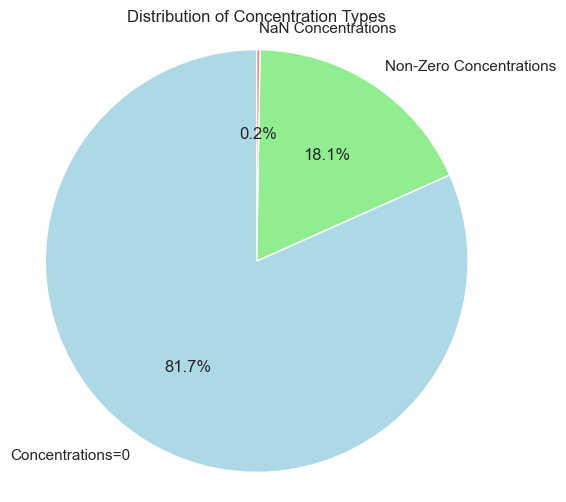

In [177]:
labels = ['Concentrations=0', 'Non-Zero Concentrations', 'NaN Concentrations']
counts = [zero_count, non_zero_count, nan_count]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Concentration Types')
plt.axis('equal')

plt.show()

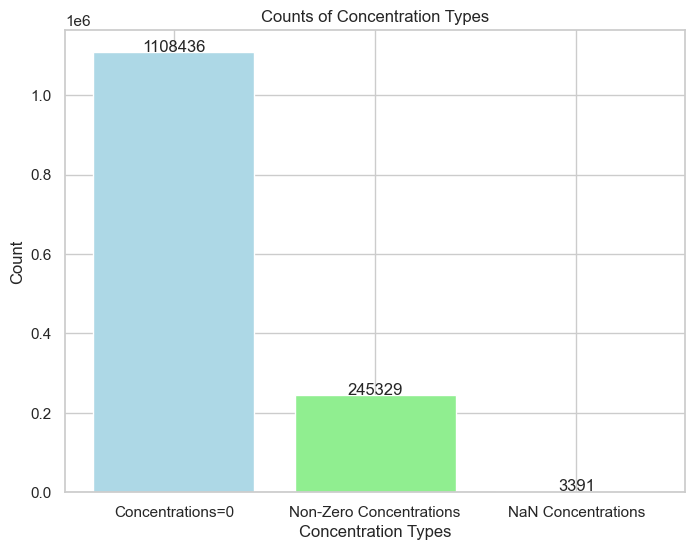

In [178]:
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Concentration Types')
plt.ylabel('Count')
plt.title('Counts of Concentration Types')

# Display the values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=12)

# Show the bar chart
plt.show()

In [183]:
all_states_dw[(all_states_dw['analyte'] == 'PFOS') & (all_states_dw['concentration'] == 49000)]

sample_id sampling_location                      data_source  \
297400       NaN               NaN  GAMA-Division of Drinking Water   

         latitude  longitude sampling_date pws_id water_system_name  \
297400  35.800923 -120.76116    2023-01-11    NaN               NaN   

        population  well_type  well_depth units     source_type       state  \
297400         NaN  Municipal         NaN  ng/L  drinking water  California   

       city county     MRL  DL analytical_methods is_detected analyte  \
297400  NaN    NaN  2000.0 NaN          EPA 537.1        True    PFOS   

        concentration  pfas_total              note    year  
297400        49000.0         NaN  APP LABORATORIES  2023.0

## Exploratory Data Analysis (EDA)

### Basic Descriptive Statistics

In [91]:
summary_stats_with_na = all_states_dw.groupby('analyte').agg(
    n=('concentration', 'count'),  # total count of non-NA values
    mean=('concentration', 'mean'),  # mean concentration
    std=('concentration', 'std'), # standard deviation
    min=('concentration', 'min'),  # minimum concentration
    Q1=('concentration', lambda x: x.quantile(0.25)),  # first quartile
    median=('concentration', 'median'),  # median
    Q3=('concentration', lambda x: x.quantile(0.75)),  # third quartile
    max=('concentration', 'max'),  # maximum concentration
    missing_count=('concentration', lambda x: x.isna().sum()),  # count of NA values
    total_count=('concentration', 'size'),  # total count including NAs
    total_concentration=('concentration', 'sum')
).reset_index()

summary_stats_with_na['%NA'] = (summary_stats_with_na['missing_count'] / summary_stats_with_na['total_count']) * 100

summary_stats_with_na = summary_stats_with_na.drop(columns=['missing_count', 'total_count'])

summary_stats_with_na

analyte      n       mean         std  min   Q1  median     Q3  \
0        10:2FTS     22   0.000000    0.000000  0.0  0.0   0.000   0.00   
1   11CL-PF3OUDS  57897   0.001108    0.055037  0.0  0.0   0.000   0.00   
2        3:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
3         4:2FTS  16085   0.053264    0.627074  0.0  0.0   0.000   0.00   
4        5:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
5         6:2FTS  18965   4.735221   48.087259  0.0  0.0   0.000   0.00   
6        7:3FTCA    360   0.103056    1.135140  0.0  0.0   0.000   0.00   
7         8:2FTS  18741   0.427673    7.011937  0.0  0.0   0.000   0.00   
8     9CL-PF3ONS  57865   0.000864    0.058568  0.0  0.0   0.000   0.00   
9          ADONA  36233   0.000740    0.048300  0.0  0.0   0.000   0.00   
10       ETFOSAA    713   0.011360    0.175212  0.0  0.0   0.000   0.00   
11          FOSA   9243   0.967417    5.537061  0.0  0.0   0.000   0.00   
12       HFPO-DA  58772   0.005579    0.303374  0.0  0.0   0.000   0.00   
13      NETFOSAA  58295   0.014534    0.258810  0.0  0.0   0.000   0.00   
14         NFDHA  10060   0.000359    0.028148  0.0  0.0   0.000   0.00   
15      NMEFOSAA  58628   0.006072    0.158651  0.0  0.0   0.000   0.00   
16          PFBA  19213  11.882102   28.145065  0.0  0.0   1.660  13.10   
17          PFBS  71456   5.316291   23.289255  0.0  0.0   0.000   3.41   
18          PFDA  71051   0.078433    0.709756  0.0  0.0   0.000   0.00   
19         PFDOA  70716   0.002631    0.178817  0.0  0.0   0.000   0.00   
20         PFDOS    450   0.000000    0.000000  0.0  0.0   0.000   0.00   
21          PFDS   9240   0.001549    0.053576  0.0  0.0   0.000   0.00   
22        PFEESA  10217   0.000342    0.021112  0.0  0.0   0.000   0.00   
23         PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000   2.10   
24         PFHPS  16510   2.255976   16.004778  0.0  0.0   0.000   0.00   
25         PFHXA  70797  13.089934   97.814173  0.0  0.0   0.000   4.10   
26        PFHXDA     40   0.000000    0.000000  0.0  0.0   0.000   0.00   
27         PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000   3.97   
28         PFMBA  10220   0.000605    0.037274  0.0  0.0   0.000   0.00   
29         PFMPA  10219   0.000556    0.020813  0.0  0.0   0.000   0.00   
30          PFNA  71401   0.398867    2.674971  0.0  0.0   0.000   0.00   
31          PFNS   6402   0.170236    2.174159  0.0  0.0   0.000   0.00   
32          PFOA  71577  10.585127   84.763038  0.0  0.0   0.629   6.32   
33         PFODA     40   0.184750    0.815585  0.0  0.0   0.000   0.00   
34          PFOS  71570  20.483585  307.310860  0.0  0.0   0.390   6.20   
35         PFPEA  19344  19.649716   52.697712  0.0  0.0   0.000  13.90   
36         PFPES  16453   8.972851   40.326138  0.0  0.0   0.000   0.00   
37        PFTEDA  60152   0.002220    0.084578  0.0  0.0   0.000   0.00   
38        PFTRDA  60529   0.001906    0.093792  0.0  0.0   0.000   0.00   
39        PFTREA    137   0.000000    0.000000  0.0  0.0   0.000   0.00   
40         PFUNA  70011   0.006075    0.217493  0.0  0.0   0.000   0.00   

            max  total_concentration       %NA  
0       0.00000         0.000000e+00  0.000000  
1       7.00000         6.417430e+01  0.001727  
2       0.00000         0.000000e+00  0.000000  
3      14.80000         8.567588e+02  0.000000  
4       0.00000         0.000000e+00  0.000000  
5    1800.00000         8.980348e+04  2.763536  
6      14.60000         3.710000e+01  0.000000  
7     190.00000         8.015020e+03  0.207668  
8       8.33000         4.999738e+01  0.001728  
9       7.80000         2.680027e+01  0.002760  
10      2.90000         8.100000e+00  0.000000  
11    176.00000         8.941838e+03  0.420168  
12     54.00000         3.278732e+02  0.247802  
13     20.00000         8.472510e+02  0.083985  
14      2.78060         3.616005e+00  0.000000  
15     29.80000         3.560020e+02  0.083508  
16    428.00000         2

In [92]:
summary_stats_with_na.sort_values(by='n', ascending=False)

analyte      n       mean         std  min   Q1  median     Q3  \
27         PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000   3.97   
23         PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000   2.10   
32          PFOA  71577  10.585127   84.763038  0.0  0.0   0.629   6.32   
34          PFOS  71570  20.483585  307.310860  0.0  0.0   0.390   6.20   
17          PFBS  71456   5.316291   23.289255  0.0  0.0   0.000   3.41   
30          PFNA  71401   0.398867    2.674971  0.0  0.0   0.000   0.00   
18          PFDA  71051   0.078433    0.709756  0.0  0.0   0.000   0.00   
25         PFHXA  70797  13.089934   97.814173  0.0  0.0   0.000   4.10   
19         PFDOA  70716   0.002631    0.178817  0.0  0.0   0.000   0.00   
40         PFUNA  70011   0.006075    0.217493  0.0  0.0   0.000   0.00   
38        PFTRDA  60529   0.001906    0.093792  0.0  0.0   0.000   0.00   
37        PFTEDA  60152   0.002220    0.084578  0.0  0.0   0.000   0.00   
12       HFPO-DA  58772   0.005579    0.303374  0.0  0.0   0.000   0.00   
15      NMEFOSAA  58628   0.006072    0.158651  0.0  0.0   0.000   0.00   
13      NETFOSAA  58295   0.014534    0.258810  0.0  0.0   0.000   0.00   
1   11CL-PF3OUDS  57897   0.001108    0.055037  0.0  0.0   0.000   0.00   
8     9CL-PF3ONS  57865   0.000864    0.058568  0.0  0.0   0.000   0.00   
9          ADONA  36233   0.000740    0.048300  0.0  0.0   0.000   0.00   
35         PFPEA  19344  19.649716   52.697712  0.0  0.0   0.000  13.90   
16          PFBA  19213  11.882102   28.145065  0.0  0.0   1.660  13.10   
5         6:2FTS  18965   4.735221   48.087259  0.0  0.0   0.000   0.00   
7         8:2FTS  18741   0.427673    7.011937  0.0  0.0   0.000   0.00   
24         PFHPS  16510   2.255976   16.004778  0.0  0.0   0.000   0.00   
36         PFPES  16453   8.972851   40.326138  0.0  0.0   0.000   0.00   
3         4:2FTS  16085   0.053264    0.627074  0.0  0.0   0.000   0.00   
28         PFMBA  10220   0.000605    0.037274  0.0  0.0   0.000   0.00   
29         PFMPA  10219   0.000556    0.020813  0.0  0.0   0.000   0.00   
22        PFEESA  10217   0.000342    0.021112  0.0  0.0   0.000   0.00   
14         NFDHA  10060   0.000359    0.028148  0.0  0.0   0.000   0.00   
11          FOSA   9243   0.967417    5.537061  0.0  0.0   0.000   0.00   
21          PFDS   9240   0.001549    0.053576  0.0  0.0   0.000   0.00   
31          PFNS   6402   0.170236    2.174159  0.0  0.0   0.000   0.00   
10       ETFOSAA    713   0.011360    0.175212  0.0  0.0   0.000   0.00   
20         PFDOS    450   0.000000    0.000000  0.0  0.0   0.000   0.00   
6        7:3FTCA    360   0.103056    1.135140  0.0  0.0   0.000   0.00   
4        5:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
2        3:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
39        PFTREA    137   0.000000    0.000000  0.0  0.0   0.000   0.00   
33         PFODA     40   0.184750    0.815585  0.0  0.0   0.000   0.00   
26        PFHXDA     40   0.000000    0.000000  0.0  0.0   0.000   0.00   
0        10:2FTS     22   0.000000    0.000000  0.0  0.0   0.000   0.00   

            max  total_concentration       %NA  
27  14000.00000         1.734936e+06  0.140508  
23  10000.00000         2.400232e+05  0.013958  
32   8800.00000         7.576517e+05  0.146480  
34  49000.00000         1.466010e+06  0.181311  
17   2200.00000         3.798809e+05  0.146728  
30    300.00000         2.847947e+04  0.141255  
18     54.00000         5.572759e+03  0.081565  
25  20000.00000         9.267280e+05  0.087498  
19     39.00000         1.860732e+02  0.087598  
40     26.90000         4.253071e+02  0.069940  
38     13.90000         1.153650e+02  0.080887  
37     10.40000         1.335340e+02  0.081394  
12     54.00000         3.278732e+02  0.247802  
15     29.80000         3.560020e+02  0.083508  
13     20.00000         8.472510e+02  0.083985  
1       7.00000         6.417430e+01  0.001727  
8       8.33000         4

In [93]:
pfas_analytes = ['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']
filtered_summary_stats = summary_stats_with_na[summary_stats_with_na['analyte'].isin(pfas_analytes)]
filtered_summary_stats

analyte      n       mean         std  min   Q1  median    Q3      max  \
17    PFBS  71456   5.316291   23.289255  0.0  0.0   0.000  3.41   2200.0   
23   PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000  2.10  10000.0   
27   PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000  3.97  14000.0   
30    PFNA  71401   0.398867    2.674971  0.0  0.0   0.000  0.00    300.0   
32    PFOA  71577  10.585127   84.763038  0.0  0.0   0.629  6.32   8800.0   
34    PFOS  71570  20.483585  307.310860  0.0  0.0   0.390  6.20  49000.0   

    total_concentration       %NA  
17         3.798809e+05  0.146728  
23         2.400232e+05  0.013958  
27         1.734936e+06  0.140508  
30         2.847947e+04  0.141255  
32         7.576517e+05  0.146480  
34         1.466010e+06  0.181311

In [94]:
filtered_summary_stats.sort_values(by='n', ascending=False)

analyte      n       mean         std  min   Q1  median    Q3      max  \
27   PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000  3.97  14000.0   
23   PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000  2.10  10000.0   
32    PFOA  71577  10.585127   84.763038  0.0  0.0   0.629  6.32   8800.0   
34    PFOS  71570  20.483585  307.310860  0.0  0.0   0.390  6.20  49000.0   
17    PFBS  71456   5.316291   23.289255  0.0  0.0   0.000  3.41   2200.0   
30    PFNA  71401   0.398867    2.674971  0.0  0.0   0.000  0.00    300.0   

    total_concentration       %NA  
27         1.734936e+06  0.140508  
23         2.400232e+05  0.013958  
32         7.576517e+05  0.146480  
34         1.466010e+06  0.181311  
17         3.798809e+05  0.146728  
30         2.847947e+04  0.141255

### Plot: Box plot for each PFAS for the US and each state. 

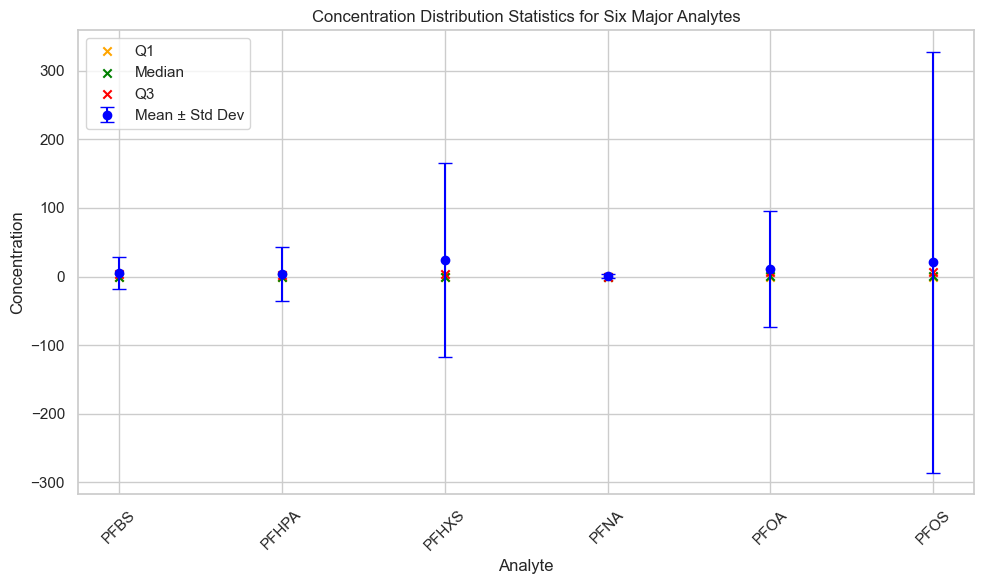

In [95]:
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_summary_stats['analyte'], filtered_summary_stats['mean'], yerr=filtered_summary_stats['std'], 
             fmt='o', capsize=5, label='Mean ± Std Dev', color='blue')
plt.scatter(filtered_summary_stats['analyte'], filtered_summary_stats['Q1'], label='Q1', color='orange', marker='x')
plt.scatter(filtered_summary_stats['analyte'], filtered_summary_stats['median'], label='Median', color='green', marker='x')
plt.scatter(filtered_summary_stats['analyte'], filtered_summary_stats['Q3'], label='Q3', color='red', marker='x')

# Adding labels and title
plt.xlabel('Analyte')
plt.ylabel('Concentration')
plt.title('Concentration Distribution Statistics for Six Major Analytes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

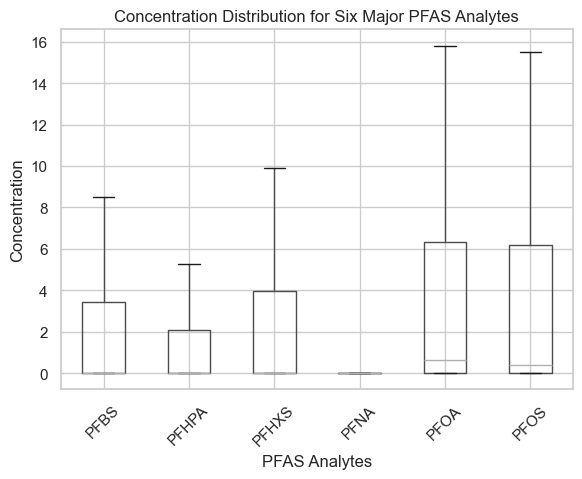

In [166]:
filtered_df = all_states_dw[all_states_dw['analyte'].isin(pfas_analytes)]

plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='concentration', by='analyte', grid=False, showfliers=False)

plt.title('Concentration Distribution for Six Major PFAS Analytes')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('PFAS Analytes')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/1752139120.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




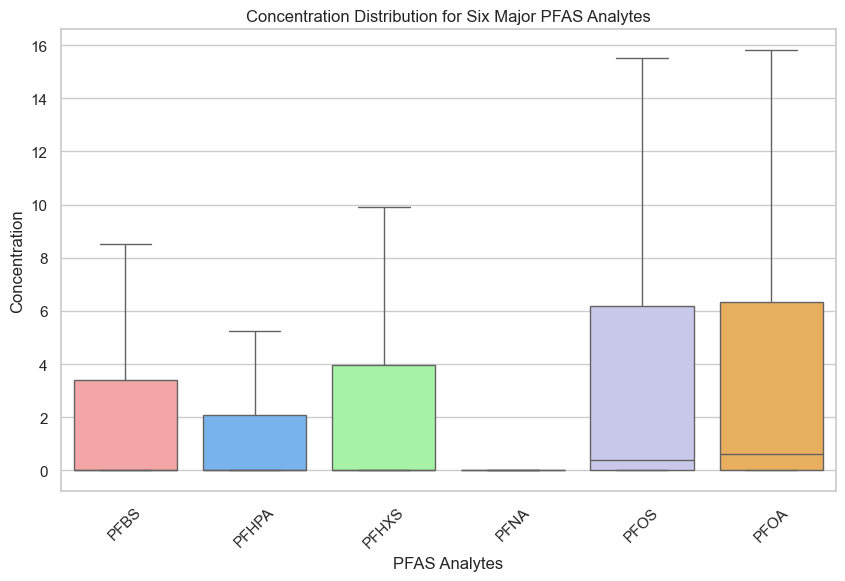

In [187]:
filtered_df = all_states_dw[all_states_dw['analyte'].isin(pfas_analytes)]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB347']

# Create a boxplot with custom colors and adjusted lines
plt.figure(figsize=(10, 6))

# Seaborn boxplot with custom color palette
sns.boxplot(x='analyte', y='concentration', data=filtered_df, palette=colors, showfliers=False)

# Customizing the plot
plt.title('Concentration Distribution for Six Major PFAS Analytes')
plt.xlabel('PFAS Analytes')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/139021068.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




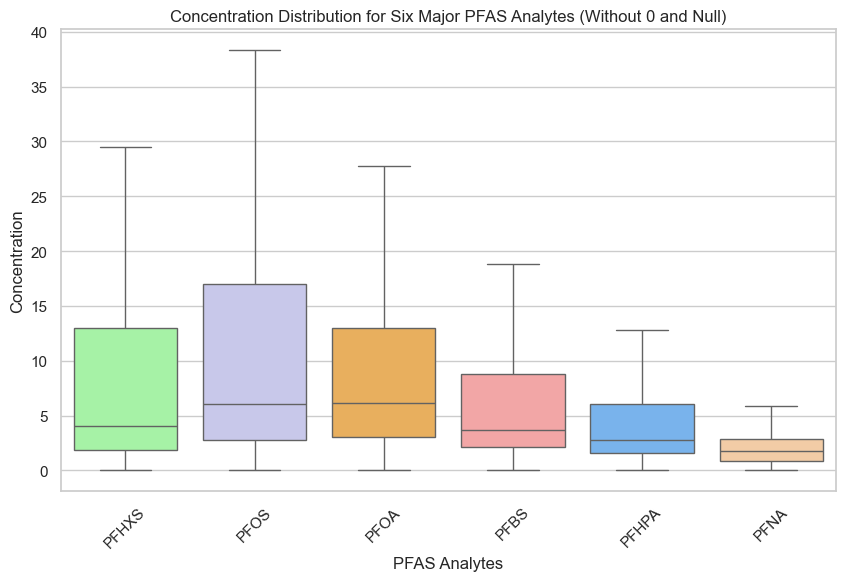

In [192]:
filtered_df = all_states_dw_nozero[all_states_dw_nozero['analyte'].isin(pfas_analytes)]
colors = ['#99FF99', '#C2C2F0', '#FFB347', '#FF9999', '#66B3FF', '#FFCC99']

# Create a boxplot with custom colors and adjusted lines
plt.figure(figsize=(10, 6))

# Seaborn boxplot with custom color palette
sns.boxplot(x='analyte', y='concentration', data=filtered_df, palette=colors, showfliers=False)

# Customizing the plot
plt.title('Concentration Distribution for Six Major PFAS Analytes (Without 0 and Null)')
plt.xlabel('PFAS Analytes')
plt.ylabel('Concentration')
plt.xticks(rotation=45)

plt.show()

In [170]:
summary_stats_nozero = all_states_dw_nozero.groupby('analyte').agg(
    n=('concentration', 'count'),  # total count of non-NA values
    mean=('concentration', 'mean'),  # mean concentration
    std=('concentration', 'std'), # standard deviation
    min=('concentration', 'min'),  # minimum concentration
    Q1=('concentration', lambda x: x.quantile(0.25)),  # first quartile
    median=('concentration', 'median'),  # median
    Q3=('concentration', lambda x: x.quantile(0.75)),  # third quartile
    max=('concentration', 'max'),  # maximum concentration
    missing_count=('concentration', lambda x: x.isna().sum()),  # count of NA values
    total_count=('concentration', 'size')
).reset_index()

summary_stats_nozero['%NA'] = (summary_stats_nozero['missing_count'] / summary_stats_nozero['total_count']) * 100

summary_stats_nozero = summary_stats_nozero.drop(columns=['missing_count', 'total_count'])

summary_stats_nozero

analyte      n       mean         std        min         Q1  \
0   11CL-PF3OUDS     84   0.763980    1.234132   0.010254   0.072859   
1         4:2FTS    227   3.774268    3.725402   0.011169   0.116587   
2         6:2FTS   1582  56.765787  157.421374   0.018267   3.700000   
3        7:3FTCA      3  12.366667    1.950214  11.000000  11.250000   
4         8:2FTS    252  31.805636   51.661616   0.012657   2.100000   
5     9CL-PF3ONS     78   0.640992    1.470396   0.002782   0.012626   
6          ADONA     87   0.308049    0.941863   0.003481   0.013677   
7        ETFOSAA      3   2.700000    0.200000   2.500000   2.600000   
8           FOSA   1788   5.001028   11.763455   0.140000   1.100000   
9        HFPO-DA    118   2.778587    6.201629   0.104856   0.994750   
10      NETFOSAA    464   1.825972    2.262448   0.150000   0.735750   
11         NFDHA      7   0.516572    1.008556   0.048564   0.049780   
12      NMEFOSAA    265   1.343404    1.945811   0.140000   0.700000   
13          PFBA  10033  22.753995   35.631591   0.006400   4.700000   
14          PFBS  33551  11.322492   32.972369   0.005300   2.100000   
15          PFDA   2260   2.465823    3.155081   0.002300   0.876250   
16         PFDOA     86   2.163642    4.676656   0.022359   0.162010   
17          PFDS     10   1.431000    0.820859   0.530000   0.712500   
18        PFEESA     39   0.089701    0.334066   0.001768   0.008960   
19         PFHPA  27439   8.747519   63.762178   0.002900   1.630000   
20         PFHPS   2326  16.012967   39.980820   0.002000   1.900000   
21         PFHXA  33432  27.719791  140.909712   0.004300   2.310000   
22         PFHXS  34995  49.576672  199.062833   0.002700   1.900000   
23         PFMBA     46   0.134432    0.545085   0.004881   0.015868   
24         PFMPA     52   0.109218    0.273298   0.006474   0.021506   
25          PFNA   9987   2.851654    6.645785   0.002100   0.850000   
26          PFNS     68  16.027206   13.916377   0.620000   3.675000   
27          PFOA  36427  20.799178  117.921217   0.008100   3.070000   
28         PFODA      2   3.695000    0.035355   3.670000   3.682500   
29          PFOS  36082  40.629960  431.867129   0.003800   2.800000   
30         PFPEA   9255  41.070136   70.177201   0.011000   5.000000   
31         PFPES   3957  37.308646   75.534794   0.003100   4.300000   
32        PFTEDA    103   1.296447    1.588747   0.077000   0.474000   
33        PFTRDA     65   1.774846    2.263571   0.130000   0.550000   
34         PFUNA    150   2.835381    3.761659   0.034318   0.502750   

       median         Q3          max  %NA  
0    0.551500   0.712750      7.00000  0.0  
1    3.300000   5.000000     14.80000  0.0  
2   10.200000  38.250000   1800.00000  0.0  
3   11.500000  13.050000     14.60000  0.0  
4    8.950000  26.175000    190.00000  0.0  
5    0.037091   0.430000      8.33000  0.0  
6    0.032840   0.166450      7.80000  0.0  
7    2.700000   2.800000      2.90000  0.0  
8    2.100000   3.800000    176.00000  0.0  
9    1.800000   2.500000     54.00000  0.0  
10   1.050000   2.000000     20.00000  0.0  
11   0.053775   0.316752      2.78060  0.0  
12   0.937000   1.440000     29.80000  0.0  
13  12.400000  25.600000    428.00000  0.0  
14   3.700000   8.800000   2200.00000  0.0  
15   2.000000   2.800000     54.00000  0.0  
16   0.670500   2.460000     39.00000  0.0  
17   1.345000   1.900000      2.70000  0.0  
18   0.014729   0.030742      2.08896  0.0  
19   2.800000   6.100000  10000.00000  0.0  
20   3.600000  12.150000    418.00000  0.0  
21   4.500000  12.056200  20000.00000  0.0  
22   4.100000  13.000000  14000.00000  0.0  
23   0.027039   0.061009      3.71944  0.0  
24   0.042623   0.072981      1.88502  0.0  
25   1.800000   2.865000    300.00000  0.0  
26  10.700000  27.550000     43.30000  0.0  
27   6.200000  13.000000   8800.00000  0.0  
28   3.695000   3.707500      3.72000  0.0  
29   6.100000  17.000000  49000.00000  0.0  
30  15.100000  48.000

In [171]:
filtered_summary_stats = summary_stats_nozero[summary_stats_nozero['analyte'].isin(pfas_analytes)]
filtered_summary_stats

analyte      n       mean         std     min    Q1  median      Q3  \
14    PFBS  33551  11.322492   32.972369  0.0053  2.10     3.7   8.800   
19   PFHPA  27439   8.747519   63.762178  0.0029  1.63     2.8   6.100   
22   PFHXS  34995  49.576672  199.062833  0.0027  1.90     4.1  13.000   
25    PFNA   9987   2.851654    6.645785  0.0021  0.85     1.8   2.865   
27    PFOA  36427  20.799178  117.921217  0.0081  3.07     6.2  13.000   
29    PFOS  36082  40.629960  431.867129  0.0038  2.80     6.1  17.000   

        max  %NA  
14   2200.0  0.0  
19  10000.0  0.0  
22  14000.0  0.0  
25    300.0  0.0  
27   8800.0  0.0  
29  49000.0  0.0

In [172]:
filtered_summary_stats.sort_values(by='n', ascending=False)

analyte      n       mean         std     min    Q1  median      Q3  \
27    PFOA  36427  20.799178  117.921217  0.0081  3.07     6.2  13.000   
29    PFOS  36082  40.629960  431.867129  0.0038  2.80     6.1  17.000   
22   PFHXS  34995  49.576672  199.062833  0.0027  1.90     4.1  13.000   
14    PFBS  33551  11.322492   32.972369  0.0053  2.10     3.7   8.800   
19   PFHPA  27439   8.747519   63.762178  0.0029  1.63     2.8   6.100   
25    PFNA   9987   2.851654    6.645785  0.0021  0.85     1.8   2.865   

        max  %NA  
27   8800.0  0.0  
29  49000.0  0.0  
22  14000.0  0.0  
14   2200.0  0.0  
19  10000.0  0.0  
25    300.0  0.0

## 2. Data distribution:

### Plot: Histograms for each PFAS for the US and each state

Average concentration of all PFAS analytes for each states:

In [96]:
all_states_dw.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

analyte  concentration
27         PFHXS      24.169845
34          PFOS      20.483585
35         PFPEA      19.649716
25         PFHXA      13.089934
16          PFBA      11.882102
32          PFOA      10.585127
36         PFPES       8.972851
17          PFBS       5.316291
5         6:2FTS       4.735221
23         PFHPA       3.350735
24         PFHPS       2.255976
11          FOSA       0.967417
7         8:2FTS       0.427673
30          PFNA       0.398867
33         PFODA       0.184750
31          PFNS       0.170236
6        7:3FTCA       0.103056
18          PFDA       0.078433
3         4:2FTS       0.053264
13      NETFOSAA       0.014534
10       ETFOSAA       0.011360
40         PFUNA       0.006075
15      NMEFOSAA       0.006072
12       HFPO-DA       0.005579
19         PFDOA       0.002631
37        PFTEDA       0.002220
38        PFTRDA       0.001906
21          PFDS       0.001549
1   11CL-PF3OUDS       0.001108
8     9CL-PF3ONS       0.000864
9          ADONA       0.000740
28         PFMBA       0.000605
29         PFMPA       0.000556
14         NFDHA       0.000359
22        PFEESA       0.000342
39        PFTREA       0.000000
0        10:2FTS       0.000000
26        PFHXDA       0.000000
4        5:3FTCA       0.000000
2        3:3FTCA       0.000000
20         PFDOS       0.000000

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2663116462.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




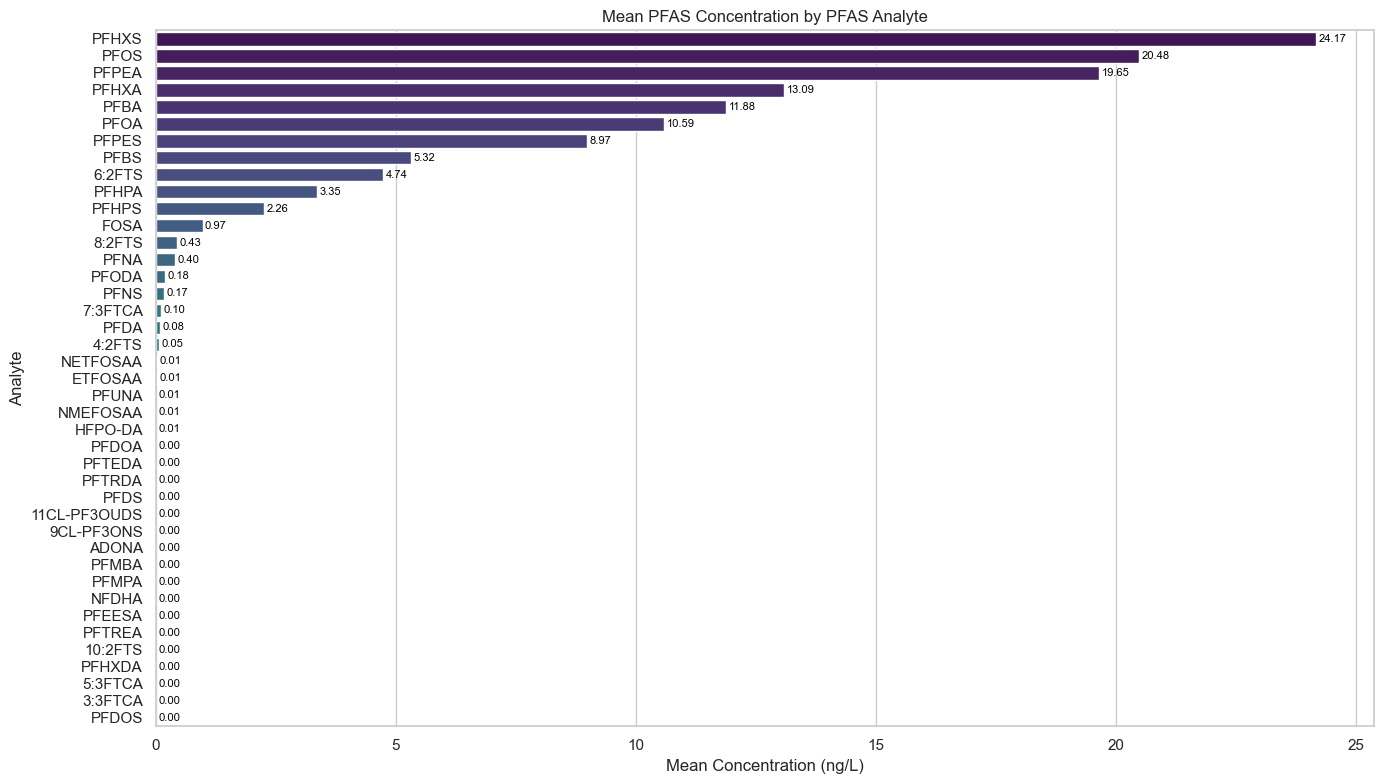

In [97]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    y='analyte', 
    x='concentration', 
    data=all_states_dw[~all_states_dw['analyte'].isin(['PFOA+PFOS', 'PFAS6'])]
.groupby('analyte')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

# Add labels and title
plt.title('Mean PFAS Concentration by PFAS Analyte')
plt.xlabel('Mean Concentration (ng/L)')
plt.ylabel('Analyte')
plt.tight_layout()

# Annotate each bar with the mean concentration, rounded to 2 decimal places
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_width() + 0.05, p.get_y() + p.get_height() / 2.),  # Position of the text, slightly outside the bar
        ha='left', va='center',  # Align text slightly outside the bar and vertically centered
        fontsize=8, color='black',  # Customize text appearance
    )

plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/1678492984.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




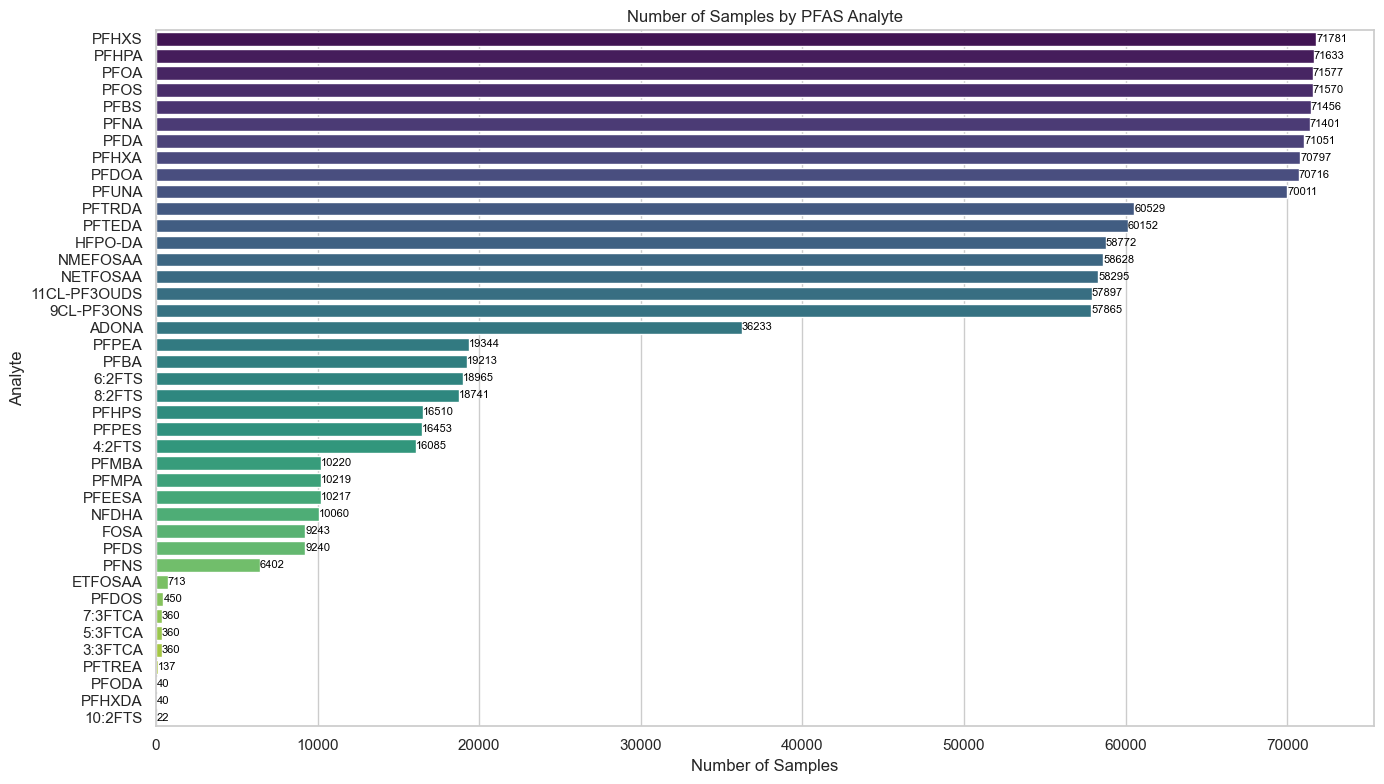

In [196]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    y='analyte', 
    x='concentration', 
    data=all_states_dw[~all_states_dw['analyte'].isin(['PFOA+PFOS', 'PFAS6'])]
.groupby('analyte')['concentration'].count().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

# Add labels and title
plt.title('Number of Samples by PFAS Analyte')
plt.xlabel('Number of Samples')
plt.ylabel('Analyte')
plt.tight_layout()

# Annotate each bar with the mean concentration, rounded to 2 decimal places
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),  # Format the concentration value to 2 decimal places
        (p.get_width() + 0.05, p.get_y() + p.get_height() / 2.),  # Position of the text, slightly outside the bar
        ha='left', va='center',  # Align text slightly outside the bar and vertically centered
        fontsize=8, color='black',  # Customize text appearance
    )

plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/3771083409.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




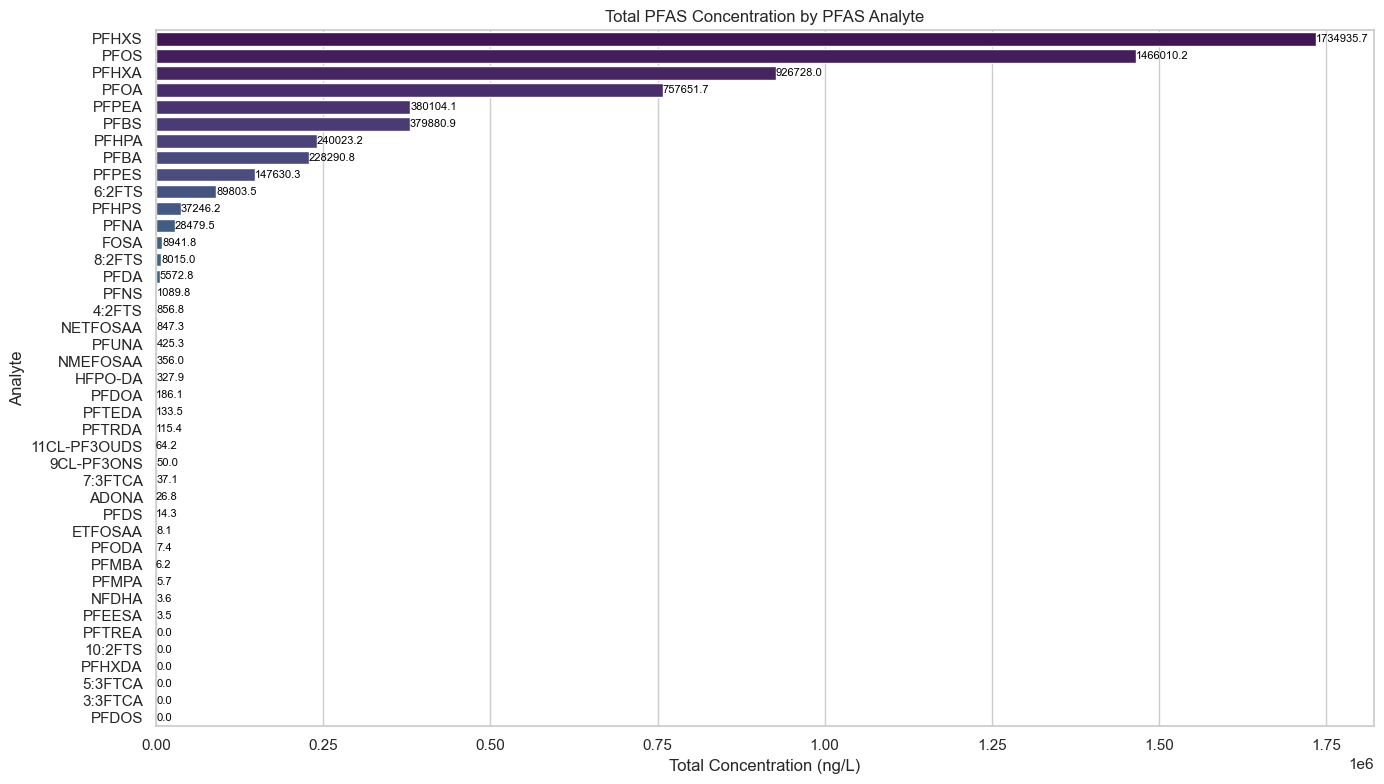

In [99]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    y='analyte', 
    x='concentration', 
    data=all_states_dw[~all_states_dw['analyte'].isin(['PFOA+PFOS', 'PFAS6'])]
.groupby('analyte')['concentration'].sum().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

# Add labels and title
plt.title('Total PFAS Concentration by PFAS Analyte')
plt.xlabel('Total Concentration (ng/L)')
plt.ylabel('Analyte')
plt.tight_layout()

# Annotate each bar with the mean concentration, rounded to 2 decimal places
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.1f'),  # Format the concentration value to 2 decimal places
        (p.get_width() + 0.05, p.get_y() + p.get_height() / 2.),  # Position of the text, slightly outside the bar
        ha='left', va='center',  # Align text slightly outside the bar and vertically centered
        fontsize=8, color='black',  # Customize text appearance
    )

plt.show()

## 4. Geospatial analysis and plot

In [102]:
all_states_dw.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

state  concentration
9             Guam     410.000000
6         Delaware      33.111607
39           Texas      28.149838
37    South Dakota      22.404173
0           Alaska      17.325501
13          Kansas      11.917708
4         Colorado       8.549391
15           Maine       8.018752
24   New Hampshire       7.740821
19       Minnesota       5.796244
38       Tennessee       5.747486
31        Oklahoma       5.428463
27        New York       4.731533
2         Arkansas       4.574583
22         Montana       4.513145
26      New Mexico       4.077241
18        Michigan       4.006663
25      New Jersey       3.617431
44      Washington       2.727241
40            Utah       2.500000
7          Florida       2.485453
8          Georgia       2.434722
3       California       2.341887
34     Puerto Rico       2.333333
11        Illinois       2.313158
30            Ohio       2.191109
36  South Carolina       2.177407
42  Virgin Islands       2.000000
1          Arizona       1.806973
33    Pennsylvania       1.777702
16        Maryland       1.552085
23        Nebraska       1.333333
35    Rhode Island       1.115718
17   Massachusetts       1.060352
20     Mississippi       1.000000
46         Wyoming       1.000000
43        Virginia       0.765821
45       Wisconsin       0.426566
28  North Carolina       0.338440
41         Vermont       0.267231
10          Hawaii       0.223309
32          Oregon       0.104409
12         Indiana       0.104254
29    North Dakota       0.021363
5      Connecticut            NaN
14       Louisiana            NaN
21        Missouri            NaN

In [103]:
filtered_df = all_states_dw[all_states_dw['analyte'].isin(pfas_analytes)]

grouped_df = filtered_df.groupby(['state', 'analyte'])['concentration'].mean().reset_index()

pivot_df = grouped_df.pivot(index='state', columns='analyte', values='concentration').reset_index()

pivot_df

analyte           state       PFBS      PFHPA       PFHXS      PFNA  \
0                Alaska   5.745000   1.849268   25.595122  0.104878   
1               Arizona   1.807692   0.800000    9.047692  0.000000   
2              Arkansas   2.445000   1.770000   46.175000  0.000000   
3            California   3.572337   2.373311    8.132019  0.489864   
4              Colorado  14.290361   5.318322   42.241514  0.534624   
5           Connecticut        NaN        NaN         NaN       NaN   
6              Delaware  20.775000   9.291071   94.862500  3.460714   
7               Florida   5.645433   2.759785    7.403150  0.351844   
8               Georgia   5.000000   1.733333   14.366667  0.000000   
9                  Guam        NaN        NaN         NaN       NaN   
10               Hawaii   0.530000   0.527778    0.848889  0.000000   
11             Illinois   0.000000   1.200000    4.757895  0.547368   
12              Indiana   0.533137   0.079478    0.197896  0.049854   
13               Kansas  22.656250   6.937500  123.156250  0.000000   
14            Louisiana        NaN        NaN         NaN       NaN   
15                Maine   6.597549   3.283689   44.162575  0.585904   
16             Maryland   3.591821   1.602460    4.208175  0.277302   
17        Massachusetts   2.102506   1.849213    2.160359  0.328471   
18             Michigan   1.227979   6.127673   26.289560  0.066550   
19            Minnesota   3.665846   2.390000   41.094462  0.000000   
20          Mississippi        NaN        NaN         NaN       NaN   
21             Missouri        NaN        NaN         NaN       NaN   
22              Montana   3.486000   4.515000   30.348250  0.050000   
23             Nebraska        NaN        NaN         NaN       NaN   
24        New Hampshire   5.624430   5.916759   41.674456  0.655063   
25           New Jersey   1.983593   1.697186   17.475808  0.156527   
26           New Mexico   0.820000   0.808571    1.276000  0.000000   
27             New York   2.131857  12.475571   10.207500  6.050100   
28       North Carolina   1.521778   0.286741    0.553185  0.057926   
29         North Dakota   0.066372   0.014139    0.059737  0.000000   
30                 Ohio   1.978202   1.015385   12.212022  0.012135   
31             Oklahoma   7.210909   1.683636   79.861818  0.000000   
32               Oregon   0.149847   0.188776    0.386735  0.000000   
33         Pennsylvania   3.633383   2.528306    3.544597  1.304916   
34          Puerto Rico        NaN        NaN         NaN       NaN   
35         Rhode Island   0.901486   1.247397    1.187644  0.270267   
36       South Carolina   4.755033   2.203611    7.393505  0.381628   
37         South Dakota  25.050733  15.094667  142.016540  0.578800   
38            Tennessee   0.000000  15.660000    0.000000  0.680000   
39                Texas  28.434995  16.349274  190.768697  0.557279   
40                 Utah        NaN        NaN         NaN       NaN   
41              Vermont   0.362523   0.225890    0.652437  0.192645   
42       Virgin Islands        NaN        NaN         NaN       NaN   
43             Virginia   1.075192   0.728980    2.243338  0.145576   
44           Washington   4.171716   2.301308   18.081996  0.170777   
45            Wisconsin   1.045935   0.444558    1.907599  0.108876   
46              Wyoming        NaN        NaN         NaN       NaN   

analyte       PFOA        PFOS  
0         6.430909  262.546222  
1         1.970000    8.728571  
2        19.115000   18.080000  
3         6.381548   13.717640  
4        10.068270   29.418803  
5              NaN         NaN  
6        11.923214  335.080357  
7         7.813446   15.783775  
8         2.850000   20.400000  
9              NaN  410.000000  
10        0.461111    0.976667  
11        9.742105   37.710526  
12        0.367603    0.237662  
13       21.681250   36.181250  
14             NaN         NaN  
15       16.453617   28.075802  
16        6.632167    6.513016

In [104]:
pivot_df = pivot_df.reindex(columns=['state'] + pfas_analytes).fillna(0)

In [105]:
state_code_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [106]:
pivot_df['state_code'] = pivot_df['state'].map(state_code_mapping)

# Reorder the columns so state_code is next to state
pivot_df = pivot_df[['state', 'state_code'] + pfas_analytes]

In [107]:
pivot_df = pivot_df.reset_index()  # Resetting the index if it was set incorrectly
pivot_df.columns.name = None

In [108]:
pivot_df = pivot_df.drop(columns=['index'])
pivot_df

state state_code      PFHPA       PFOA      PFNA       PFBS  \
0           Alaska         AK   1.849268   6.430909  0.104878   5.745000   
1          Arizona         AZ   0.800000   1.970000  0.000000   1.807692   
2         Arkansas         AR   1.770000  19.115000  0.000000   2.445000   
3       California         CA   2.373311   6.381548  0.489864   3.572337   
4         Colorado         CO   5.318322  10.068270  0.534624  14.290361   
5      Connecticut         CT   0.000000   0.000000  0.000000   0.000000   
6         Delaware         DE   9.291071  11.923214  3.460714  20.775000   
7          Florida         FL   2.759785   7.813446  0.351844   5.645433   
8          Georgia         GA   1.733333   2.850000  0.000000   5.000000   
9             Guam        NaN   0.000000   0.000000  0.000000   0.000000   
10          Hawaii         HI   0.527778   0.461111  0.000000   0.530000   
11        Illinois         IL   1.200000   9.742105  0.547368   0.000000   
12         Indiana         IN   0.079478   0.367603  0.049854   0.533137   
13          Kansas         KS   6.937500  21.681250  0.000000  22.656250   
14       Louisiana         LA   0.000000   0.000000  0.000000   0.000000   
15           Maine         ME   3.283689  16.453617  0.585904   6.597549   
16        Maryland         MD   1.602460   6.632167  0.277302   3.591821   
17   Massachusetts         MA   1.849213   4.832653  0.328471   2.102506   
18        Michigan         MI   6.127673   5.840821  0.066550   1.227979   
19       Minnesota         MN   2.390000  22.804118  0.000000   3.665846   
20     Mississippi         MS   0.000000   1.000000  0.000000   0.000000   
21        Missouri         MO   0.000000   0.000000  0.000000   0.000000   
22         Montana         MT   4.515000  16.283810  0.050000   3.486000   
23        Nebraska         NE   0.000000   1.000000  0.000000   0.000000   
24   New Hampshire         NH   5.916759  13.036465  0.655063   5.624430   
25      New Jersey         NJ   1.697186   3.682426  0.156527   1.983593   
26      New Mexico         NM   0.808571   0.000000  0.000000   0.820000   
27        New York         NY  12.475571  18.855887  6.050100   2.131857   
28  North Carolina         NC   0.286741   1.284191  0.057926   1.521778   
29    North Dakota         ND   0.014139   0.068633  0.000000   0.066372   
30            Ohio         OH   1.015385   3.239669  0.012135   1.978202   
31        Oklahoma         OK   1.683636   8.430357  0.000000   7.210909   
32          Oregon         OR   0.188776   0.179648  0.000000   0.149847   
33    Pennsylvania         PA   2.528306   7.569147  1.304916   3.633383   
34     Puerto Rico        NaN   0.000000   2.000000  0.000000   0.000000   
35    Rhode Island         RI   1.247397  16.062953  0.270267   0.901486   
36  South Carolina         SC   2.203611  11.085119  0.381628   4.755033   
37    South Dakota         SD  15.094667  26.881667  0.578800  25.050733   
38       Tennessee         TN  15.660000  37.940000  0.680000   0.000000   
39           Texas         TX  16.349274  61.718535  0.557279  28.434995   
40            Utah         UT   0.000000   3.000000  0.000000   0.000000   
41         Vermont         VT   0.225890   1.043225  0.192645   0.362523   
42  Virgin Islands        NaN   0.000000   0.000000  0.000000   0.000000   
43        Virginia         VA   0.728980   4.660347  0.145576   1.075192   
44      Washington         WA   2.301308   6.811734  0.170777   4.171716   
45       Wisconsin         WI   0.444558   1.300227  0.108876   1.045935   
46         Wyoming         WY   0.000000   1.000000  0.000000   0.000000   

         PFHXS        PFOS  
0    25.595122  262.546222  
1     9.047692    8.728571  
2    46.175000   18.080000  
3     8.132019   13.717640  
4    42.241514   29.418803  
5     0.000000    0.000000  
6    94.862500  335.080357  
7     7.403150   15.783775  
8    14.366667   20.400000  
9     0.000000  410.000000  
10    0.848889    0.976667  
11    4.757895  

In [109]:
pivot_df = pivot_df.dropna(subset=['state_code'])

In [152]:
pivot_df.to_csv('6pfas_avg_dw.csv')

In [110]:
state_coordinates = {
    'AL': [32.806671, -86.791130],
    'AK': [61.370716, -152.404419],
    'AZ': [33.729759, -111.431221],
    'AR': [34.969704, -92.373123],
    'CA': [36.116203, -119.681564],
    'CO': [39.059811, -105.311104],
    'CT': [41.597782, -72.755371],
    'DE': [39.318523, -75.507141],
    'FL': [27.766279, -81.686783],
    'GA': [33.040619, -83.643074],
    'HI': [21.094318, -157.498337],
    'ID': [44.240459, -114.478828],
    'IL': [40.349457, -88.986137],
    'IN': [39.849426, -86.258278],
    'IA': [42.011539, -93.210526],
    'KS': [38.526600, -96.726486],
    'KY': [37.668140, -84.670067],
    'LA': [31.169546, -91.867805],
    'ME': [44.693947, -69.381927],
    'MD': [39.063946, -76.802101],
    'MA': [42.230171, -71.530106],
    'MI': [43.326618, -84.536095],
    'MN': [45.694454, -93.900192],
    'MS': [32.741646, -89.678696],
    'MO': [38.456085, -92.288368],
    'MT': [46.921925, -110.454353],
    'NE': [41.125370, -98.268082],
    'NV': [38.313515, -117.055374],
    'NH': [43.452492, -71.563896],
    'NJ': [40.298904, -74.521011],
    'NM': [34.840515, -106.248482],
    'NY': [42.165726, -74.948051],
    'NC': [35.630066, -79.806419],
    'ND': [47.528912, -99.784012],
    'OH': [40.388783, -82.764915],
    'OK': [35.565342, -96.928917],
    'OR': [44.572021, -122.070938],
    'PA': [40.590752, -77.209755],
    'RI': [41.680893, -71.511780],
    'SC': [33.856892, -80.945007],
    'SD': [44.299782, -99.438828],
    'TN': [35.747845, -86.692345],
    'TX': [31.054487, -97.563461],
    'UT': [40.150032, -111.862434],
    'VT': [44.045876, -72.710686],
    'VA': [37.769337, -78.169968],
    'WA': [47.400902, -121.490494],
    'WV': [38.491226, -80.954456],
    'WI': [44.268543, -89.616508],
    'WY': [42.755966, -107.302490]
}

In [111]:
pfas_avg_dw = all_states_dw.groupby('state')['concentration'].mean().reset_index() # mean concentration

In [112]:
pfas_avg_dw['state'] = pfas_avg_dw['state'].map(state_code_mapping)

In [113]:
pfas_avg_dw.sort_values(by='concentration', ascending=False)

state  concentration
9    NaN     410.000000
6     DE      33.111607
39    TX      28.149838
37    SD      22.404173
0     AK      17.325501
13    KS      11.917708
4     CO       8.549391
15    ME       8.018752
24    NH       7.740821
19    MN       5.796244
38    TN       5.747486
31    OK       5.428463
27    NY       4.731533
2     AR       4.574583
22    MT       4.513145
26    NM       4.077241
18    MI       4.006663
25    NJ       3.617431
44    WA       2.727241
40    UT       2.500000
7     FL       2.485453
8     GA       2.434722
3     CA       2.341887
34   NaN       2.333333
11    IL       2.313158
30    OH       2.191109
36    SC       2.177407
42   NaN       2.000000
1     AZ       1.806973
33    PA       1.777702
16    MD       1.552085
23    NE       1.333333
35    RI       1.115718
17    MA       1.060352
20    MS       1.000000
46    WY       1.000000
43    VA       0.765821
45    WI       0.426566
28    NC       0.338440
41    VT       0.267231
10    HI       0.223309
32    OR       0.104409
12    IN       0.104254
29    ND       0.021363
5     CT            NaN
14    LA            NaN
21    MO            NaN

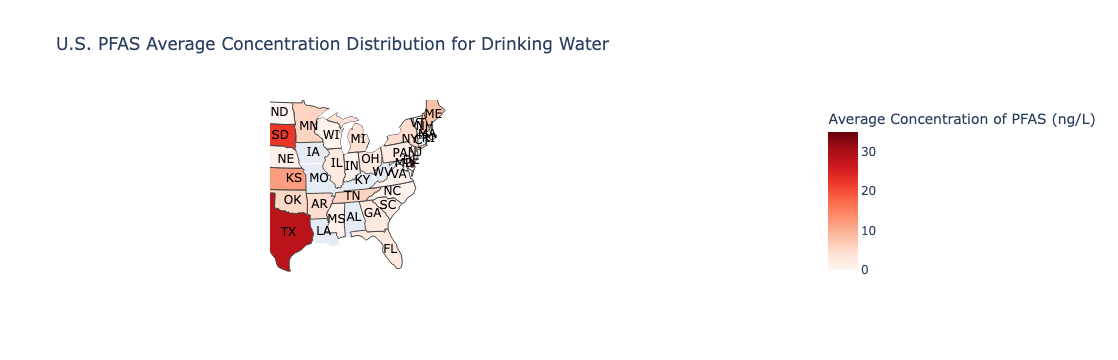

In [114]:
fig = px.choropleth(
    pfas_avg_dw, 
    locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
    locationmode="USA-states",  # Use the USA state map
    color='concentration',  # The PFAS analyte column to visualize
    hover_name='state',  # The column to show on hover (state names)
    scope="usa",  # Focus the map on the USA
    color_continuous_scale="Reds",  # Color scale for concentrations
    labels= {'concentration': 'Average Concentration of PFAS (ng/L)'},
    title='U.S. PFAS Concentration Distribution',
    range_color=[0, 35] 
)

# Customize the layout
fig.update_layout(
    title_text='U.S. PFAS Average Concentration Distribution for Drinking Water',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
    )
)

# Add state code annotations
for state, coords in state_coordinates.items():
    fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=[coords[1]],
        lat=[coords[0]],
        text=state,
        mode='text',
        showlegend=False,
        textfont=dict(
            size=12,
            color='black'
        )
    ))

fig.write_html('avg_PFAS_concentration_map_dw.html')
# Show the map
fig.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2246436833.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




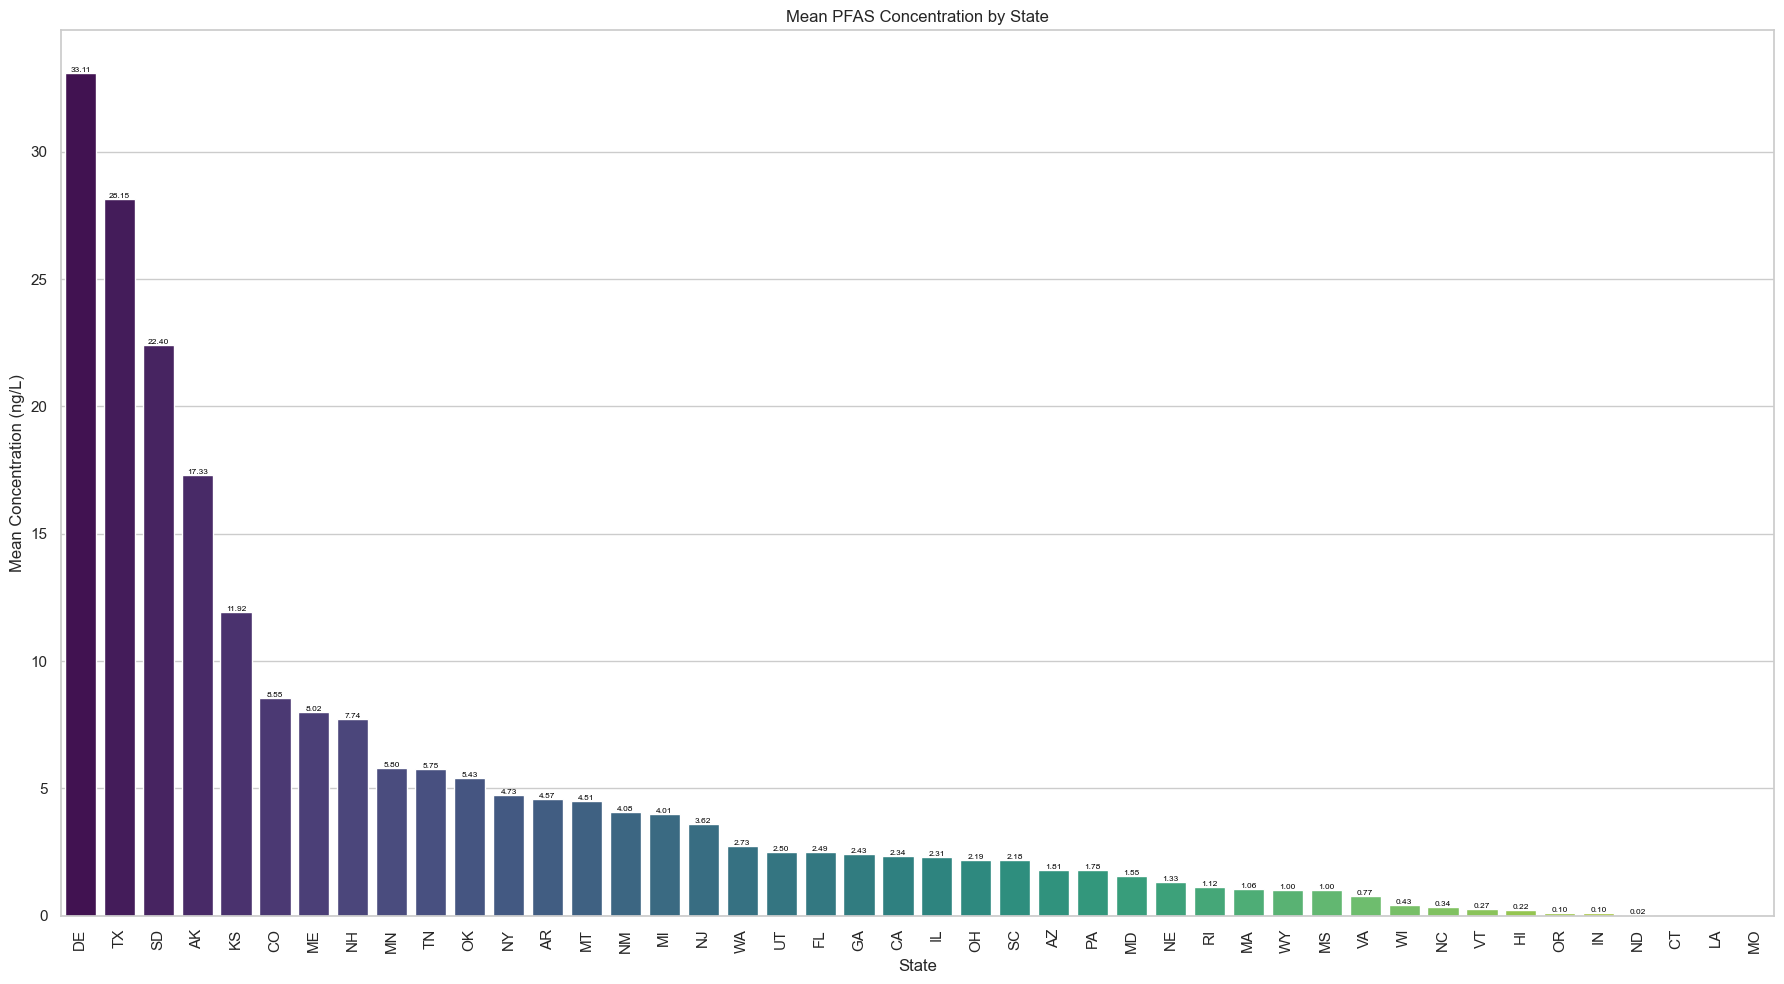

In [115]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(
    x='state', 
    y='concentration', 
    data=pfas_avg_dw.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False), 
    palette='viridis'
)

plt.title('Mean PFAS Concentration by State')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the concentration value to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha = 'center', va = 'bottom',  # Align text in the center horizontally, and above the bar
        fontsize = 6, color = 'black',  # Customize text appearance
    )


plt.show()

In [176]:
pivot_df.sort_values(by='PFOS', ascending=False)

state state_code      PFHPA       PFOA      PFNA       PFBS  \
6         Delaware         DE   9.291071  11.923214  3.460714  20.775000   
0           Alaska         AK   1.849268   6.430909  0.104878   5.745000   
39           Texas         TX  16.349274  61.718535  0.557279  28.434995   
37    South Dakota         SD  15.094667  26.881667  0.578800  25.050733   
24   New Hampshire         NH   5.916759  13.036465  0.655063   5.624430   
27        New York         NY  12.475571  18.855887  6.050100   2.131857   
11        Illinois         IL   1.200000   9.742105  0.547368   0.000000   
25      New Jersey         NJ   1.697186   3.682426  0.156527   1.983593   
13          Kansas         KS   6.937500  21.681250  0.000000  22.656250   
19       Minnesota         MN   2.390000  22.804118  0.000000   3.665846   
4         Colorado         CO   5.318322  10.068270  0.534624  14.290361   
15           Maine         ME   3.283689  16.453617  0.585904   6.597549   
36  South Carolina         SC   2.203611  11.085119  0.381628   4.755033   
8          Georgia         GA   1.733333   2.850000  0.000000   5.000000   
2         Arkansas         AR   1.770000  19.115000  0.000000   2.445000   
7          Florida         FL   2.759785   7.813446  0.351844   5.645433   
38       Tennessee         TN  15.660000  37.940000  0.680000   0.000000   
22         Montana         MT   4.515000  16.283810  0.050000   3.486000   
3       California         CA   2.373311   6.381548  0.489864   3.572337   
44      Washington         WA   2.301308   6.811734  0.170777   4.171716   
18        Michigan         MI   6.127673   5.840821  0.066550   1.227979   
31        Oklahoma         OK   1.683636   8.430357  0.000000   7.210909   
33    Pennsylvania         PA   2.528306   7.569147  1.304916   3.633383   
1          Arizona         AZ   0.800000   1.970000  0.000000   1.807692   
16        Maryland         MD   1.602460   6.632167  0.277302   3.591821   
17   Massachusetts         MA   1.849213   4.832653  0.328471   2.102506   
28  North Carolina         NC   0.286741   1.284191  0.057926   1.521778   
43        Virginia         VA   0.728980   4.660347  0.145576   1.075192   
30            Ohio         OH   1.015385   3.239669  0.012135   1.978202   
40            Utah         UT   0.000000   3.000000  0.000000   0.000000   
23        Nebraska         NE   0.000000   1.000000  0.000000   0.000000   
45       Wisconsin         WI   0.444558   1.300227  0.108876   1.045935   
41         Vermont         VT   0.225890   1.043225  0.192645   0.362523   
35    Rhode Island         RI   1.247397  16.062953  0.270267   0.901486   
32          Oregon         OR   0.188776   0.179648  0.000000   0.149847   
10          Hawaii         HI   0.527778   0.461111  0.000000   0.530000   
12         Indiana         IN   0.079478   0.367603  0.049854   0.533137   
29    North Dakota         ND   0.014139   0.068633  0.000000   0.066372   
26      New Mexico         NM   0.808571   0.000000  0.000000   0.820000   
21        Missouri         MO   0.000000   0.000000  0.000000   0.000000   
20     Mississippi         MS   0.000000   1.000000  0.000000   0.000000   
14       Louisiana         LA   0.000000   0.000000  0.000000   0.000000   
5      Connecticut         CT   0.000000   0.000000  0.000000   0.000000   
46         Wyoming         WY   0.000000   1.000000  0.000000   0.000000   

         PFHXS        PFOS  
6    94.862500  335.080357  
0    25.595122  262.546222  
39  190.768697  124.375601  
37  142.016540   78.528820  
24   41.674456   60.351490  
27   10.207500   43.677121  
11    4.757895   37.710526  
25   17.475808   36.254405  
13  123.156250   36.181250  
19   41.094462   35.856716  
4    42.241514   29.418803  
15   44.162575   28.075802  
36    7.393505   25.111511  
8    14.366667   20.400000  
2    46.175000   18.080000  
7     7.403150   15.783775  
38    0.000000   15.293333  
22   30.348250   13.739286  
3     8.132019   13.717640  
44   18.0819

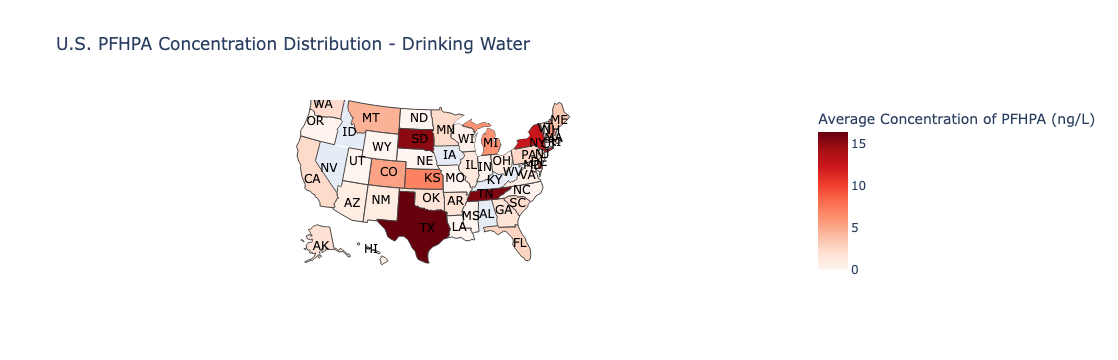

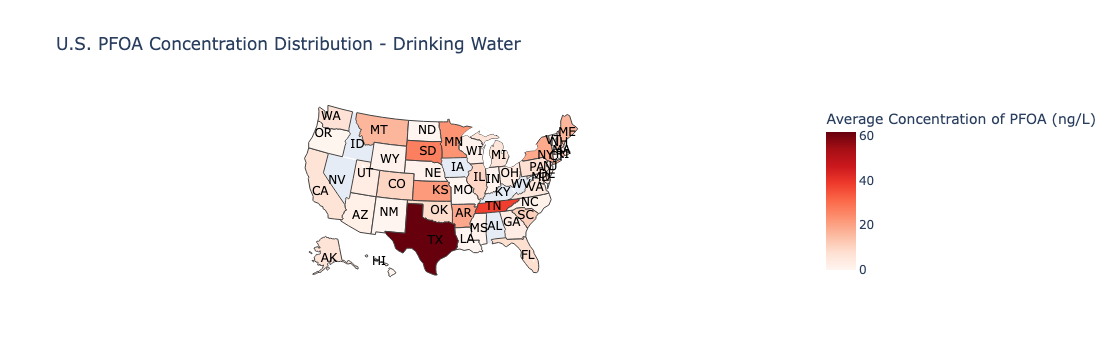

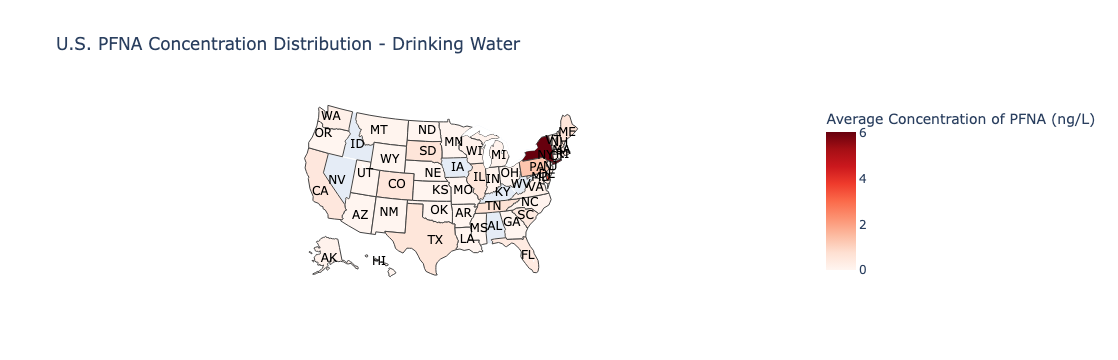

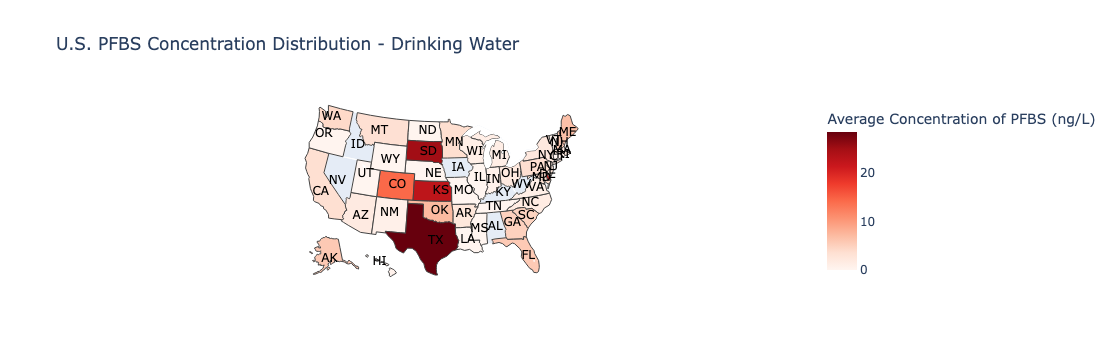

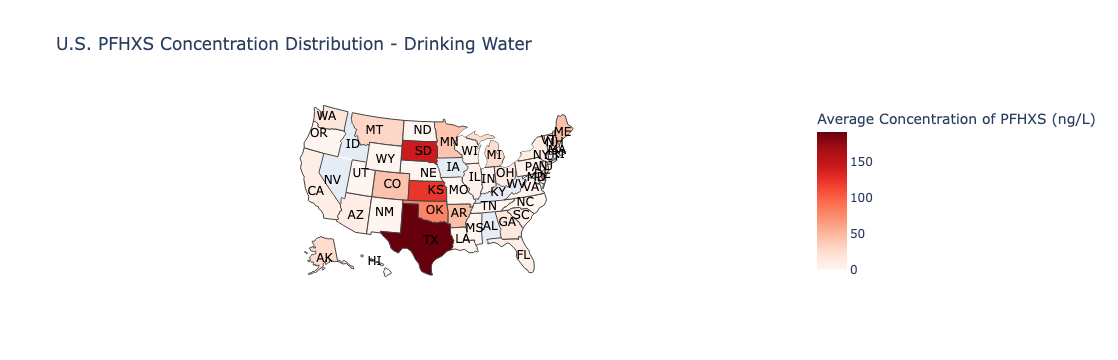

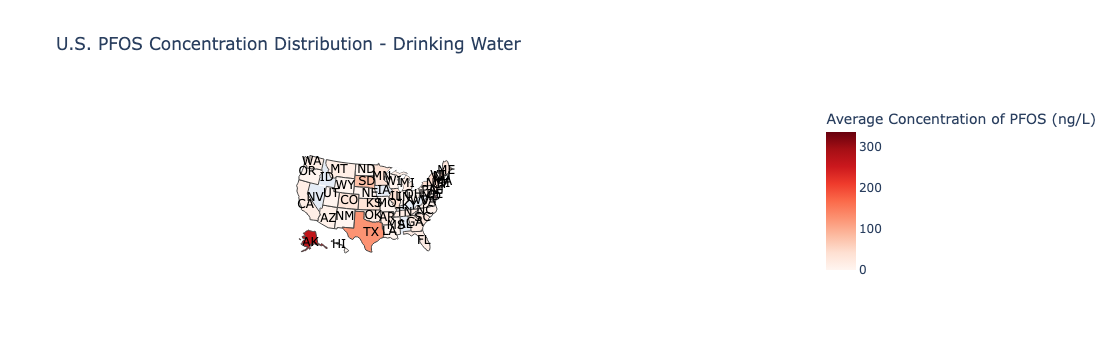

In [116]:
# Generate and save an HTML map for each analyte
for analyte in pfas_analytes:
    fig = px.choropleth(
        pivot_df, 
        locations='state_code',  # The column with state abbreviations (e.g., 'CA', 'TX')
        locationmode="USA-states",  # Use the USA state map
        color=analyte,  # The PFAS analyte column to visualize
        hover_name='state',  # The column to show on hover (state names)
        scope="usa",  # Focus the map on the USA
        color_continuous_scale="Reds",  # Color scale for concentrations
        labels={analyte: f'Average Concentration of {analyte} (ng/L)'},
        title=f'U.S. {analyte} Concentration Distribution'
    )
    
    # Customize the layout
    fig.update_layout(
        title_text=f'U.S. {analyte} Concentration Distribution - Drinking Water',
        geo=dict(
            lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
        )
    )

    # Add state code annotations
    for state, coords in state_coordinates.items():
        fig.add_trace(go.Scattergeo(
            locationmode='USA-states',
            lon=[coords[1]],
            lat=[coords[0]],
            text=state,
            mode='text',
            showlegend=False,
            textfont=dict(
                size=12,
                color='black'
            )
        ))
    fig.write_html(f'{analyte}_concentration_map.html')
    # Show the map
    fig.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




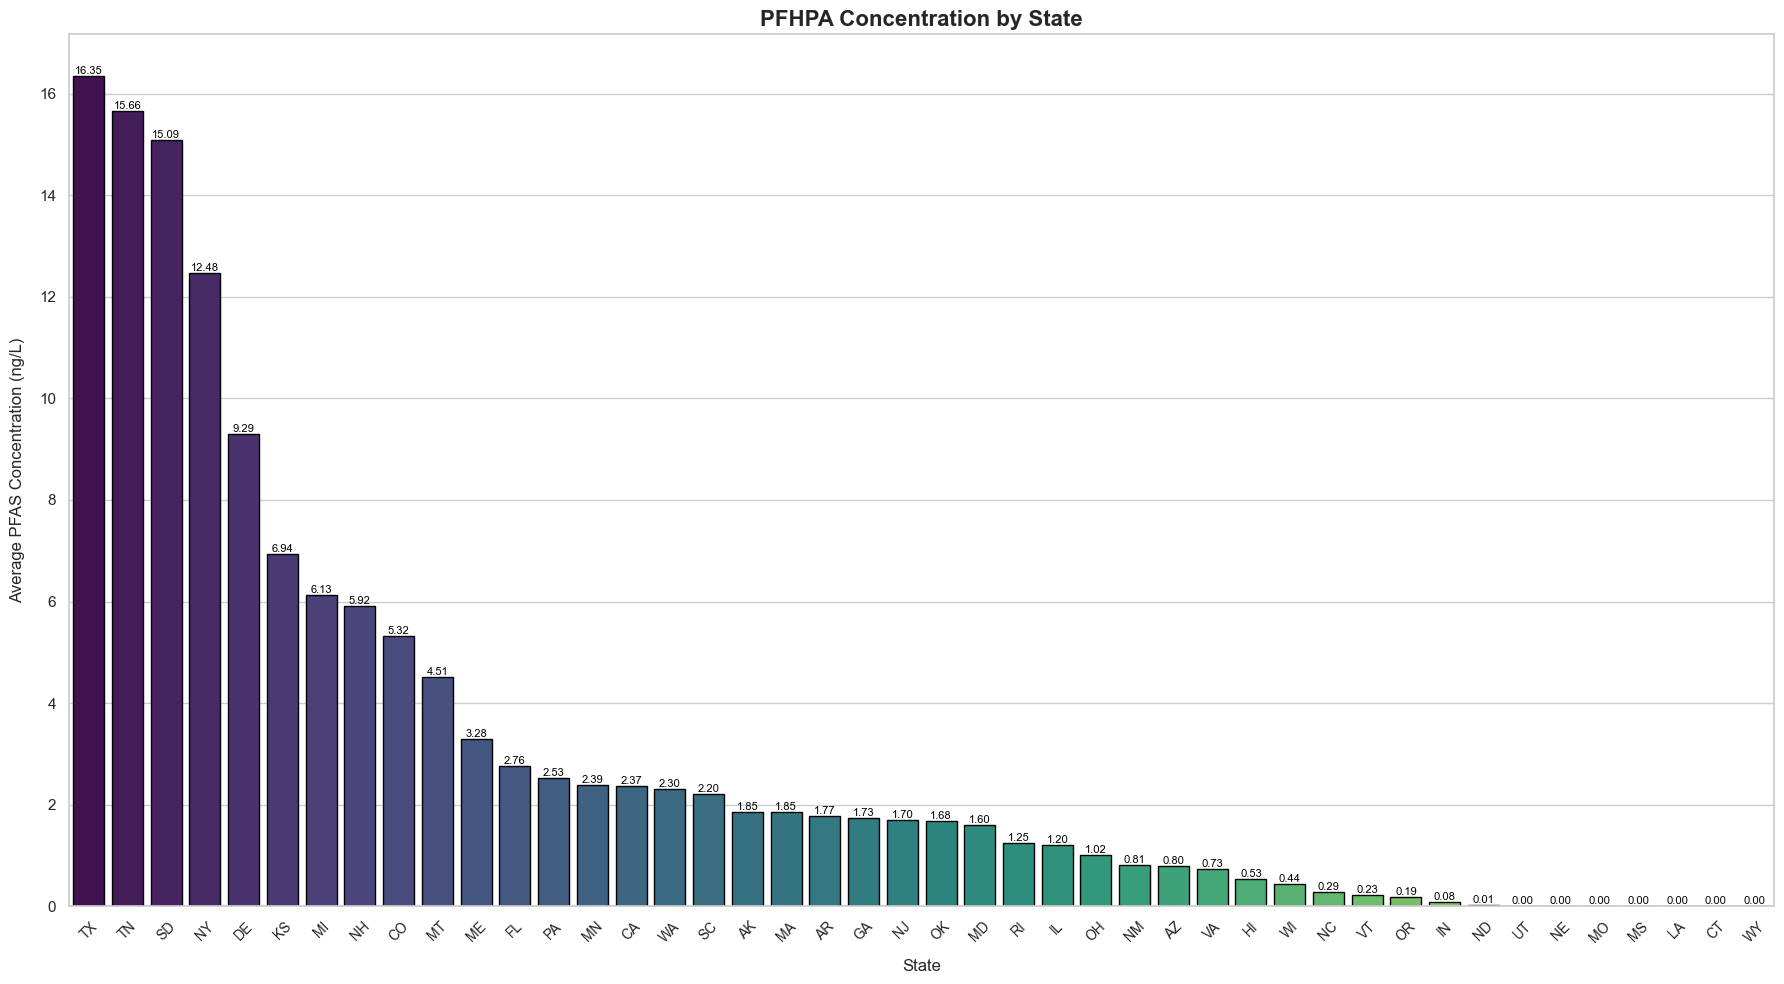

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




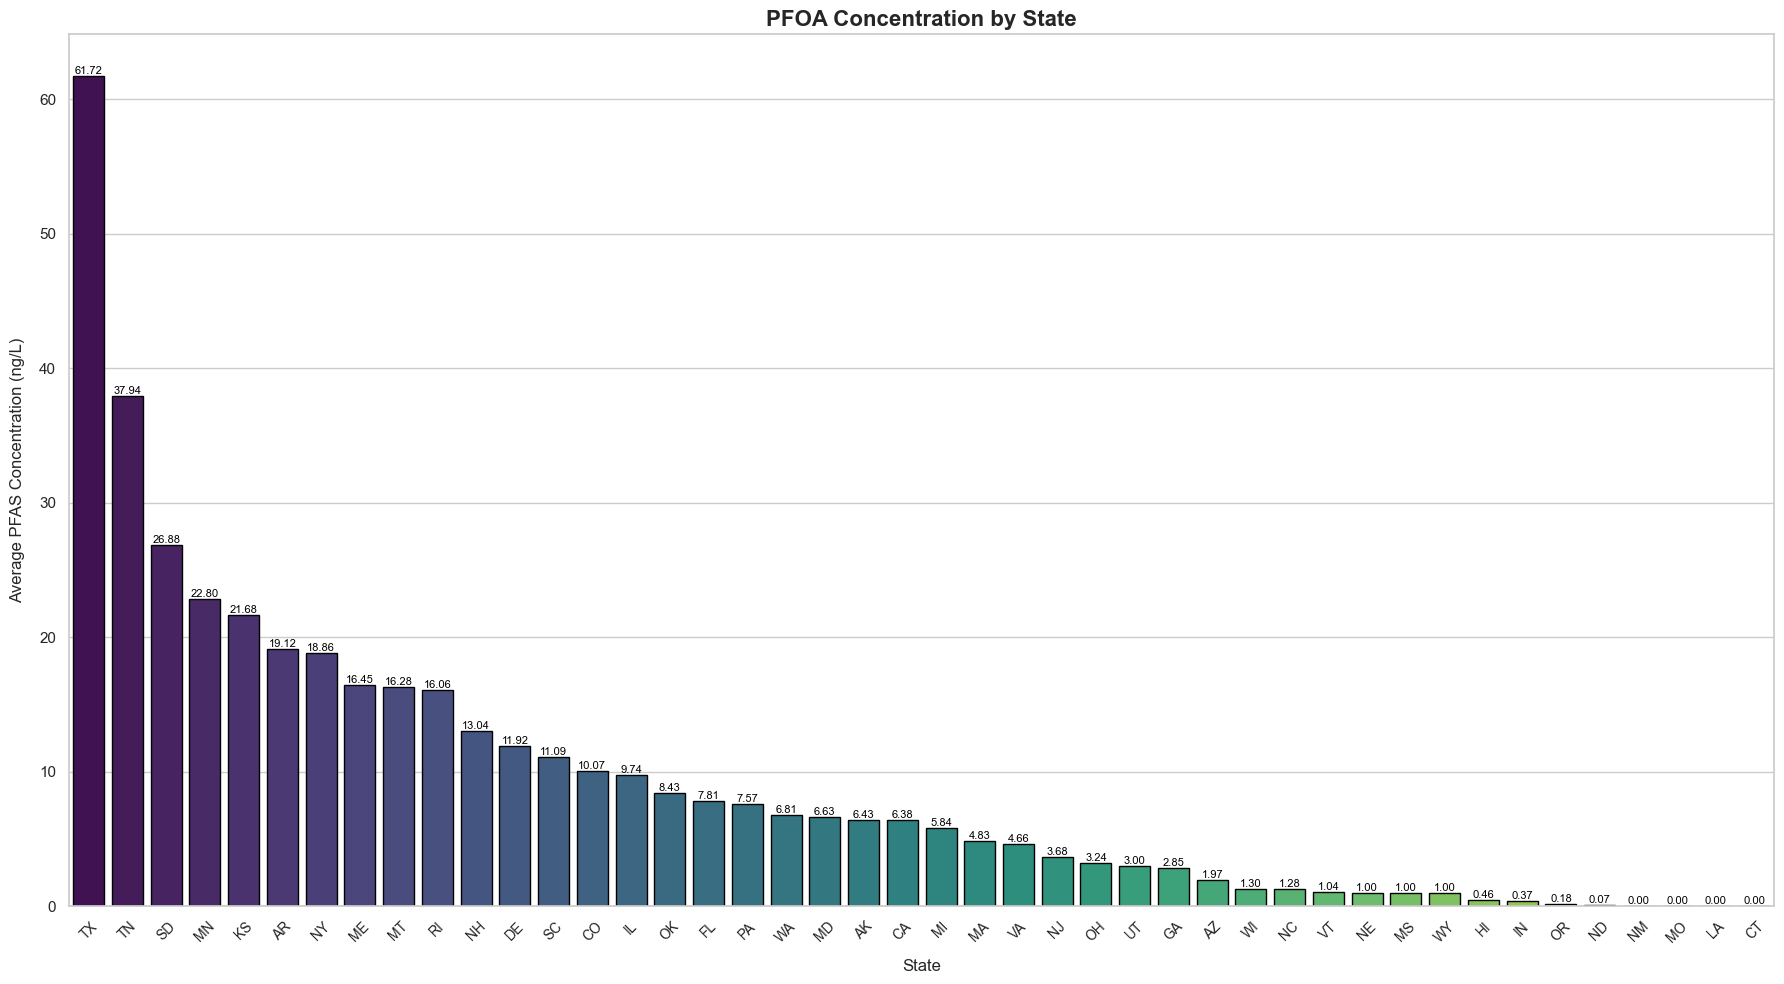

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




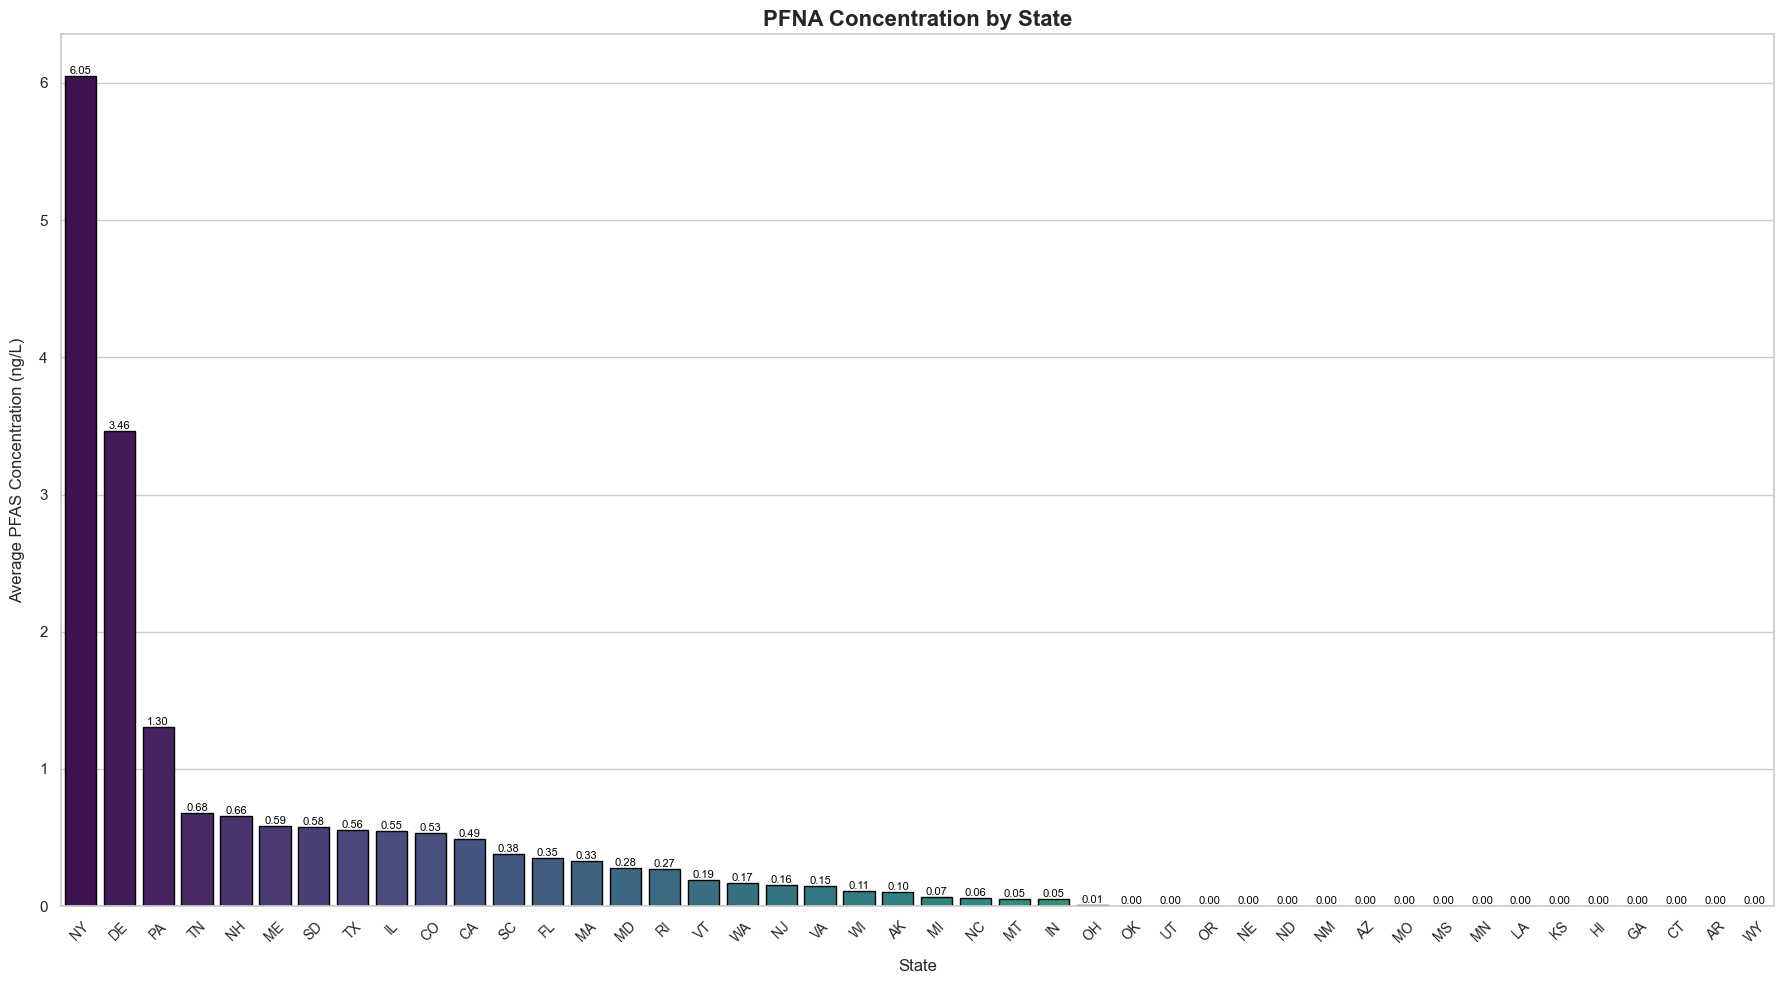

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




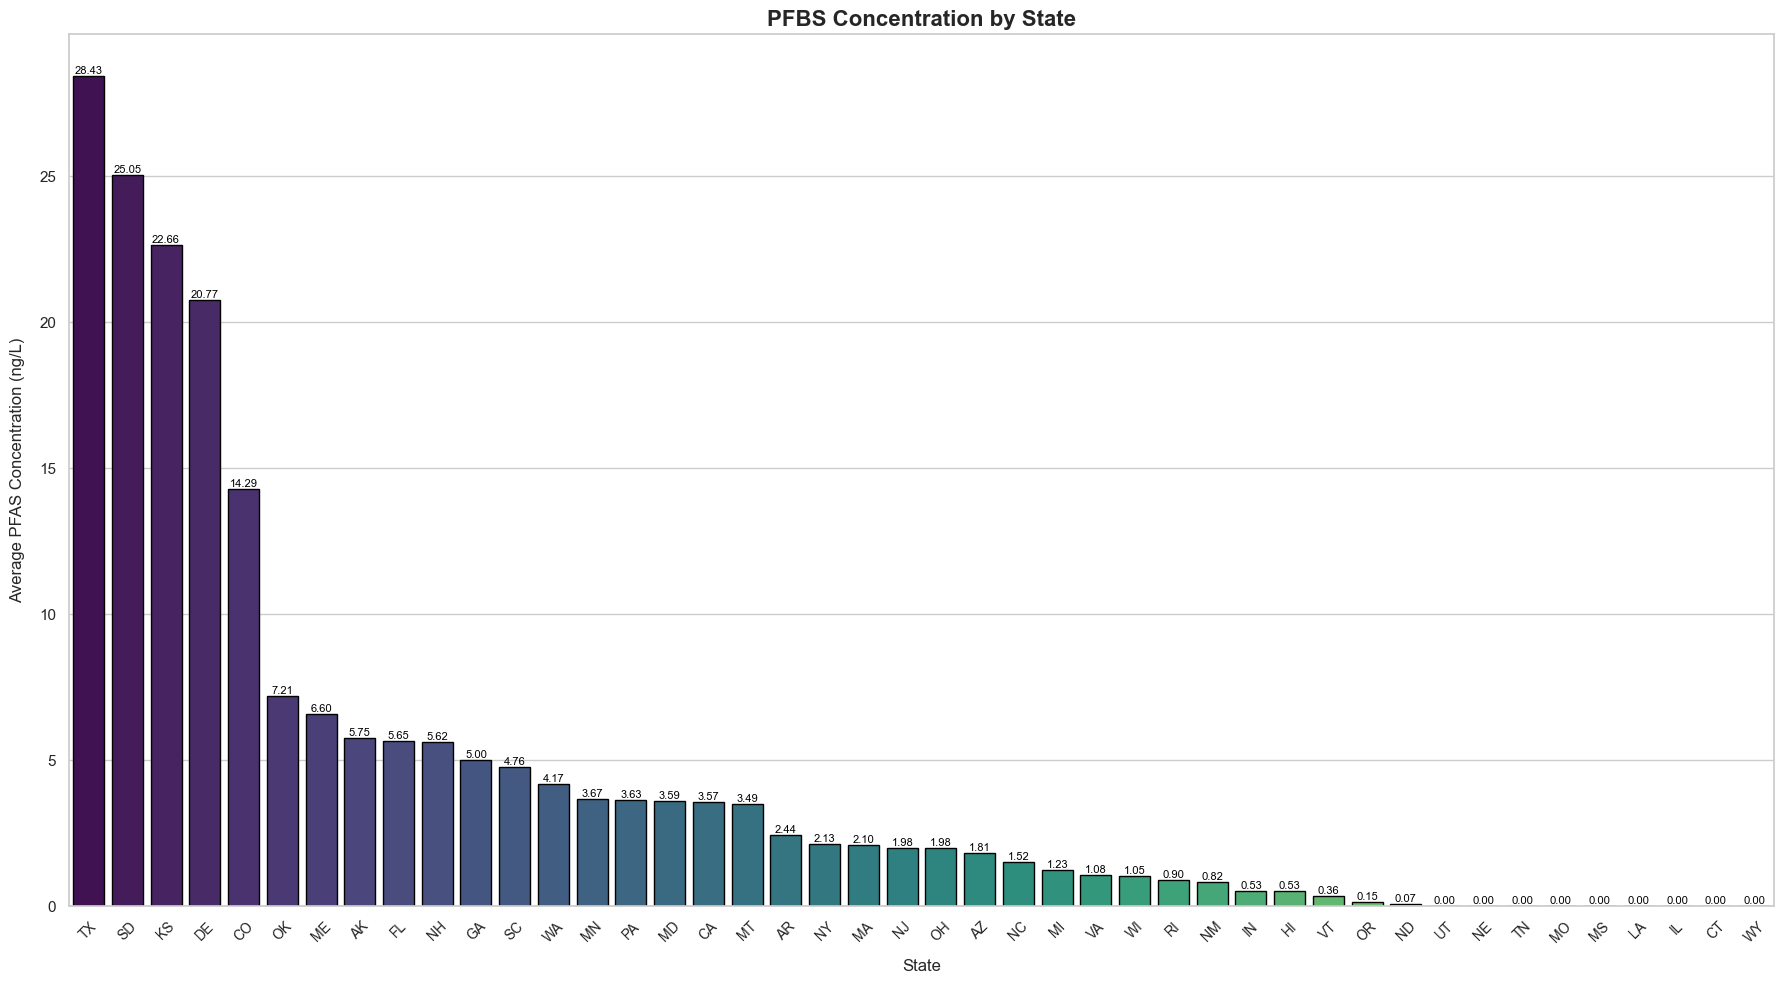

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




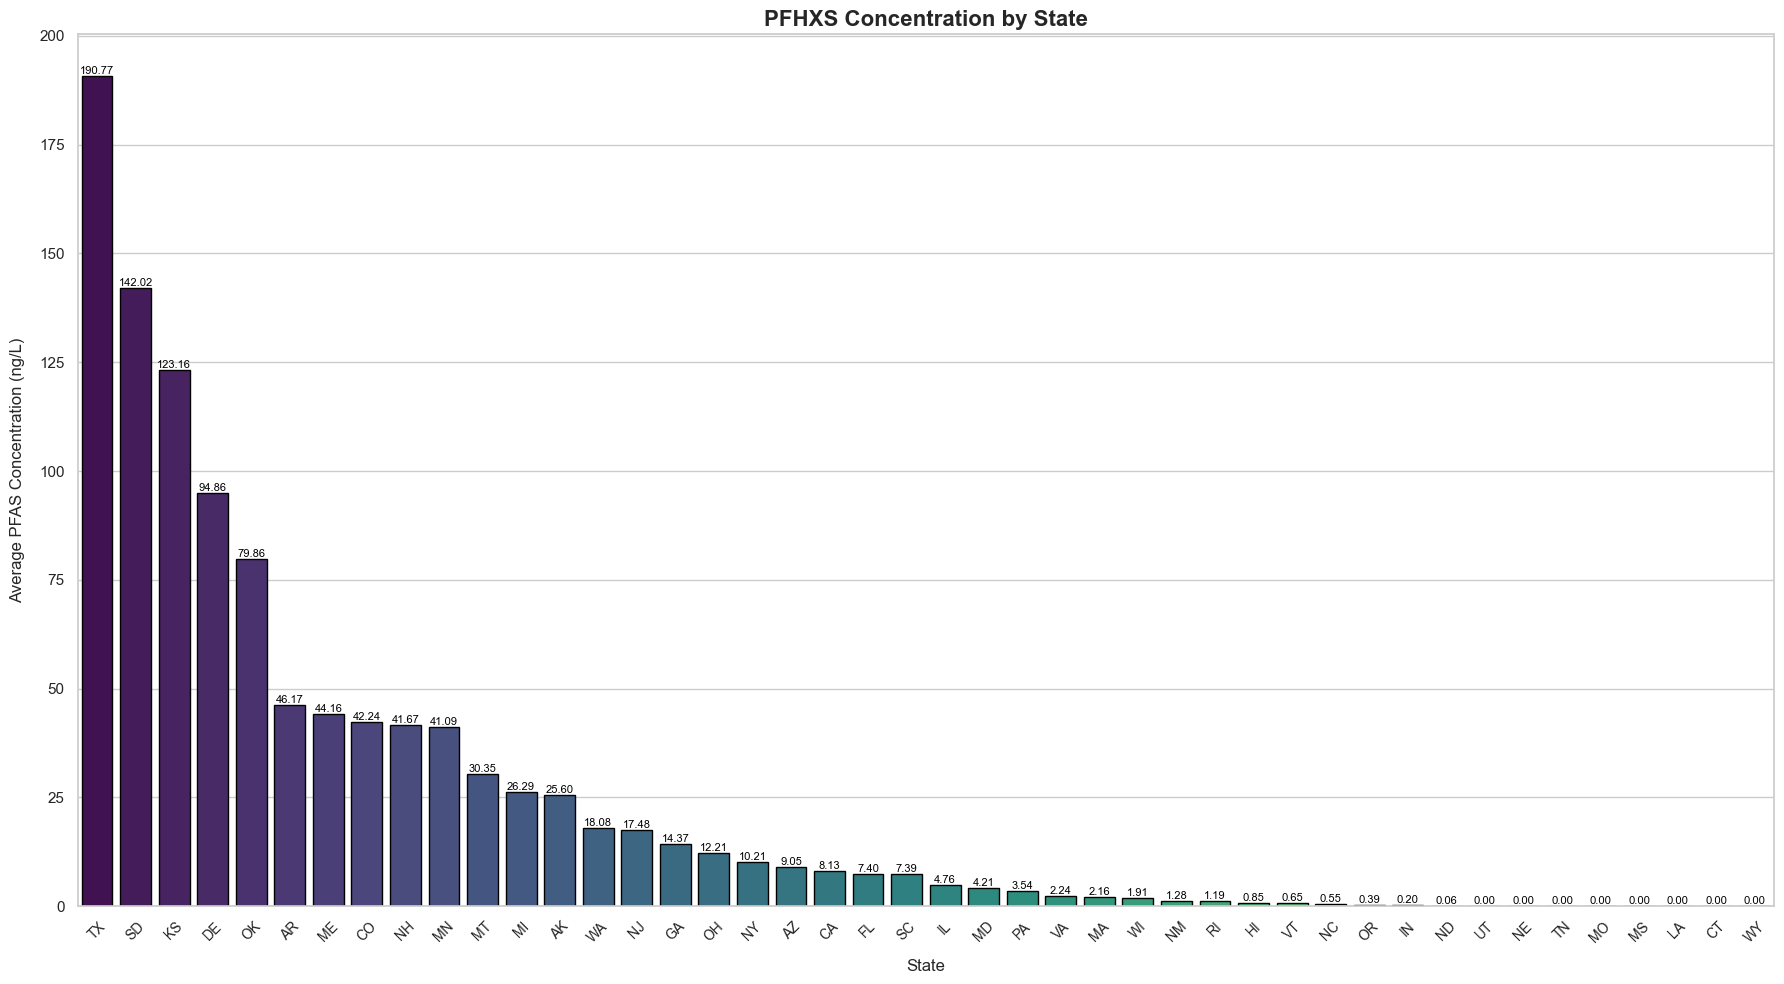

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2914988647.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




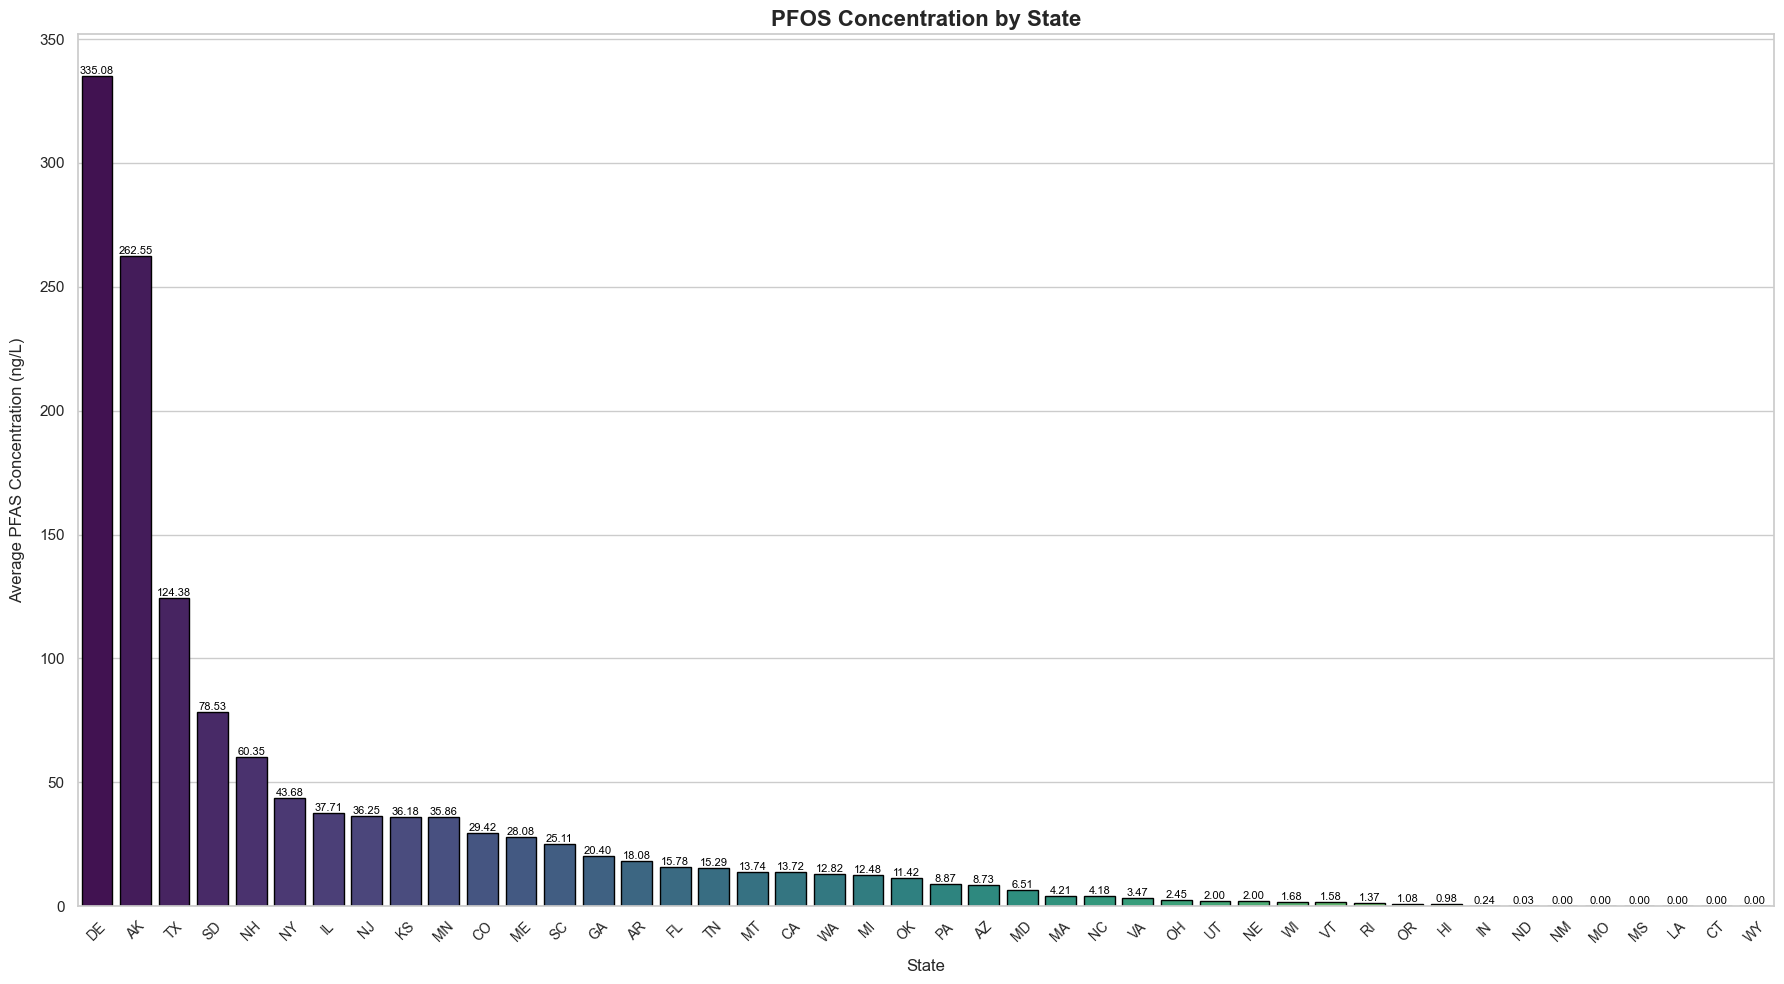

In [117]:
for analyte in pfas_analytes:
    # Sort data by analyte concentration for clarity in bar plot
    sorted_df = pivot_df.sort_values(by=analyte, ascending=False)
    
    plt.figure(figsize=(18, 10))  # Increase figure size for clarity
    ax = sns.barplot(
        x='state_code', 
        y=analyte, 
        data=sorted_df, 
        palette='viridis',  
        edgecolor='black'
    )

    # Title and labels
    plt.title(f'{analyte} Concentration by State', fontsize=16, fontweight='bold')
    plt.xlabel('State', fontsize=12, labelpad=10)
    plt.ylabel('Average PFAS Concentration (ng/L)', fontsize=12, labelpad=10)

    plt.xticks(rotation=45, ha='center', fontsize=10)

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),  
            (p.get_x() + p.get_width() / 2., p.get_height()),  
            ha='center', va='bottom',  
            fontsize=8, color='black'  
        )

    plt.tight_layout()
    plt.show()

In [197]:
all_states_dw[all_states_dw['state']=='Guam']

sample_id           sampling_location data_source  latitude  \
1356944       NaN  Guam International Airport         PPL       NaN   
1356945       NaN  Guam International Airport         PPL       NaN   

         longitude sampling_date pws_id water_system_name  population  \
1356944        NaN           NaT    NaN               NaN         NaN   
1356945        NaN           NaT    NaN               NaN         NaN   

        well_type  well_depth units     source_type state city county  MRL  \
1356944       NaN         NaN  ng/L  Drinking Water  Guam  NaN    NaN  NaN   
1356945       NaN         NaN  ng/L  Drinking Water  Guam  NaN    NaN  NaN   

         DL analytical_methods is_detected analyte  concentration  pfas_total  \
1356944 NaN                NaN         NaN    PFOA            NaN         NaN   
1356945 NaN                NaN        True    PFOS          410.0         NaN   

        note  year  
1356944  NaN   NaN  
1356945  NaN   NaN

In [199]:
all_states_dw[all_states_dw['year']==2006]

sample_id sampling_location                                data_source  \
961119       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961120       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961121       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961122       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961123       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961124       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961371       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961372       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961373       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961374       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961375       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   
961376       NaN    Richard Miller  PFAS Testing of Ohio Public Water Systems   

        latitude  longitude sampling_date pws_id water_system_name  \
961119       NaN        NaN    2006-04-17    NaN               NaN   
961120       NaN        NaN    2006-04-17    NaN               NaN   
961121       NaN        NaN    2006-04-17    NaN               NaN   
961122       NaN        NaN    2006-04-17    NaN               NaN   
961123       NaN        NaN    2006-04-17    NaN               NaN   
961124       NaN        NaN    2006-04-17    NaN               NaN   
961371       NaN        NaN    2006-04-17    NaN               NaN   
961372       NaN        NaN    2006-04-17    NaN               NaN   
961373       NaN        NaN    2006-04-17    NaN               NaN   
961374       NaN        NaN    2006-04-17    NaN               NaN   
961375       NaN        NaN    2006-04-17    NaN               NaN   
961376       NaN        NaN    2006-04-17    NaN               NaN   

        population well_type  well_depth units     source_type state city  \
961119         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961120         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961121         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961122         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961123         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961124         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961371         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961372         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961373         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961374         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961375         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   
961376         NaN       NaN         NaN  ng/L  drinking water  Ohio  NaN   

       county  MRL  DL analytical_methods is_detected  analyte  concentration  \
961119    NaN  NaN NaN                NaN        True     PFOA           20.9   
961120    NaN  NaN NaN                NaN         NaN     PFOS            NaN   
961121    NaN  NaN NaN                NaN         NaN    PFHXS            NaN   
961122    NaN  NaN NaN                NaN         NaN  HFPO-DA            NaN   
961123    NaN  NaN NaN                NaN         NaN     PFNA            NaN   
961124    NaN  NaN NaN                NaN         NaN     PFBS            NaN   
961371    NaN  NaN NaN                NaN         NaN     PFOA            NaN   
961372    NaN  NaN NaN                NaN         NaN     PFOS            NaN   
961373    NaN  NaN NaN                NaN         NaN    PFHXS            NaN   
961374    NaN  NaN NaN                NaN         NaN  HFPO-DA            NaN   
961375    NaN  NaN NaN                NaN         NaN     PFNA            NaN   
961376    NaN  NaN NaN                NaN         NaN     PFBS      

## Questions

### 1. What does the data distribution look like for total PFAS and each individual PFAS? 

In [118]:
summary_stats_with_na = all_states_dw.groupby('analyte').agg(
    n=('concentration', 'count'),  # total count of non-NA values
    mean=('concentration', 'mean'),  # mean concentration
    std=('concentration', 'std'), # standard deviation
    min=('concentration', 'min'),  # minimum concentration
    Q1=('concentration', lambda x: x.quantile(0.25)),  # first quartile
    median=('concentration', 'median'),  # median
    Q3=('concentration', lambda x: x.quantile(0.75)),  # third quartile
    max=('concentration', 'max'),  # maximum concentration
    missing_count=('concentration', lambda x: x.isna().sum()),  # count of NA values
    total_count=('concentration', 'size')  # total count including NAs
).reset_index()

summary_stats_with_na['%NA'] = (summary_stats_with_na['missing_count'] / summary_stats_with_na['total_count']) * 100

summary_stats_with_na = summary_stats_with_na.drop(columns=['missing_count', 'total_count'])

summary_stats_with_na

analyte      n       mean         std  min   Q1  median     Q3  \
0        10:2FTS     22   0.000000    0.000000  0.0  0.0   0.000   0.00   
1   11CL-PF3OUDS  57897   0.001108    0.055037  0.0  0.0   0.000   0.00   
2        3:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
3         4:2FTS  16085   0.053264    0.627074  0.0  0.0   0.000   0.00   
4        5:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
5         6:2FTS  18965   4.735221   48.087259  0.0  0.0   0.000   0.00   
6        7:3FTCA    360   0.103056    1.135140  0.0  0.0   0.000   0.00   
7         8:2FTS  18741   0.427673    7.011937  0.0  0.0   0.000   0.00   
8     9CL-PF3ONS  57865   0.000864    0.058568  0.0  0.0   0.000   0.00   
9          ADONA  36233   0.000740    0.048300  0.0  0.0   0.000   0.00   
10       ETFOSAA    713   0.011360    0.175212  0.0  0.0   0.000   0.00   
11          FOSA   9243   0.967417    5.537061  0.0  0.0   0.000   0.00   
12       HFPO-DA  58772   0.005579    0.303374  0.0  0.0   0.000   0.00   
13      NETFOSAA  58295   0.014534    0.258810  0.0  0.0   0.000   0.00   
14         NFDHA  10060   0.000359    0.028148  0.0  0.0   0.000   0.00   
15      NMEFOSAA  58628   0.006072    0.158651  0.0  0.0   0.000   0.00   
16          PFBA  19213  11.882102   28.145065  0.0  0.0   1.660  13.10   
17          PFBS  71456   5.316291   23.289255  0.0  0.0   0.000   3.41   
18          PFDA  71051   0.078433    0.709756  0.0  0.0   0.000   0.00   
19         PFDOA  70716   0.002631    0.178817  0.0  0.0   0.000   0.00   
20         PFDOS    450   0.000000    0.000000  0.0  0.0   0.000   0.00   
21          PFDS   9240   0.001549    0.053576  0.0  0.0   0.000   0.00   
22        PFEESA  10217   0.000342    0.021112  0.0  0.0   0.000   0.00   
23         PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000   2.10   
24         PFHPS  16510   2.255976   16.004778  0.0  0.0   0.000   0.00   
25         PFHXA  70797  13.089934   97.814173  0.0  0.0   0.000   4.10   
26        PFHXDA     40   0.000000    0.000000  0.0  0.0   0.000   0.00   
27         PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000   3.97   
28         PFMBA  10220   0.000605    0.037274  0.0  0.0   0.000   0.00   
29         PFMPA  10219   0.000556    0.020813  0.0  0.0   0.000   0.00   
30          PFNA  71401   0.398867    2.674971  0.0  0.0   0.000   0.00   
31          PFNS   6402   0.170236    2.174159  0.0  0.0   0.000   0.00   
32          PFOA  71577  10.585127   84.763038  0.0  0.0   0.629   6.32   
33         PFODA     40   0.184750    0.815585  0.0  0.0   0.000   0.00   
34          PFOS  71570  20.483585  307.310860  0.0  0.0   0.390   6.20   
35         PFPEA  19344  19.649716   52.697712  0.0  0.0   0.000  13.90   
36         PFPES  16453   8.972851   40.326138  0.0  0.0   0.000   0.00   
37        PFTEDA  60152   0.002220    0.084578  0.0  0.0   0.000   0.00   
38        PFTRDA  60529   0.001906    0.093792  0.0  0.0   0.000   0.00   
39        PFTREA    137   0.000000    0.000000  0.0  0.0   0.000   0.00   
40         PFUNA  70011   0.006075    0.217493  0.0  0.0   0.000   0.00   

            max       %NA  
0       0.00000  0.000000  
1       7.00000  0.001727  
2       0.00000  0.000000  
3      14.80000  0.000000  
4       0.00000  0.000000  
5    1800.00000  2.763536  
6      14.60000  0.000000  
7     190.00000  0.207668  
8       8.33000  0.001728  
9       7.80000  0.002760  
10      2.90000  0.000000  
11    176.00000  0.420168  
12     54.00000  0.247802  
13     20.00000  0.083985  
14      2.78060  0.000000  
15     29.80000  0.083508  
16    428.00000  2.718987  
17   2200.00000  0.146728  
18     54.00000  0.081565  
19     39.00000  0.087598  
20      0.00000  0.000000  
21      2.70000  0.420304  
22      2.08896  0.000000  
23  10000.00000  0.013958  
24    418.00000  0.211544  
25  20000.00000  0.087498  
26      0.00000  0.000000  
27  14000.00000  0.140508  
28      3.71944  0.000000  
29      1.88502  0

In [119]:
sort_summary_stats_with_na = summary_stats_with_na.sort_values(by='n', ascending=False)
sort_summary_stats_with_na

analyte      n       mean         std  min   Q1  median     Q3  \
27         PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000   3.97   
23         PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000   2.10   
32          PFOA  71577  10.585127   84.763038  0.0  0.0   0.629   6.32   
34          PFOS  71570  20.483585  307.310860  0.0  0.0   0.390   6.20   
17          PFBS  71456   5.316291   23.289255  0.0  0.0   0.000   3.41   
30          PFNA  71401   0.398867    2.674971  0.0  0.0   0.000   0.00   
18          PFDA  71051   0.078433    0.709756  0.0  0.0   0.000   0.00   
25         PFHXA  70797  13.089934   97.814173  0.0  0.0   0.000   4.10   
19         PFDOA  70716   0.002631    0.178817  0.0  0.0   0.000   0.00   
40         PFUNA  70011   0.006075    0.217493  0.0  0.0   0.000   0.00   
38        PFTRDA  60529   0.001906    0.093792  0.0  0.0   0.000   0.00   
37        PFTEDA  60152   0.002220    0.084578  0.0  0.0   0.000   0.00   
12       HFPO-DA  58772   0.005579    0.303374  0.0  0.0   0.000   0.00   
15      NMEFOSAA  58628   0.006072    0.158651  0.0  0.0   0.000   0.00   
13      NETFOSAA  58295   0.014534    0.258810  0.0  0.0   0.000   0.00   
1   11CL-PF3OUDS  57897   0.001108    0.055037  0.0  0.0   0.000   0.00   
8     9CL-PF3ONS  57865   0.000864    0.058568  0.0  0.0   0.000   0.00   
9          ADONA  36233   0.000740    0.048300  0.0  0.0   0.000   0.00   
35         PFPEA  19344  19.649716   52.697712  0.0  0.0   0.000  13.90   
16          PFBA  19213  11.882102   28.145065  0.0  0.0   1.660  13.10   
5         6:2FTS  18965   4.735221   48.087259  0.0  0.0   0.000   0.00   
7         8:2FTS  18741   0.427673    7.011937  0.0  0.0   0.000   0.00   
24         PFHPS  16510   2.255976   16.004778  0.0  0.0   0.000   0.00   
36         PFPES  16453   8.972851   40.326138  0.0  0.0   0.000   0.00   
3         4:2FTS  16085   0.053264    0.627074  0.0  0.0   0.000   0.00   
28         PFMBA  10220   0.000605    0.037274  0.0  0.0   0.000   0.00   
29         PFMPA  10219   0.000556    0.020813  0.0  0.0   0.000   0.00   
22        PFEESA  10217   0.000342    0.021112  0.0  0.0   0.000   0.00   
14         NFDHA  10060   0.000359    0.028148  0.0  0.0   0.000   0.00   
11          FOSA   9243   0.967417    5.537061  0.0  0.0   0.000   0.00   
21          PFDS   9240   0.001549    0.053576  0.0  0.0   0.000   0.00   
31          PFNS   6402   0.170236    2.174159  0.0  0.0   0.000   0.00   
10       ETFOSAA    713   0.011360    0.175212  0.0  0.0   0.000   0.00   
20         PFDOS    450   0.000000    0.000000  0.0  0.0   0.000   0.00   
6        7:3FTCA    360   0.103056    1.135140  0.0  0.0   0.000   0.00   
4        5:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
2        3:3FTCA    360   0.000000    0.000000  0.0  0.0   0.000   0.00   
39        PFTREA    137   0.000000    0.000000  0.0  0.0   0.000   0.00   
33         PFODA     40   0.184750    0.815585  0.0  0.0   0.000   0.00   
26        PFHXDA     40   0.000000    0.000000  0.0  0.0   0.000   0.00   
0        10:2FTS     22   0.000000    0.000000  0.0  0.0   0.000   0.00   

            max       %NA  
27  14000.00000  0.140508  
23  10000.00000  0.013958  
32   8800.00000  0.146480  
34  49000.00000  0.181311  
17   2200.00000  0.146728  
30    300.00000  0.141255  
18     54.00000  0.081565  
25  20000.00000  0.087498  
19     39.00000  0.087598  
40     26.90000  0.069940  
38     13.90000  0.080887  
37     10.40000  0.081394  
12     54.00000  0.247802  
15     29.80000  0.083508  
13     20.00000  0.083985  
1       7.00000  0.001727  
8       8.33000  0.001728  
9       7.80000  0.002760  
35    912.00000  2.701071  
16    428.00000  2.718987  
5    1800.00000  2.763536  
7     190.00000  0.207668  
24    418.00000  0.211544  
36    800.00000  2.937880  
3      14.80000  0.000000  
28      3.71944  0.000000  
29      1.88502  0.000000  
22      2.08896  0.000000  
14      2.78060  0.000000  
11    176.00000  0

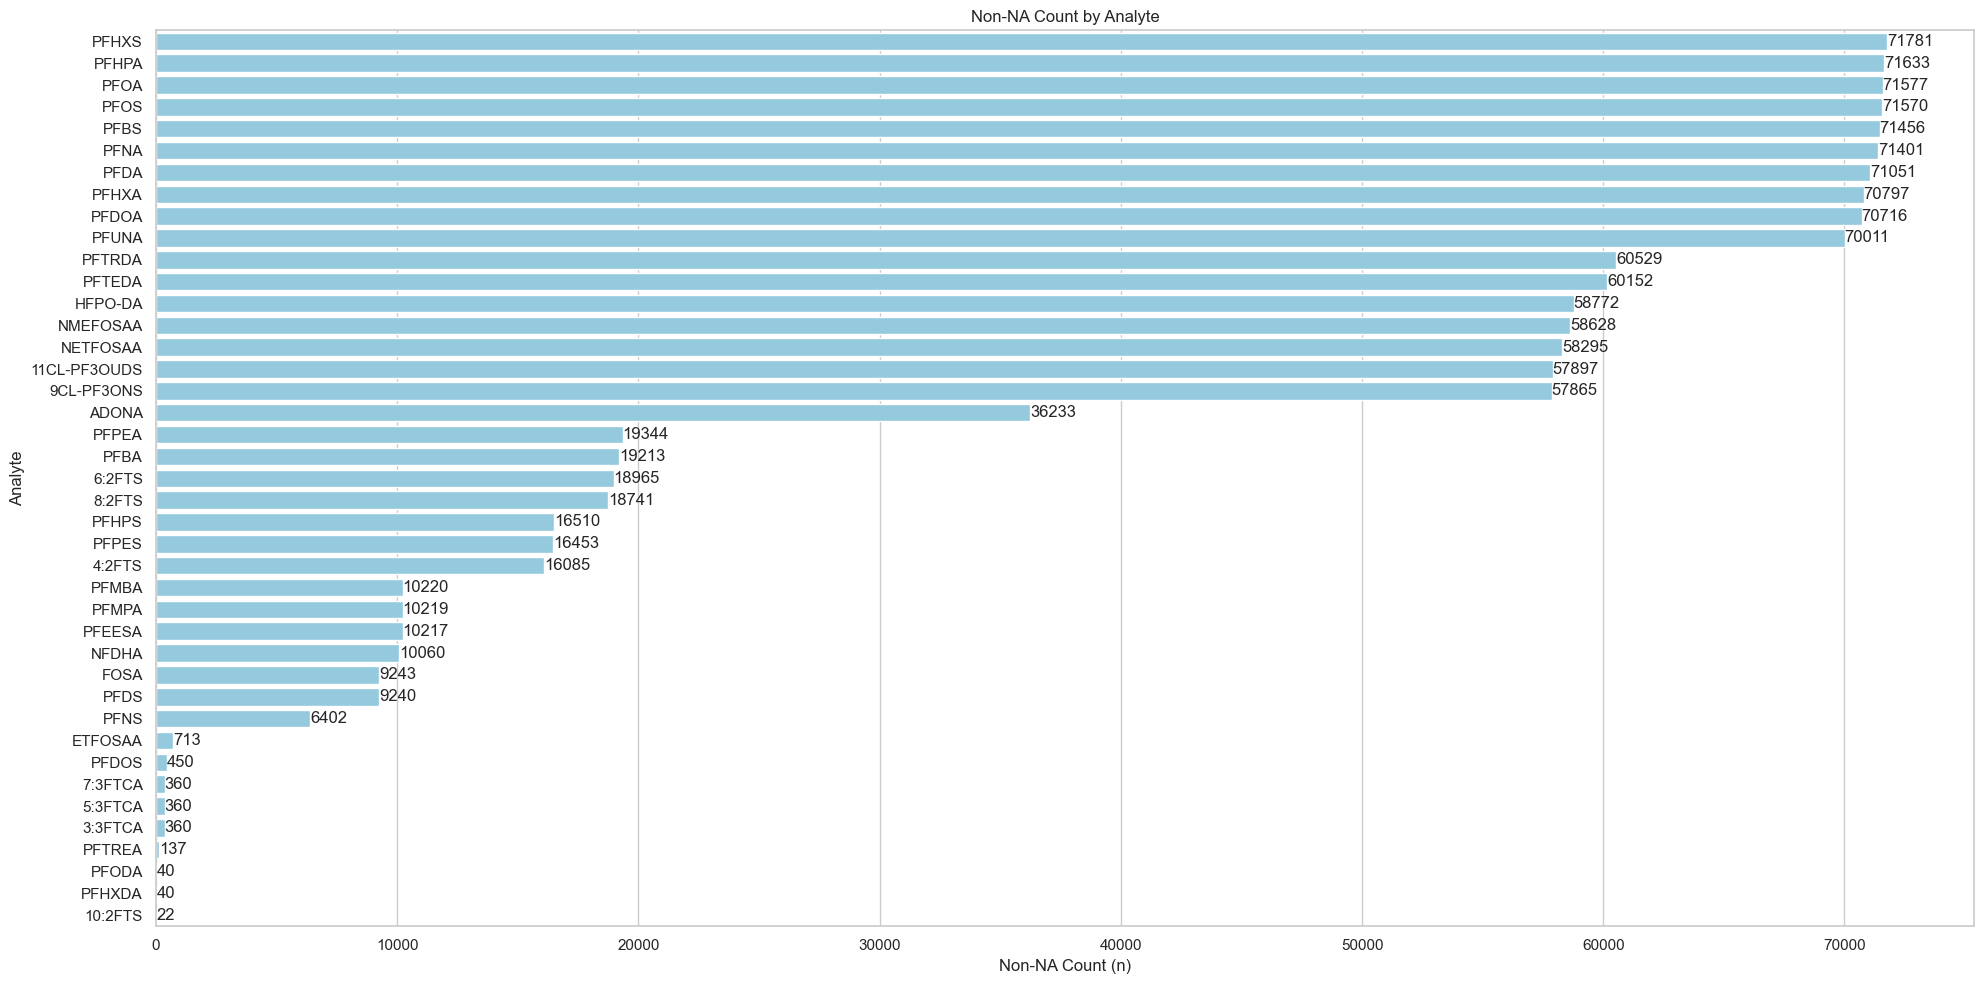

In [120]:
plt.figure(figsize=(20, 10))
sns.barplot(x='n', y='analyte', data=sort_summary_stats_with_na[~sort_summary_stats_with_na['analyte'].isin(['PFOA+PFOS', 'PFAS6'])], color='skyblue')

# Add labels and title
plt.xlabel('Non-NA Count (n)')
plt.ylabel('Analyte')
plt.title('Non-NA Count by Analyte')

# Annotate each bar with the count of non-NA values
for index, value in enumerate(sort_summary_stats_with_na['n']):
    plt.text(value + 0.1, index, str(value), va='center')

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show the chart
plt.show()

In [121]:
pfas_analytes = ['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']
filtered_summary_stats = summary_stats_with_na[summary_stats_with_na['analyte'].isin(pfas_analytes)]
filtered_summary_stats

analyte      n       mean         std  min   Q1  median    Q3      max  \
17    PFBS  71456   5.316291   23.289255  0.0  0.0   0.000  3.41   2200.0   
23   PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000  2.10  10000.0   
27   PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000  3.97  14000.0   
30    PFNA  71401   0.398867    2.674971  0.0  0.0   0.000  0.00    300.0   
32    PFOA  71577  10.585127   84.763038  0.0  0.0   0.629  6.32   8800.0   
34    PFOS  71570  20.483585  307.310860  0.0  0.0   0.390  6.20  49000.0   

         %NA  
17  0.146728  
23  0.013958  
27  0.140508  
30  0.141255  
32  0.146480  
34  0.181311

In [122]:
filtered_summary_stats.sort_values(by='n', ascending=False)

analyte      n       mean         std  min   Q1  median    Q3      max  \
27   PFHXS  71781  24.169845  141.182358  0.0  0.0   0.000  3.97  14000.0   
23   PFHPA  71633   3.350735   39.691072  0.0  0.0   0.000  2.10  10000.0   
32    PFOA  71577  10.585127   84.763038  0.0  0.0   0.629  6.32   8800.0   
34    PFOS  71570  20.483585  307.310860  0.0  0.0   0.390  6.20  49000.0   
17    PFBS  71456   5.316291   23.289255  0.0  0.0   0.000  3.41   2200.0   
30    PFNA  71401   0.398867    2.674971  0.0  0.0   0.000  0.00    300.0   

         %NA  
27  0.140508  
23  0.013958  
32  0.146480  
34  0.181311  
17  0.146728  
30  0.141255

### 2. Is there a trend over time for PFAS concentrations? (Total PFAS concentration in average, PFOA, PFOS and other .....)

In [65]:
all_states_dw['year'] = all_states_dw['sampling_date'].dt.year

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/2321693487.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
all_states_dw.groupby(['analyte', 'year'])['concentration'].mean().reset_index()

analyte    year  concentration
0         10:2FTS  2021.0       0.000000
1         10:2FTS  2022.0       0.000000
2    11CL-PF3OUDS  2019.0       0.000000
3    11CL-PF3OUDS  2020.0       0.000230
4    11CL-PF3OUDS  2021.0       0.001816
..            ...     ...            ...
320         PFUNA  2020.0       0.009694
321         PFUNA  2021.0       0.004536
322         PFUNA  2022.0       0.005911
323         PFUNA  2023.0       0.004624
324         PFUNA  2024.0       0.001749

[325 rows x 3 columns]

In [123]:
filtered_df = all_states_dw[all_states_dw['analyte'].isin(pfas_analytes)]
yearly_avg_concentration = filtered_df.groupby(['year', 'analyte'])['concentration'].mean().reset_index()
yearly_avg_concentration.sort_values(by=['analyte', 'year']).reset_index(drop=True)

year analyte  concentration
0   2005.0    PFBS            NaN
1   2006.0    PFBS            NaN
2   2007.0    PFBS            NaN
3   2008.0    PFBS            NaN
4   2009.0    PFBS            NaN
..     ...     ...            ...
94  2020.0    PFOS       7.752884
95  2021.0    PFOS       9.676870
96  2022.0    PFOS      22.753447
97  2023.0    PFOS      33.665638
98  2024.0    PFOS      13.443557

[99 rows x 3 columns]

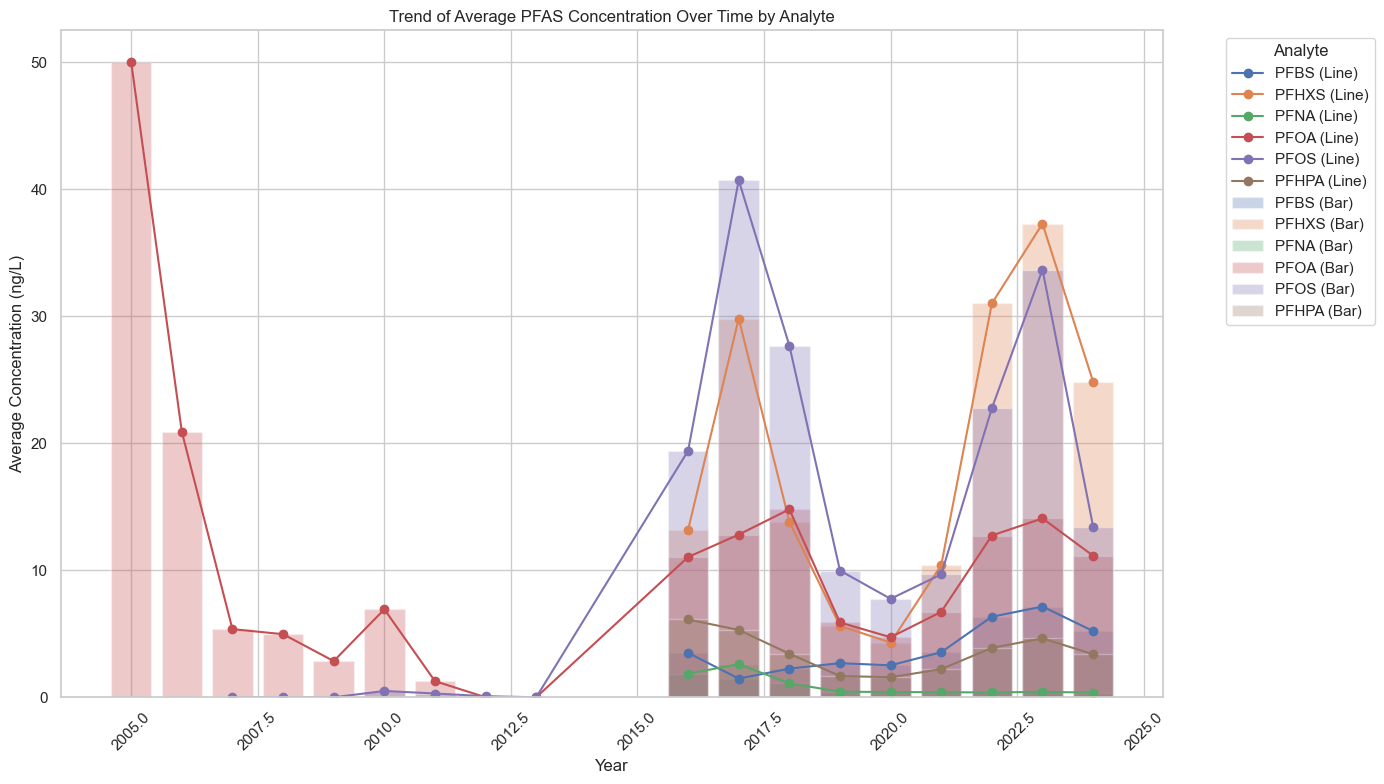

In [124]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar and line plot for each analyte to show trend over time
for analyte in yearly_avg_concentration['analyte'].unique():
    subset = yearly_avg_concentration[yearly_avg_concentration['analyte'] == analyte]
    
    # Bar plot for each year's average concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)")

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Average Concentration (ng/L)")
plt.title("Trend of Average PFAS Concentration Over Time by Analyte")
plt.legend(title="Analyte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

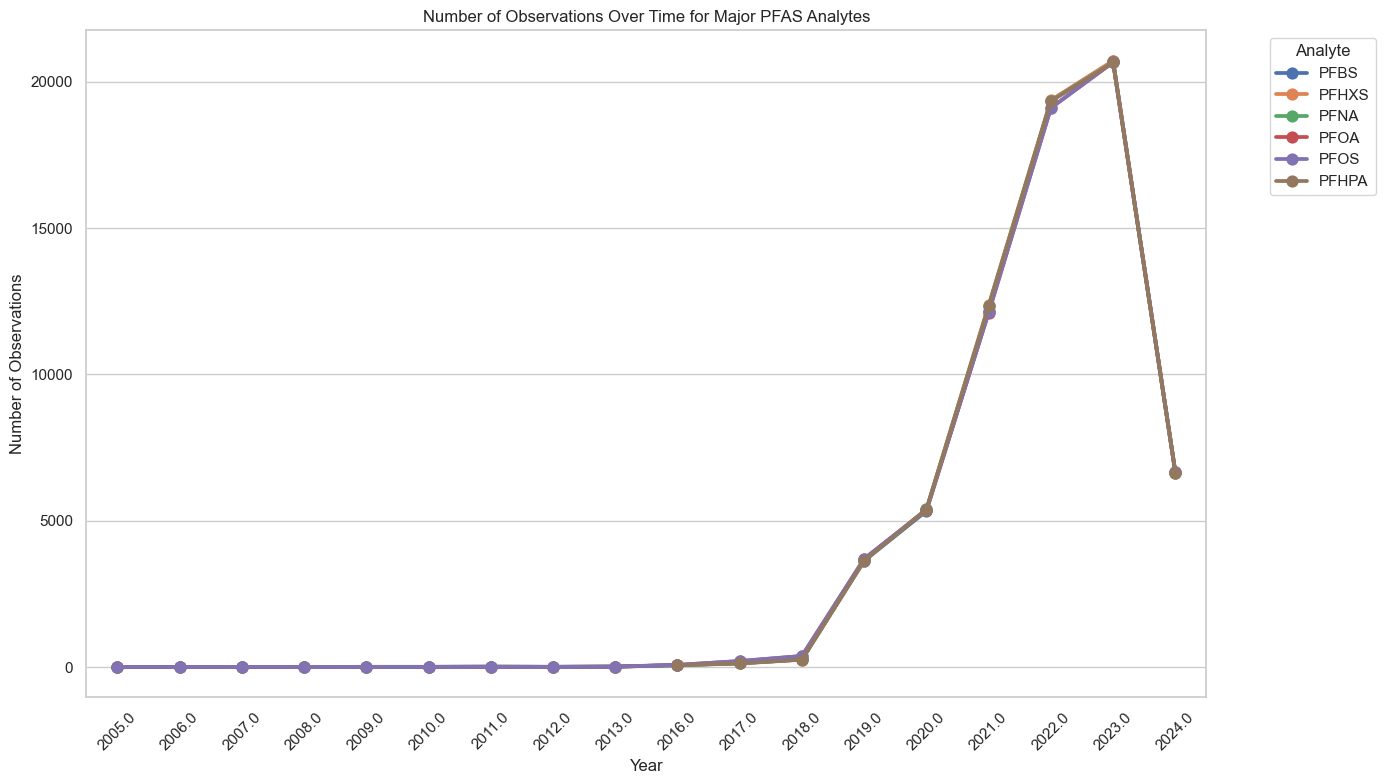

In [125]:
observation_counts = all_states_dw.groupby(['analyte', 'year']).size().reset_index(name='count')
observation_counts = observation_counts[observation_counts['analyte'].isin(pfas_analytes)]
plt.figure(figsize=(14, 8))
sns.pointplot(data=observation_counts, x='year', y='count', hue='analyte', markers='o', linestyles='-')

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Number of Observations Over Time for Major PFAS Analytes")
plt.legend(title="Analyte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

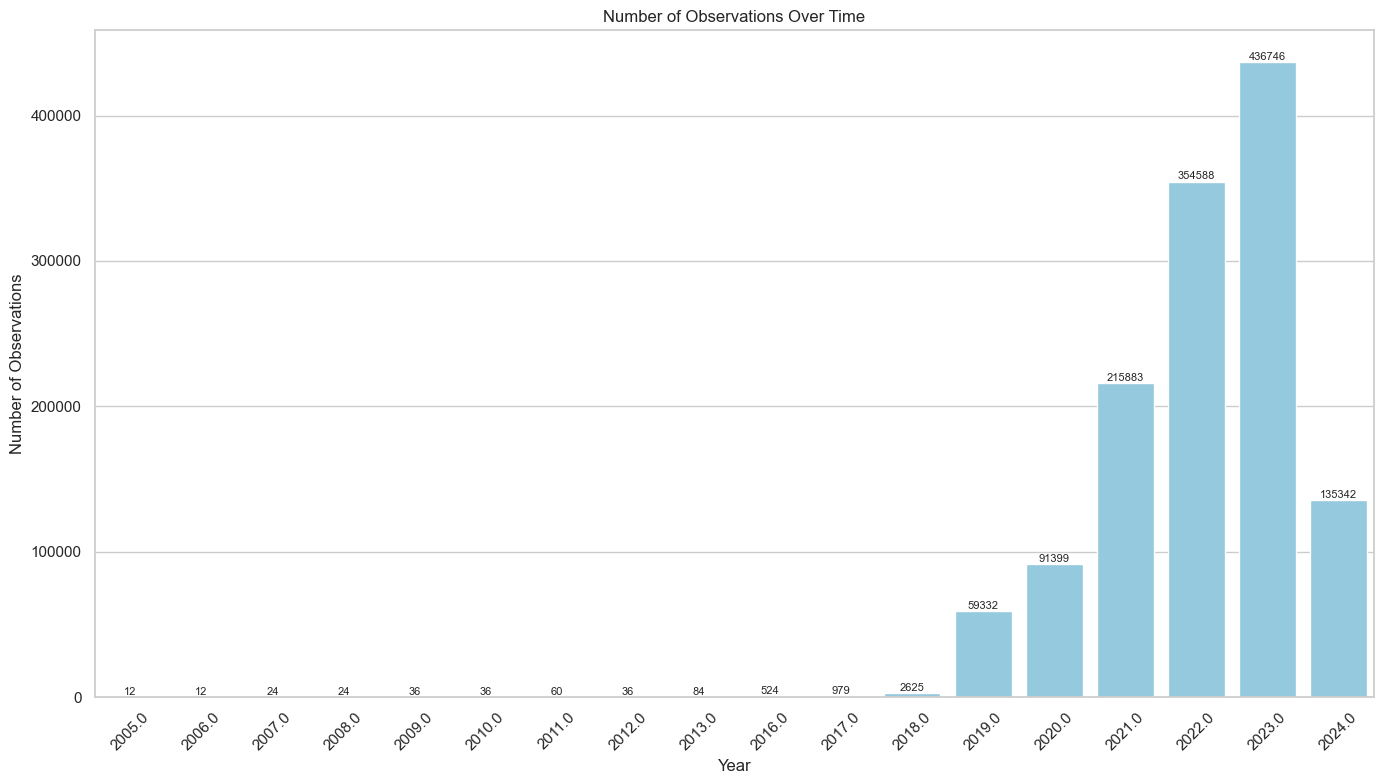

In [127]:
yearly_counts = all_states_dw.groupby('year').size().reset_index(name='count')

# Ensure 'year' is treated as a categorical variable to prevent large plot issues
yearly_counts['year'] = yearly_counts['year'].astype(str)  # Convert years to string for categorical plotting

# Plot with a manageable figure size
plt.figure(figsize=(14, 8))
sns.barplot(data=yearly_counts, x='year', y='count', color="skyblue")

# Adding labels on top of each bar
for index, row in yearly_counts.iterrows():
    plt.text(index, row['count'] + 100, f"{int(row['count'])}", ha='center', va='bottom', fontsize=8)

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.title("Number of Observations Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

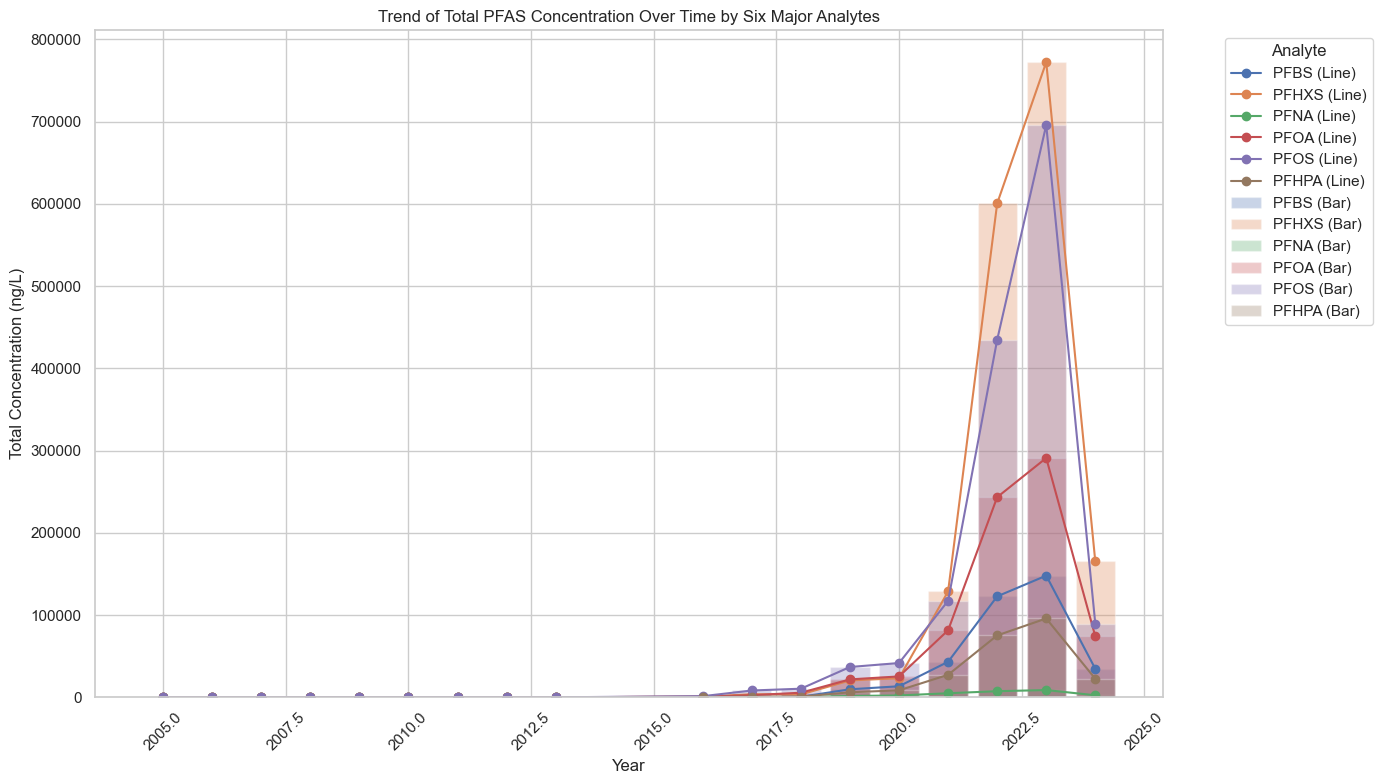

In [128]:
# Group the data by year and analyte and calculate the sum of concentrations
yearly_sum_concentration = all_states_dw.groupby(['year', 'analyte'], as_index=False)['concentration'].sum()
filtered_data = yearly_sum_concentration[
    yearly_sum_concentration['analyte'].isin(['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS'])
]

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar and line plot for each analyte to show trend over time
for analyte in filtered_data['analyte'].unique():
    subset = filtered_data[filtered_data['analyte'] == analyte]
    
    # Bar plot for each year's total concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)")

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Total Concentration (ng/L)")
plt.title("Trend of Total PFAS Concentration Over Time by Six Major Analytes")
plt.legend(title="Analyte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



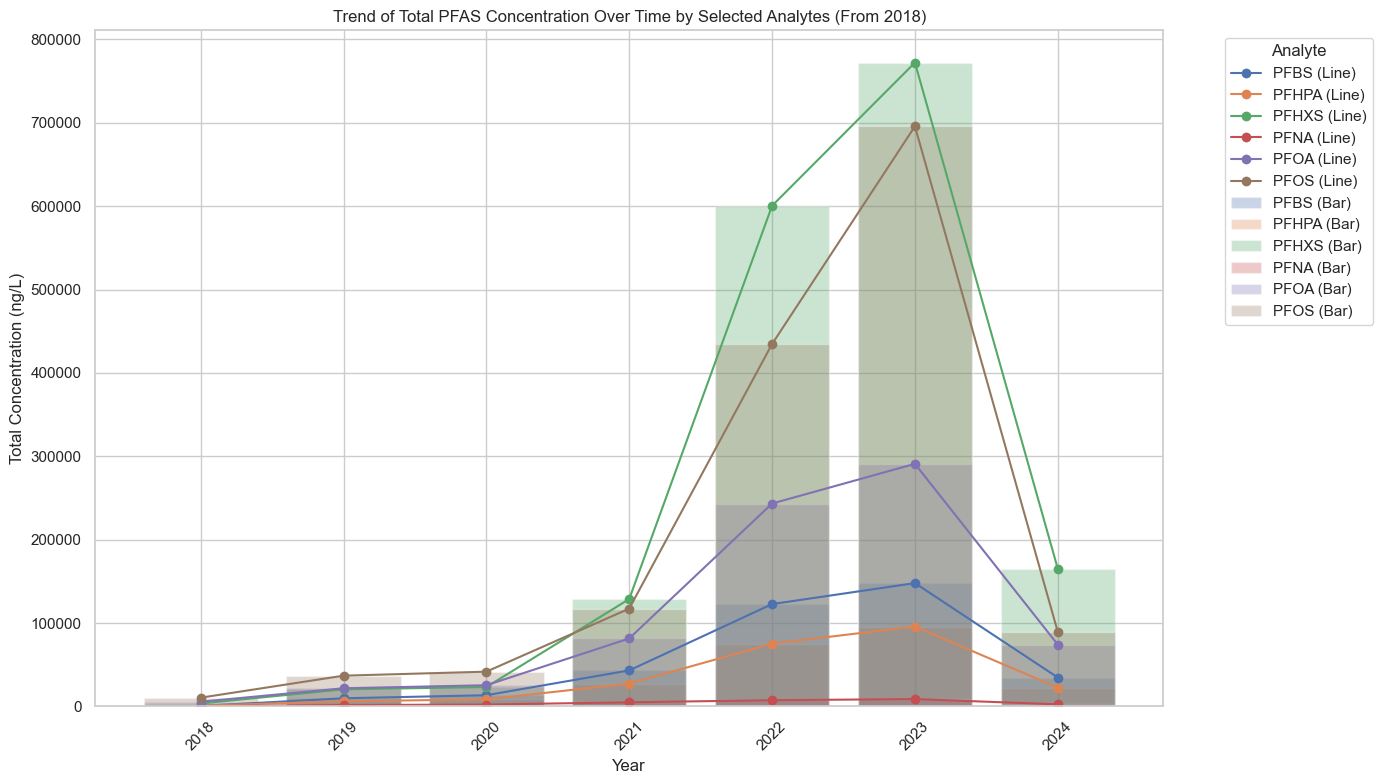

In [129]:
filtered_data = yearly_sum_concentration[
    (yearly_sum_concentration['year'] >= 2018) & 
    (yearly_sum_concentration['analyte'].isin(['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']))
]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar and line plot for each analyte to show trend over time
for analyte in filtered_data['analyte'].unique():
    subset = filtered_data[filtered_data['analyte'] == analyte]
    
    # Bar plot for each year's total concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)")

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Total Concentration (ng/L)")
plt.title("Trend of Total PFAS Concentration Over Time by Selected Analytes (From 2018)")
plt.legend(title="Analyte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

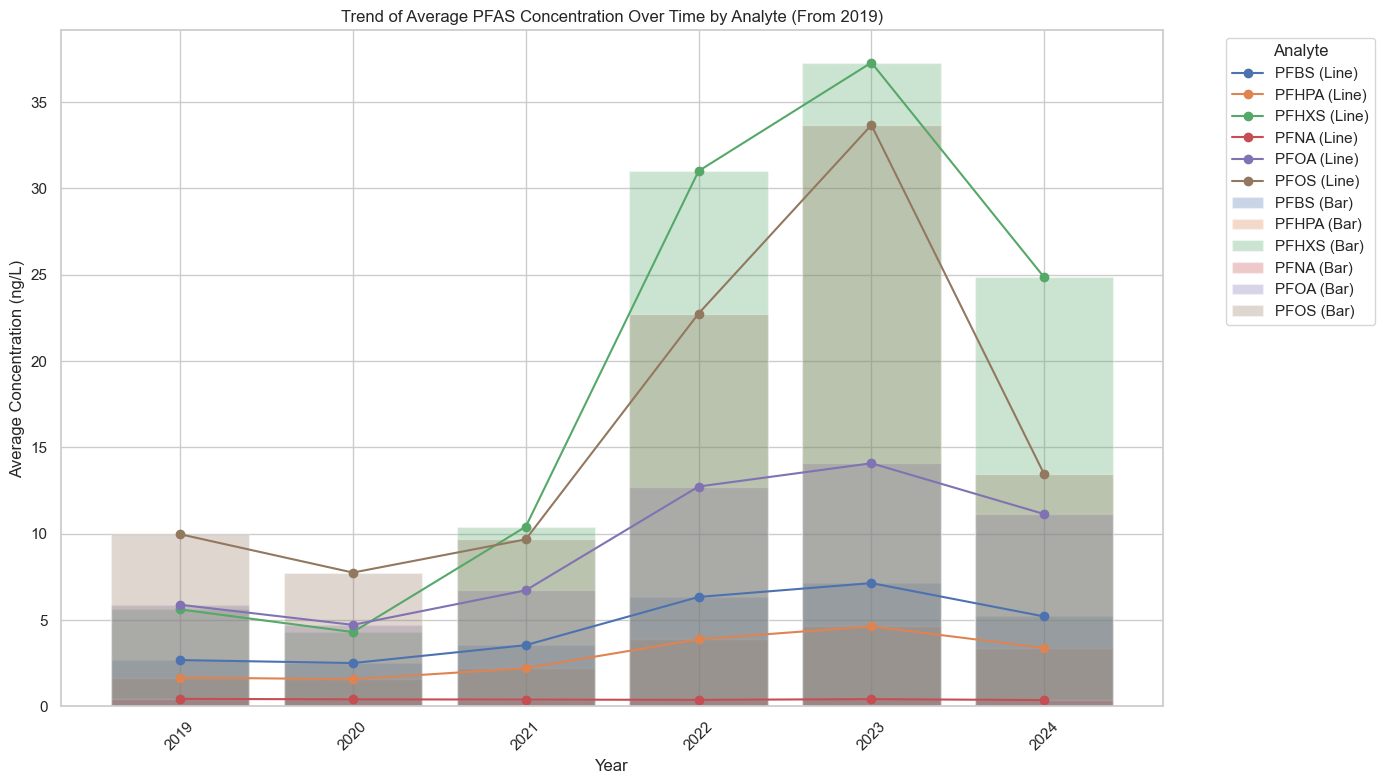

In [130]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Filter data to start from 2018
filtered_data = yearly_avg_concentration[yearly_avg_concentration['year'] >= 2019]

# Create a bar and line plot for each analyte to show trend over time
for analyte in filtered_data['analyte'].unique():
    subset = filtered_data[filtered_data['analyte'] == analyte]
    
    # Bar plot for each year's average concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)")

# Labeling and styling
plt.xlabel("Year")
plt.ylabel("Average Concentration (ng/L)")
plt.title("Trend of Average PFAS Concentration Over Time by Analyte (From 2019)")
plt.legend(title="Analyte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

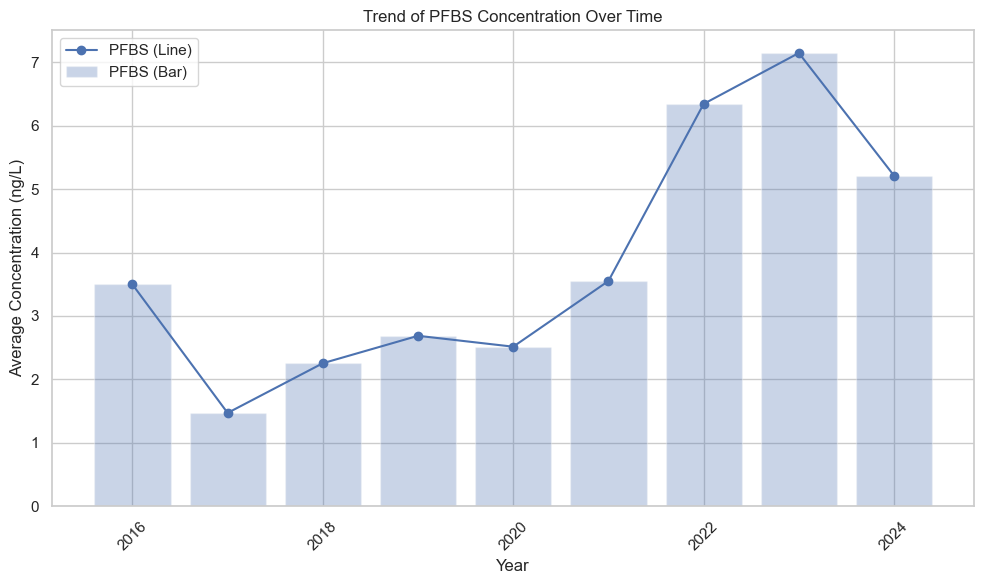

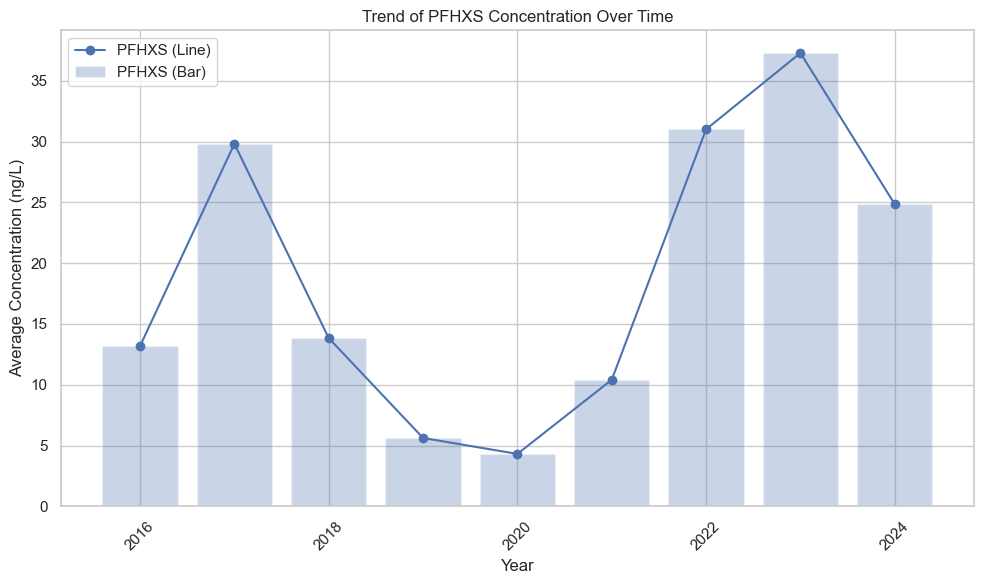

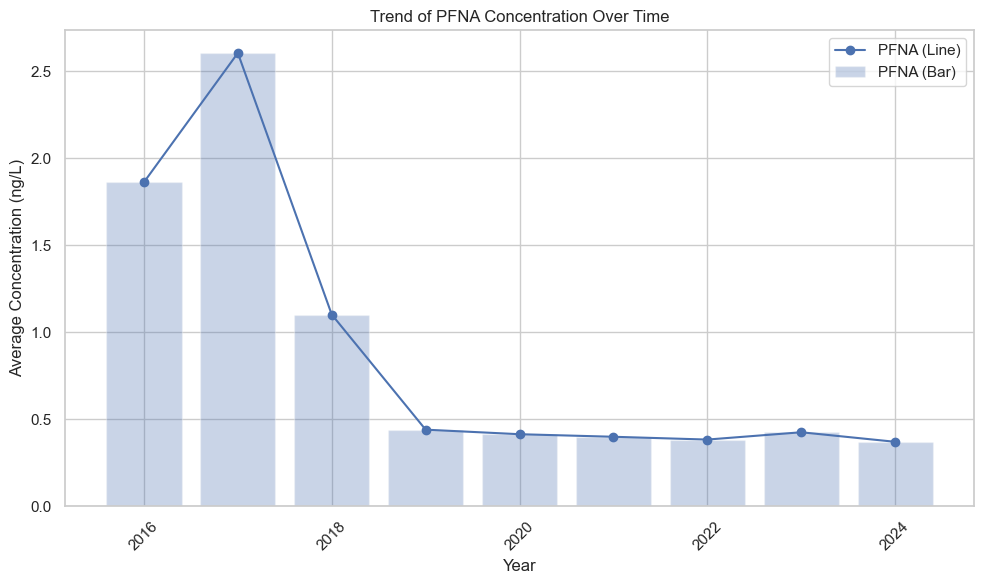

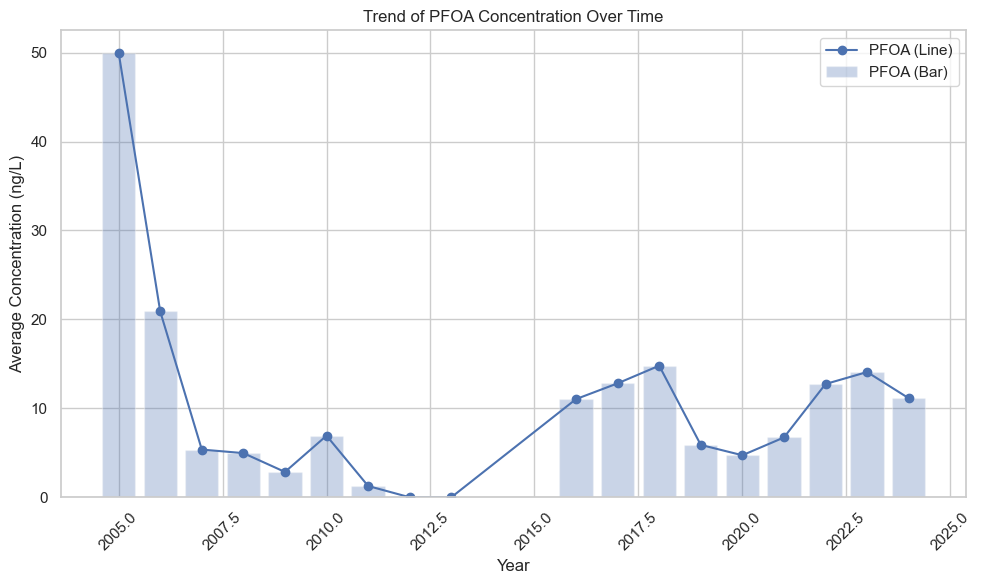

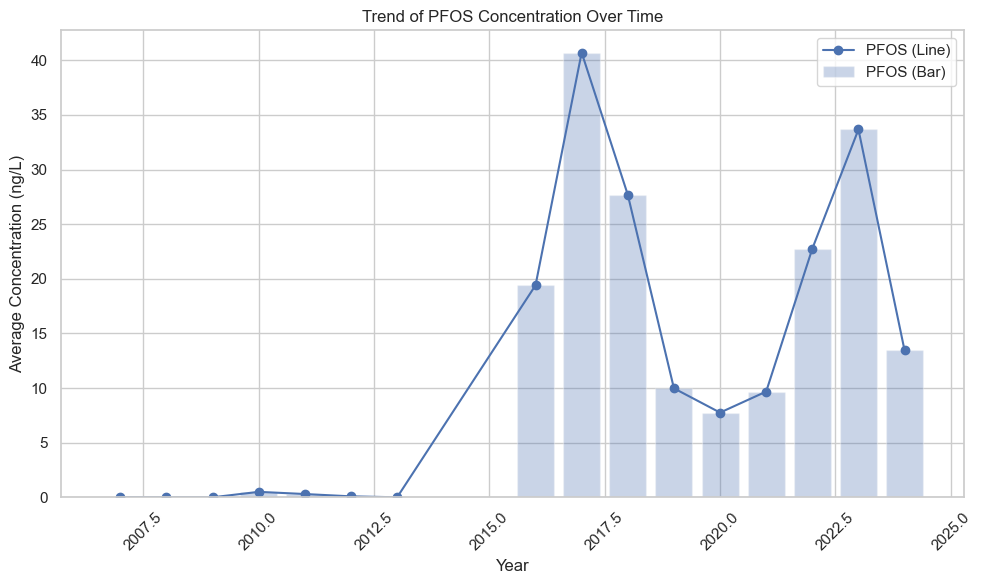

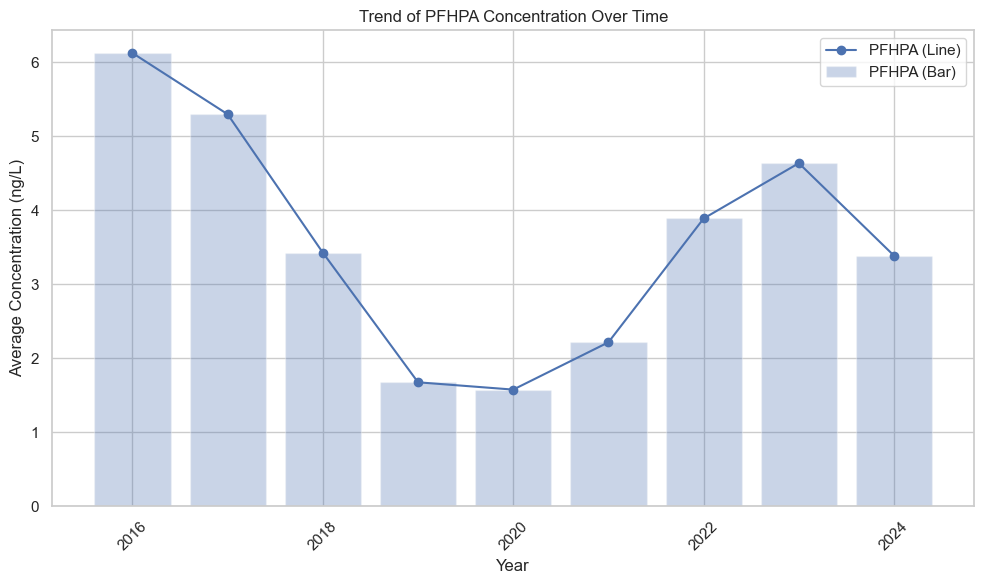

In [131]:
# Creating separate plots for each analyte to show trend over time

# Set up the plotting area
sns.set(style="whitegrid")

# Loop through each analyte to create individual plots
for analyte in yearly_avg_concentration['analyte'].unique():
    subset = yearly_avg_concentration[yearly_avg_concentration['analyte'] == analyte]
    
    # Set up a new figure for each analyte
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot for each year's average concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)", color='b')
    
    # Labeling and styling for each plot
    plt.xlabel("Year")
    plt.ylabel("Average Concentration (ng/L)")
    plt.title(f"Trend of {analyte} Concentration Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


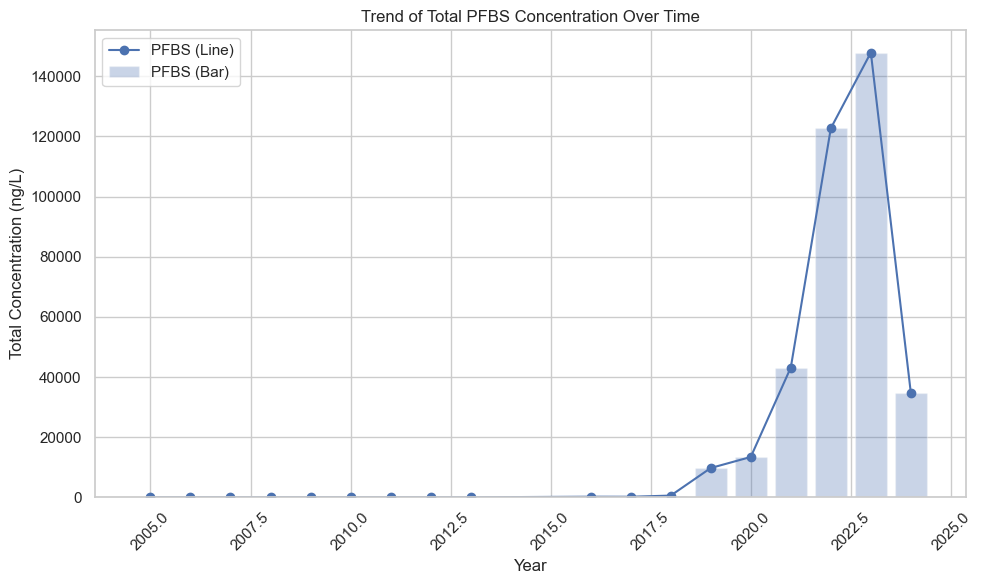

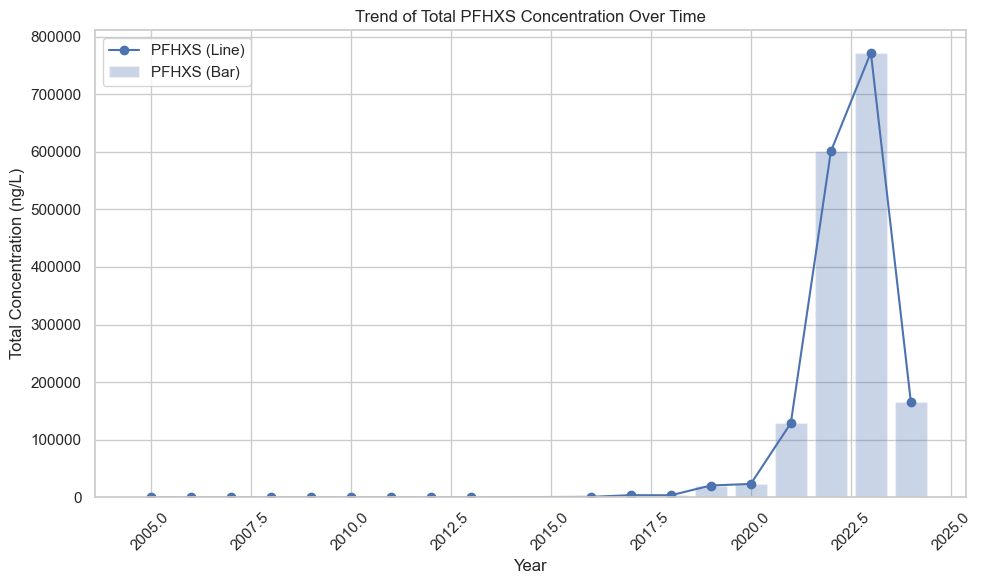

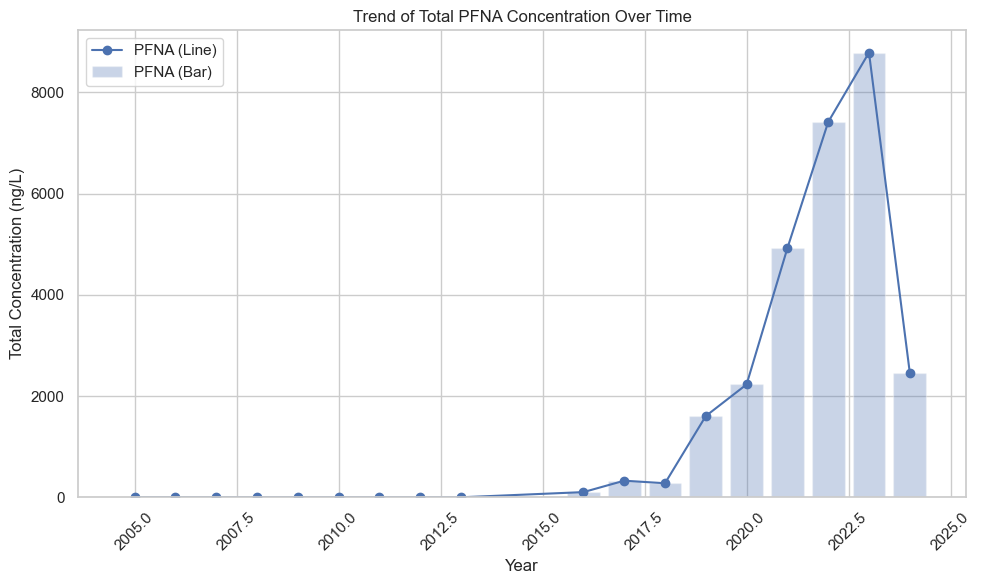

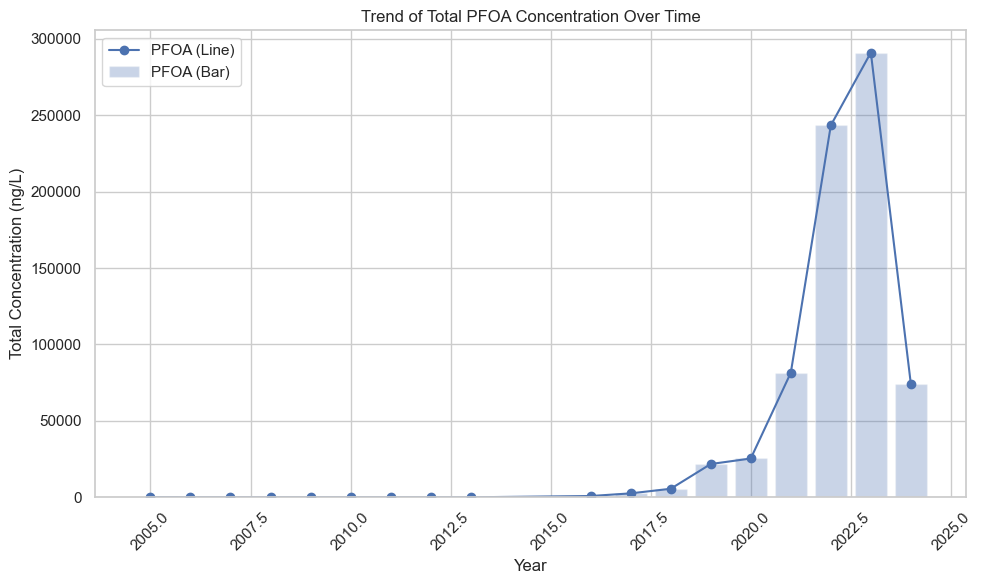

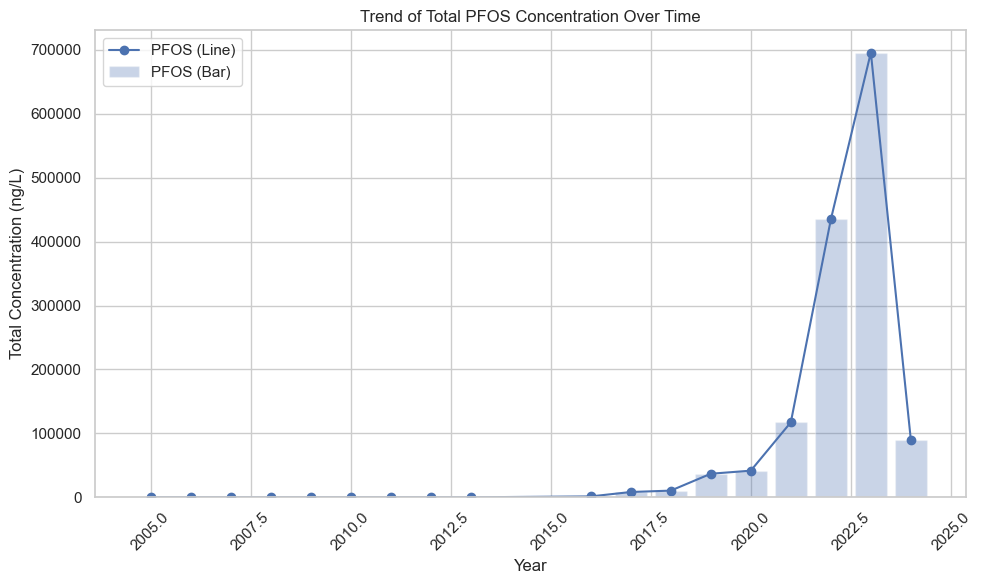

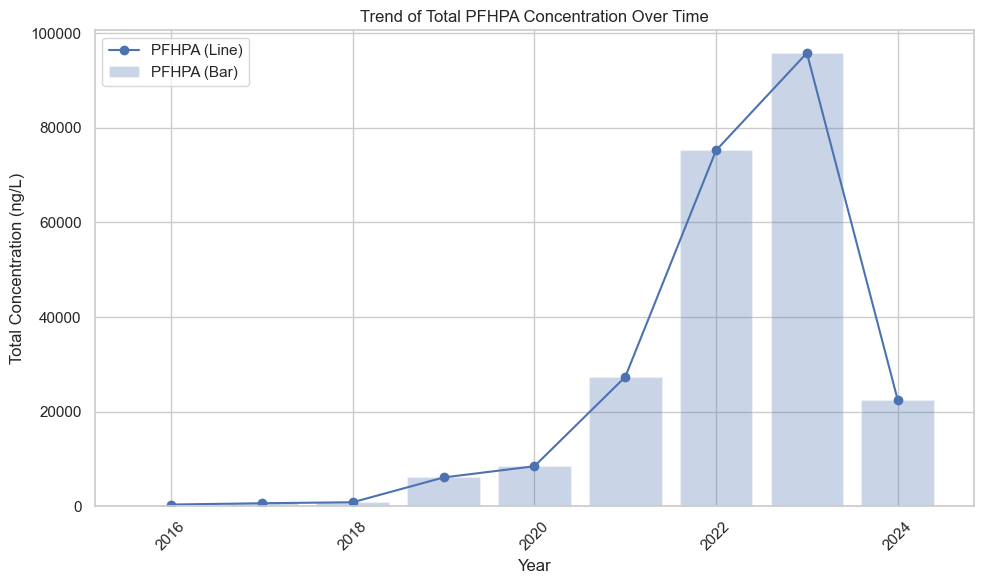

In [132]:
# Filter data for the specified analytes and calculate the sum of concentrations
pfas_analytes = ['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']
yearly_sum_concentration = all_states_dw[
    all_states_dw['analyte'].isin(pfas_analytes)
].groupby(['year', 'analyte'], as_index=False)['concentration'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
sns.set(style="whitegrid")

# Loop through each specified analyte to create individual plots
for analyte in yearly_sum_concentration['analyte'].unique():
    subset = yearly_sum_concentration[yearly_sum_concentration['analyte'] == analyte]
    
    # Set up a new figure for each analyte
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot for each year's total concentration
    plt.bar(subset['year'], subset['concentration'], alpha=0.3, label=f"{analyte} (Bar)")
    
    # Line plot to show trend over time
    plt.plot(subset['year'], subset['concentration'], marker='o', label=f"{analyte} (Line)", color='b')
    
    # Labeling and styling for each plot
    plt.xlabel("Year")
    plt.ylabel("Total Concentration (ng/L)")
    plt.title(f"Trend of Total {analyte} Concentration Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



### 3. Which state has the highest total PFAS concentration in terms of median, average, and sum?

In [133]:
state_concentration_stats = all_states_dw.groupby('state')['concentration'].agg(
    median_concentration='median',
    average_concentration='mean',
    total_count='size',
    total_concentration='sum'
).reset_index()
state_concentration_stats

state  median_concentration  average_concentration  total_count  \
0           Alaska                   0.0              17.325501          820   
1          Arizona                   0.0               1.806973          351   
2         Arkansas                   0.0               4.574583          480   
3       California                   0.0               2.341887       456198   
4         Colorado                   0.0               8.549391        21876   
5      Connecticut                   NaN                    NaN            6   
6         Delaware                   0.0              33.111607         1008   
7          Florida                   0.0               2.485453         6169   
8          Georgia                   0.0               2.434722          144   
9             Guam                 410.0             410.000000            2   
10          Hawaii                   0.0               0.223309          269   
11        Illinois                   0.0               2.313158          458   
12         Indiana                   0.0               0.104254        50204   
13          Kansas                   0.0              11.917708          386   
14       Louisiana                   NaN                    NaN            2   
15           Maine                   0.0               8.018752        20042   
16        Maryland                   0.0               1.552085         4340   
17   Massachusetts                   0.0               1.060352       350017   
18        Michigan                   0.0               4.006663        22962   
19       Minnesota                   0.0               5.796244         1619   
20     Mississippi                   1.0               1.000000            4   
21        Missouri                   NaN                    NaN            2   
22         Montana                   0.0               4.513145          870   
23        Nebraska                   1.0               1.333333            8   
24   New Hampshire                   0.0               7.740821         9047   
25      New Jersey                   0.0               3.617431         3212   
26      New Mexico                   0.0               4.077241         1322   
27        New York                   0.0               4.731533         3324   
28  North Carolina                   0.0               0.338440         3689   
29    North Dakota                   0.0               0.021363         2472   
30            Ohio                   0.0               2.191109         1516   
31        Oklahoma                   0.0               5.428463         1322   
32          Oregon                   0.0               0.104409         4735   
33    Pennsylvania                   0.0               1.777702        18816   
34     Puerto Rico                   2.0               2.333333            6   
35    Rhode Island                   0.0               1.115718         3622   
36  South Carolina                   0.0               2.177407        17625   
37    South Dakota                   0.0              22.404173         3312   
38       Tennessee                   0.0               5.747486          358   
39           Texas                   0.0              28.149838       139290   
40            Utah                   2.5               2.500000            2   
41         Vermont                   0.0               0.267231        37131   
42  Virgin Islands                   1.0               2.000000            8   
43        Virginia                   0.0               0.765821        12046   
44      Washington                   0.0               2.727241        93093   
45       Wisconsin                   0.0               0.426566        62969   
46         Wyoming                   1.0               1.000000            2   

    total_concentration  
0          1.401633e+04  
1          6.089500e+02  
2          2.195800e+03  
3          1.068348e+06  
4          1.870265e+05  
5          0.000

In [134]:
highest_median_state = state_concentration_stats.loc[state_concentration_stats['median_concentration'].idxmax()]
highest_average_state = state_concentration_stats.loc[state_concentration_stats['average_concentration'].idxmax()]
highest_sum_state = state_concentration_stats.loc[state_concentration_stats['total_concentration'].idxmax()]

highest_median_state, highest_average_state, highest_sum_state

(state                     Guam
 median_concentration     410.0
 average_concentration    410.0
 total_count                  2
 total_concentration      410.0
 Name: 9, dtype: object,
 state                     Guam
 median_concentration     410.0
 average_concentration    410.0
 total_count                  2
 total_concentration      410.0
 Name: 9, dtype: object,
 state                        Texas
 median_concentration           0.0
 average_concentration    28.149838
 total_count                 139290
 total_concentration      3920962.8
 Name: 39, dtype: object)

In [135]:
state_concentration_stats.sort_values(by='average_concentration', ascending=False)

state  median_concentration  average_concentration  total_count  \
9             Guam                 410.0             410.000000            2   
6         Delaware                   0.0              33.111607         1008   
39           Texas                   0.0              28.149838       139290   
37    South Dakota                   0.0              22.404173         3312   
0           Alaska                   0.0              17.325501          820   
13          Kansas                   0.0              11.917708          386   
4         Colorado                   0.0               8.549391        21876   
15           Maine                   0.0               8.018752        20042   
24   New Hampshire                   0.0               7.740821         9047   
19       Minnesota                   0.0               5.796244         1619   
38       Tennessee                   0.0               5.747486          358   
31        Oklahoma                   0.0               5.428463         1322   
27        New York                   0.0               4.731533         3324   
2         Arkansas                   0.0               4.574583          480   
22         Montana                   0.0               4.513145          870   
26      New Mexico                   0.0               4.077241         1322   
18        Michigan                   0.0               4.006663        22962   
25      New Jersey                   0.0               3.617431         3212   
44      Washington                   0.0               2.727241        93093   
40            Utah                   2.5               2.500000            2   
7          Florida                   0.0               2.485453         6169   
8          Georgia                   0.0               2.434722          144   
3       California                   0.0               2.341887       456198   
34     Puerto Rico                   2.0               2.333333            6   
11        Illinois                   0.0               2.313158          458   
30            Ohio                   0.0               2.191109         1516   
36  South Carolina                   0.0               2.177407        17625   
42  Virgin Islands                   1.0               2.000000            8   
1          Arizona                   0.0               1.806973          351   
33    Pennsylvania                   0.0               1.777702        18816   
16        Maryland                   0.0               1.552085         4340   
23        Nebraska                   1.0               1.333333            8   
35    Rhode Island                   0.0               1.115718         3622   
17   Massachusetts                   0.0               1.060352       350017   
20     Mississippi                   1.0               1.000000            4   
46         Wyoming                   1.0               1.000000            2   
43        Virginia                   0.0               0.765821        12046   
45       Wisconsin                   0.0               0.426566        62969   
28  North Carolina                   0.0               0.338440         3689   
41         Vermont                   0.0               0.267231        37131   
10          Hawaii                   0.0               0.223309          269   
32          Oregon                   0.0               0.104409         4735   
12         Indiana                   0.0               0.104254        50204   
29    North Dakota                   0.0               0.021363         2472   
5      Connecticut                   NaN                    NaN            6   
14       Louisiana                   NaN                    NaN            2   
21        Missouri                   NaN                    NaN            2   

    total_concentration  
9          4.100000e+02  
6          3.337650e+04  
39         3.920963e+06  
37         7.411300e+04  
0          1.401633e+04  
13         4.576

In [136]:
state_concentration_stats.sort_values(by='total_concentration', ascending=False)

state  median_concentration  average_concentration  total_count  \
39           Texas                   0.0              28.149838       139290   
3       California                   0.0               2.341887       456198   
17   Massachusetts                   0.0               1.060352       350017   
44      Washington                   0.0               2.727241        93093   
4         Colorado                   0.0               8.549391        21876   
15           Maine                   0.0               8.018752        20042   
18        Michigan                   0.0               4.006663        22962   
37    South Dakota                   0.0              22.404173         3312   
24   New Hampshire                   0.0               7.740821         9047   
36  South Carolina                   0.0               2.177407        17625   
33    Pennsylvania                   0.0               1.777702        18816   
6         Delaware                   0.0              33.111607         1008   
45       Wisconsin                   0.0               0.426566        62969   
27        New York                   0.0               4.731533         3324   
7          Florida                   0.0               2.485453         6169   
0           Alaska                   0.0              17.325501          820   
25      New Jersey                   0.0               3.617431         3212   
41         Vermont                   0.0               0.267231        37131   
19       Minnesota                   0.0               5.796244         1619   
43        Virginia                   0.0               0.765821        12046   
31        Oklahoma                   0.0               5.428463         1322   
16        Maryland                   0.0               1.552085         4340   
12         Indiana                   0.0               0.104254        50204   
13          Kansas                   0.0              11.917708          386   
35    Rhode Island                   0.0               1.115718         3622   
22         Montana                   0.0               4.513145          870   
26      New Mexico                   0.0               4.077241         1322   
30            Ohio                   0.0               2.191109         1516   
2         Arkansas                   0.0               4.574583          480   
38       Tennessee                   0.0               5.747486          358   
28  North Carolina                   0.0               0.338440         3689   
11        Illinois                   0.0               2.313158          458   
1          Arizona                   0.0               1.806973          351   
32          Oregon                   0.0               0.104409         4735   
9             Guam                 410.0             410.000000            2   
8          Georgia                   0.0               2.434722          144   
10          Hawaii                   0.0               0.223309          269   
29    North Dakota                   0.0               0.021363         2472   
34     Puerto Rico                   2.0               2.333333            6   
42  Virgin Islands                   1.0               2.000000            8   
40            Utah                   2.5               2.500000            2   
23        Nebraska                   1.0               1.333333            8   
20     Mississippi                   1.0               1.000000            4   
46         Wyoming                   1.0               1.000000            2   
21        Missouri                   NaN                    NaN            2   
14       Louisiana                   NaN                    NaN            2   
5      Connecticut                   NaN                    NaN            6   

    total_concentration  
39         3.920963e+06  
3          1.068348e+06  
17         3.711391e+05  
44         2.538734e+05  
4          1.870265e+05  
15         1.438

### 4. Which state has the largest number of samples tested?

In [194]:
state_sample_counts = all_states_dw['state'].value_counts().reset_index()
state_sample_counts.columns = ['state', 'sample_count']
state_sample_counts

state  sample_count
0       California        456198
1    Massachusetts        350017
2            Texas        139290
3       Washington         93093
4        Wisconsin         62969
5          Indiana         50204
6          Vermont         37131
7         Michigan         22962
8         Colorado         21876
9            Maine         20042
10    Pennsylvania         18816
11  South Carolina         17625
12        Virginia         12046
13   New Hampshire          9047
14         Florida          6169
15          Oregon          4735
16        Maryland          4340
17  North Carolina          3689
18    Rhode Island          3622
19        New York          3324
20    South Dakota          3312
21      New Jersey          3212
22    North Dakota          2472
23       Minnesota          1619
24            Ohio          1516
25      New Mexico          1322
26        Oklahoma          1322
27        Delaware          1008
28         Montana           870
29          Alaska           820
30        Arkansas           480
31        Illinois           458
32          Kansas           386
33       Tennessee           358
34         Arizona           351
35          Hawaii           269
36         Georgia           144
37  Virgin Islands             8
38        Nebraska             8
39     Puerto Rico             6
40     Connecticut             6
41     Mississippi             4
42            Utah             2
43            Guam             2
44        Missouri             2
45       Louisiana             2
46         Wyoming             2

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_16125/3725376963.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




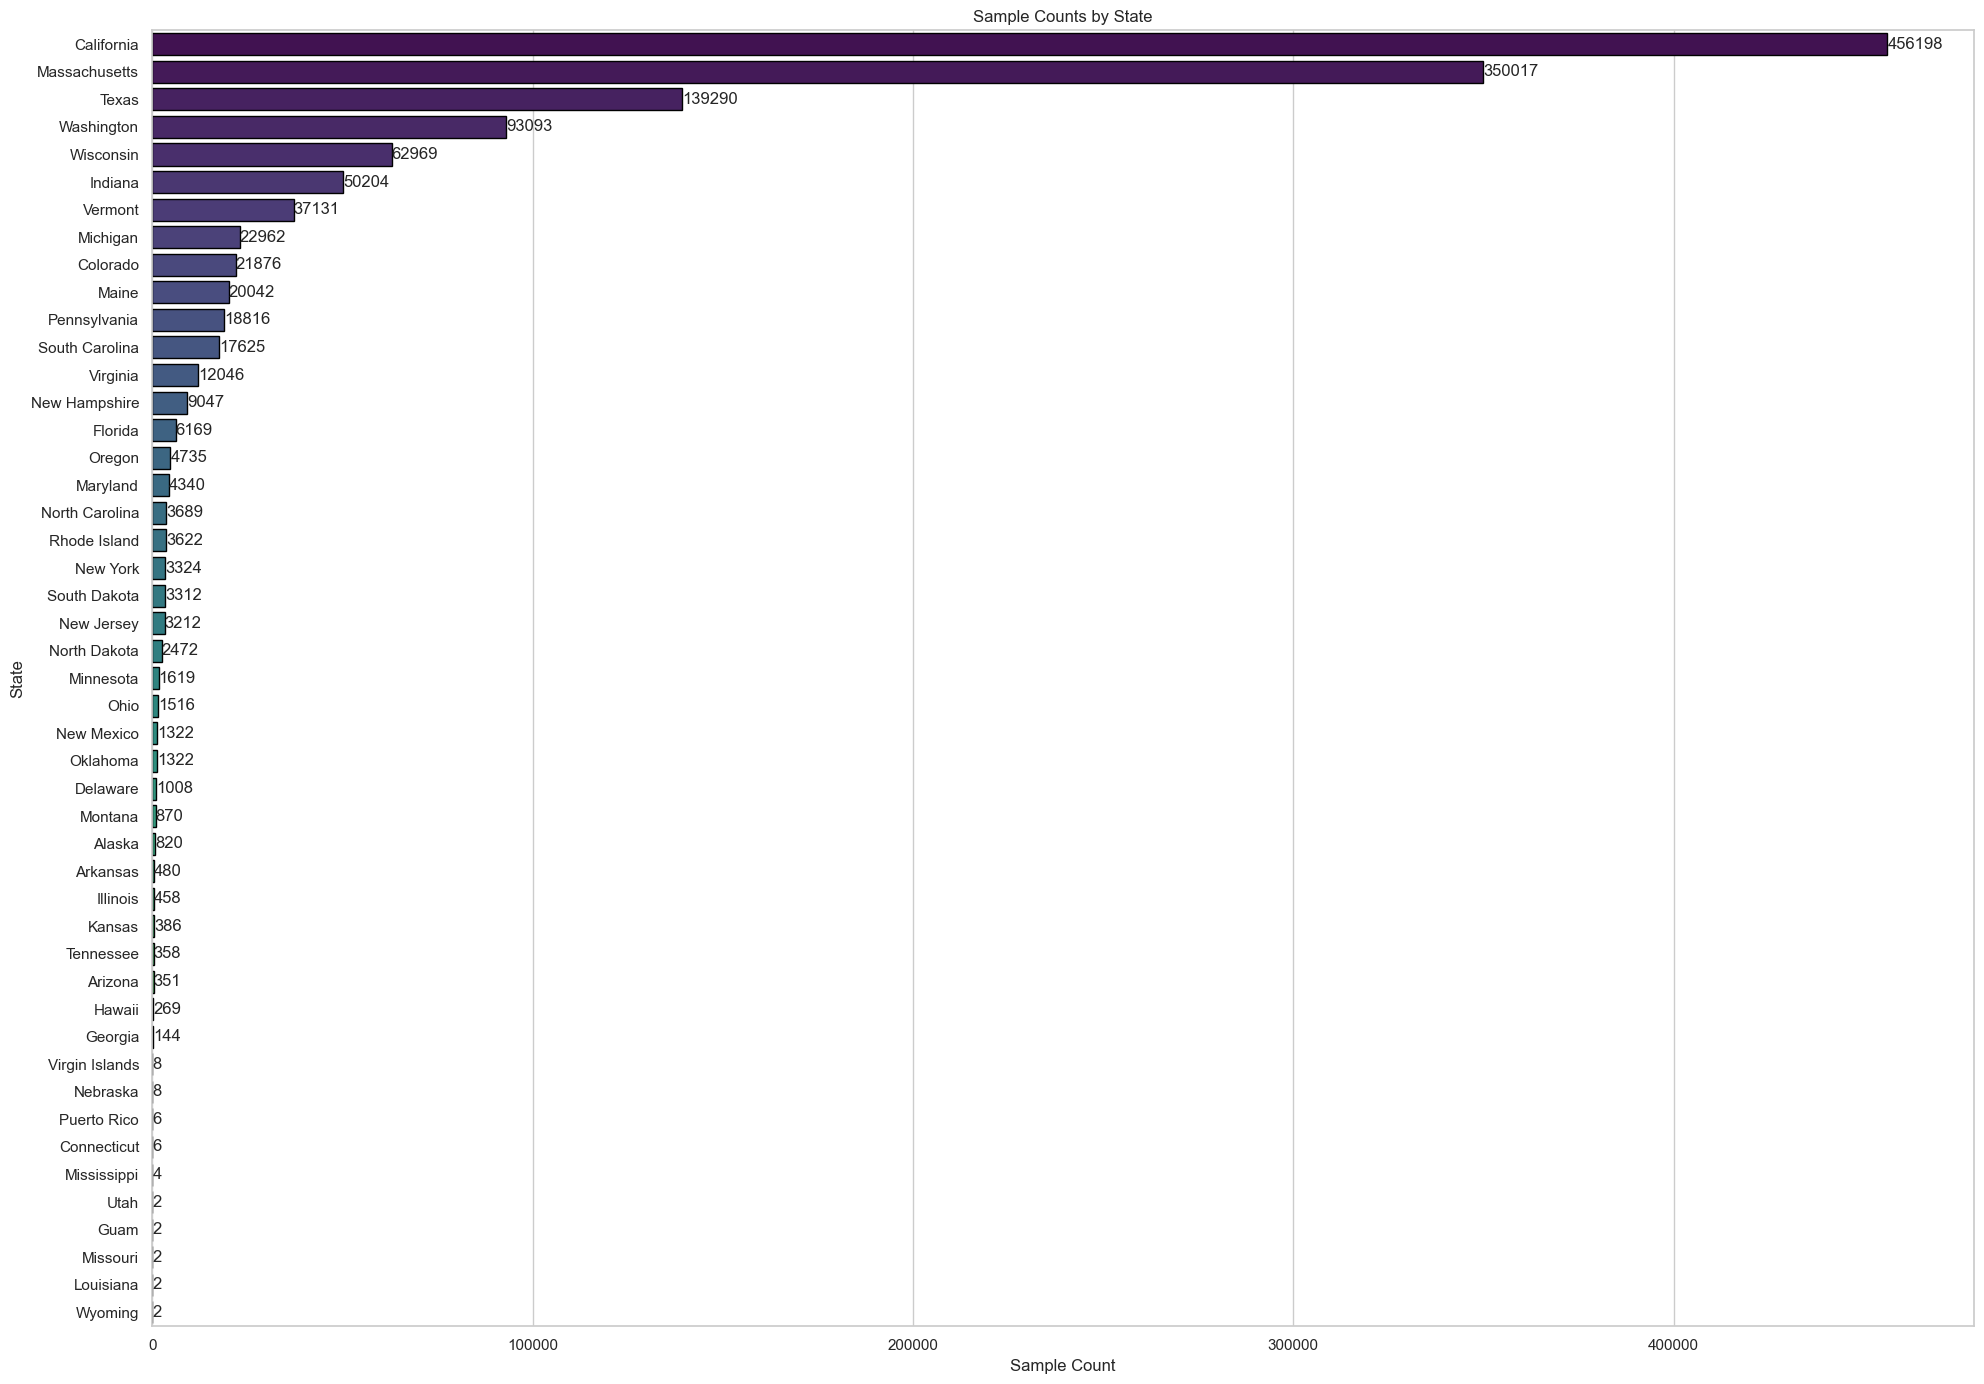

In [195]:
plt.figure(figsize=(20, 14))

# Create the horizontal bar plot using seaborn for state_sample_counts
sns.barplot(
    x='sample_count', 
    y='state', 
    data=state_sample_counts, 
    palette='viridis',  
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Sample Count')
plt.ylabel('State')
plt.title('Sample Counts by State')

# Annotate each bar with the sample count
for index, value in enumerate(state_sample_counts['sample_count']):
    plt.text(value + 0.1, index, str(value), va='center')

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show the chart
plt.show()

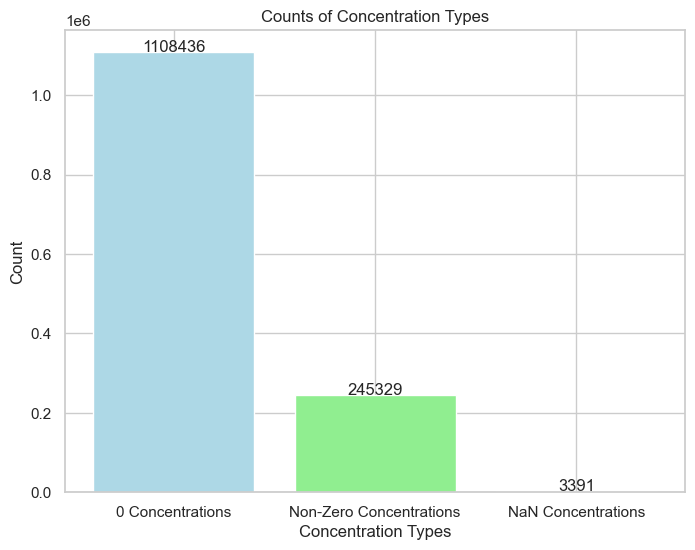

In [138]:
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Concentration Types')
plt.ylabel('Count')
plt.title('Counts of Concentration Types')

# Display the values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=12)

# Show the bar chart
plt.show()

### 5. Which PFAS compound has the highest concentration, both in terms of average and median?

In [139]:
# Calculate the average and median concentration for each PFAS compound
pfas_concentration_stats = all_states_dw.groupby('analyte')['concentration'].agg(
    average_concentration='mean',
    median_concentration='median'
).reset_index()
pfas_concentration_stats.sort_values(by='average_concentration', ascending=False).reset_index(drop=True)[0:10] # top 10 PFAS

analyte  average_concentration  median_concentration
0   PFHXS              24.169845                 0.000
1    PFOS              20.483585                 0.390
2   PFPEA              19.649716                 0.000
3   PFHXA              13.089934                 0.000
4    PFBA              11.882102                 1.660
5    PFOA              10.585127                 0.629
6   PFPES               8.972851                 0.000
7    PFBS               5.316291                 0.000
8  6:2FTS               4.735221                 0.000
9   PFHPA               3.350735                 0.000

In [140]:
highest_average_pfas = pfas_concentration_stats.loc[pfas_concentration_stats['average_concentration'].idxmax()]
highest_median_pfas = pfas_concentration_stats.loc[pfas_concentration_stats['median_concentration'].idxmax()]

highest_average_pfas, highest_median_pfas

(analyte                      PFHXS
 average_concentration    24.169845
 median_concentration           0.0
 Name: 27, dtype: object,
 analyte                       PFBA
 average_concentration    11.882102
 median_concentration          1.66
 Name: 16, dtype: object)

### 6. Which PFAS compound has the most samples tested?

In [177]:
pfas_sample_counts = all_states_dw['analyte'].value_counts().reset_index()
pfas_sample_counts.columns = ['analyte', 'sample_count']
pfas_sample_counts[0:10] # top 10 PFAS


analyte  sample_count
0   PFHXS         71882
1    PFOS         71700
2    PFOA         71682
3   PFHPA         71643
4    PFBS         71561
5    PFNA         71502
6    PFDA         71109
7   PFHXA         70859
8   PFDOA         70778
9   PFUNA         70060

In [178]:
pfas_with_most_samples = pfas_sample_counts.loc[pfas_sample_counts['sample_count'].idxmax()]

pfas_with_most_samples

analyte         PFHXS
sample_count    71882
Name: 0, dtype: object

### 7. How do PFAS concentrations compare across different datasets?  (Total PFAS concentration in average, PFOA, PFOS ......)

In [179]:
pfas_avg_concentration_by_source = all_states_dw.groupby(['data_source', 'analyte']).agg(
    average_concentration=('concentration', 'mean')
).reset_index()
pfas_avg_concentration_by_source

data_source       analyte  \
0                                         ADEQ  11CL-PF3OUDS   
1                                         ADEQ    9CL-PF3ONS   
2                                         ADEQ         ADONA   
3                                         ADEQ       HFPO-DA   
4                                         ADEQ      NETFOSAA   
..                                         ...           ...   
380  WISconsin Department of Natural Resources         PFPEA   
381  WISconsin Department of Natural Resources         PFPES   
382  WISconsin Department of Natural Resources        PFTEDA   
383  WISconsin Department of Natural Resources        PFTRDA   
384  WISconsin Department of Natural Resources         PFUNA   

     average_concentration  
0                 0.000000  
1                 0.000000  
2                 0.000000  
3                 0.000000  
4                 0.000000  
..                     ...  
380               2.485114  
381               0.369257  
382               0.000000  
383               0.000000  
384               0.001083  

[385 rows x 3 columns]

In [180]:
pfas_avg_concentration_by_source = filtered_df.groupby(['data_source', 'analyte']).agg(
    average_concentration=('concentration', 'mean')
).reset_index()
pfas_avg_concentration_by_source

data_source analyte  average_concentration
0                                         ADEQ    PFBS               0.000000
1                                         ADEQ   PFHPA               0.000000
2                                         ADEQ   PFHXS               3.010000
3                                         ADEQ    PFNA               0.000000
4                                         ADEQ    PFOA               1.110000
..                                         ...     ...                    ...
102  WISconsin Department of Natural Resources   PFHPA               0.445336
103  WISconsin Department of Natural Resources   PFHXS               1.910904
104  WISconsin Department of Natural Resources    PFNA               0.109067
105  WISconsin Department of Natural Resources    PFOA               1.302477
106  WISconsin Department of Natural Resources    PFOS               1.686579

[107 rows x 3 columns]

In [65]:
grouped_df = all_states_dw.groupby('data_source').agg(
    average_concentration=('concentration', 'mean'),
    sample_counts=('concentration', 'size'),
    total_concentration=('concentration', 'sum')
).reset_index()
sorted_grouped_df = grouped_df.sort_values(by='average_concentration', ascending=False).reset_index(drop=True)
sorted_grouped_df

data_source  average_concentration  \
0                                              PPL             824.533333   
1                                              DoD              16.363590   
2                  GAMA-Division of Drinking Water               2.173129   
3                                          MassGOV               1.621608   
4                                              MDE               1.503042   
5        PFAS Testing of Ohio Public Water Systems               1.442883   
6                                        Maine DWP               1.120891   
7                                            CDPHE               0.798694   
8                                              DEP               0.765994   
9                    VIRGINIA DEPARTMENT OF HEALTH               0.603253   
10       WISconsin Department of Natural Resources               0.561643   
11                                            NMED               0.486181   
12                                             DOH               0.404579   
13                                            ADEQ               0.297500   
14                                           DWGWP               0.266263   
15                                            DHEC               0.137078   
16  Indiana Department of Environmental Management               0.104254   
17                                             OHA               0.103596   
18                                             DEQ               0.018542   

    sample_counts  total_concentration  
0             402         1.360480e+05  
1          305348         4.996589e+06  
2          444820         9.666512e+05  
3          369191         5.986830e+05  
4            3876         5.825790e+03  
5             924         7.257700e+02  
6           10220         9.107240e+03  
7           12834         1.025044e+04  
8            7828         5.996200e+03  
9            7175         4.328343e+03  
10          66255         3.720100e+04  
11           1216         2.737200e+02  
12          48968         1.981140e+04  
13             36         1.071000e+01  
14          37123         9.884490e+03  
15           8736         1.197510e+03  
16          50202         5.227725e+03  
17           4711         4.880400e+02  
18           2466         4.572500e+01

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_14033/2535390038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='data_source', x='average_concentration', data=sorted_grouped_df, palette='muted')


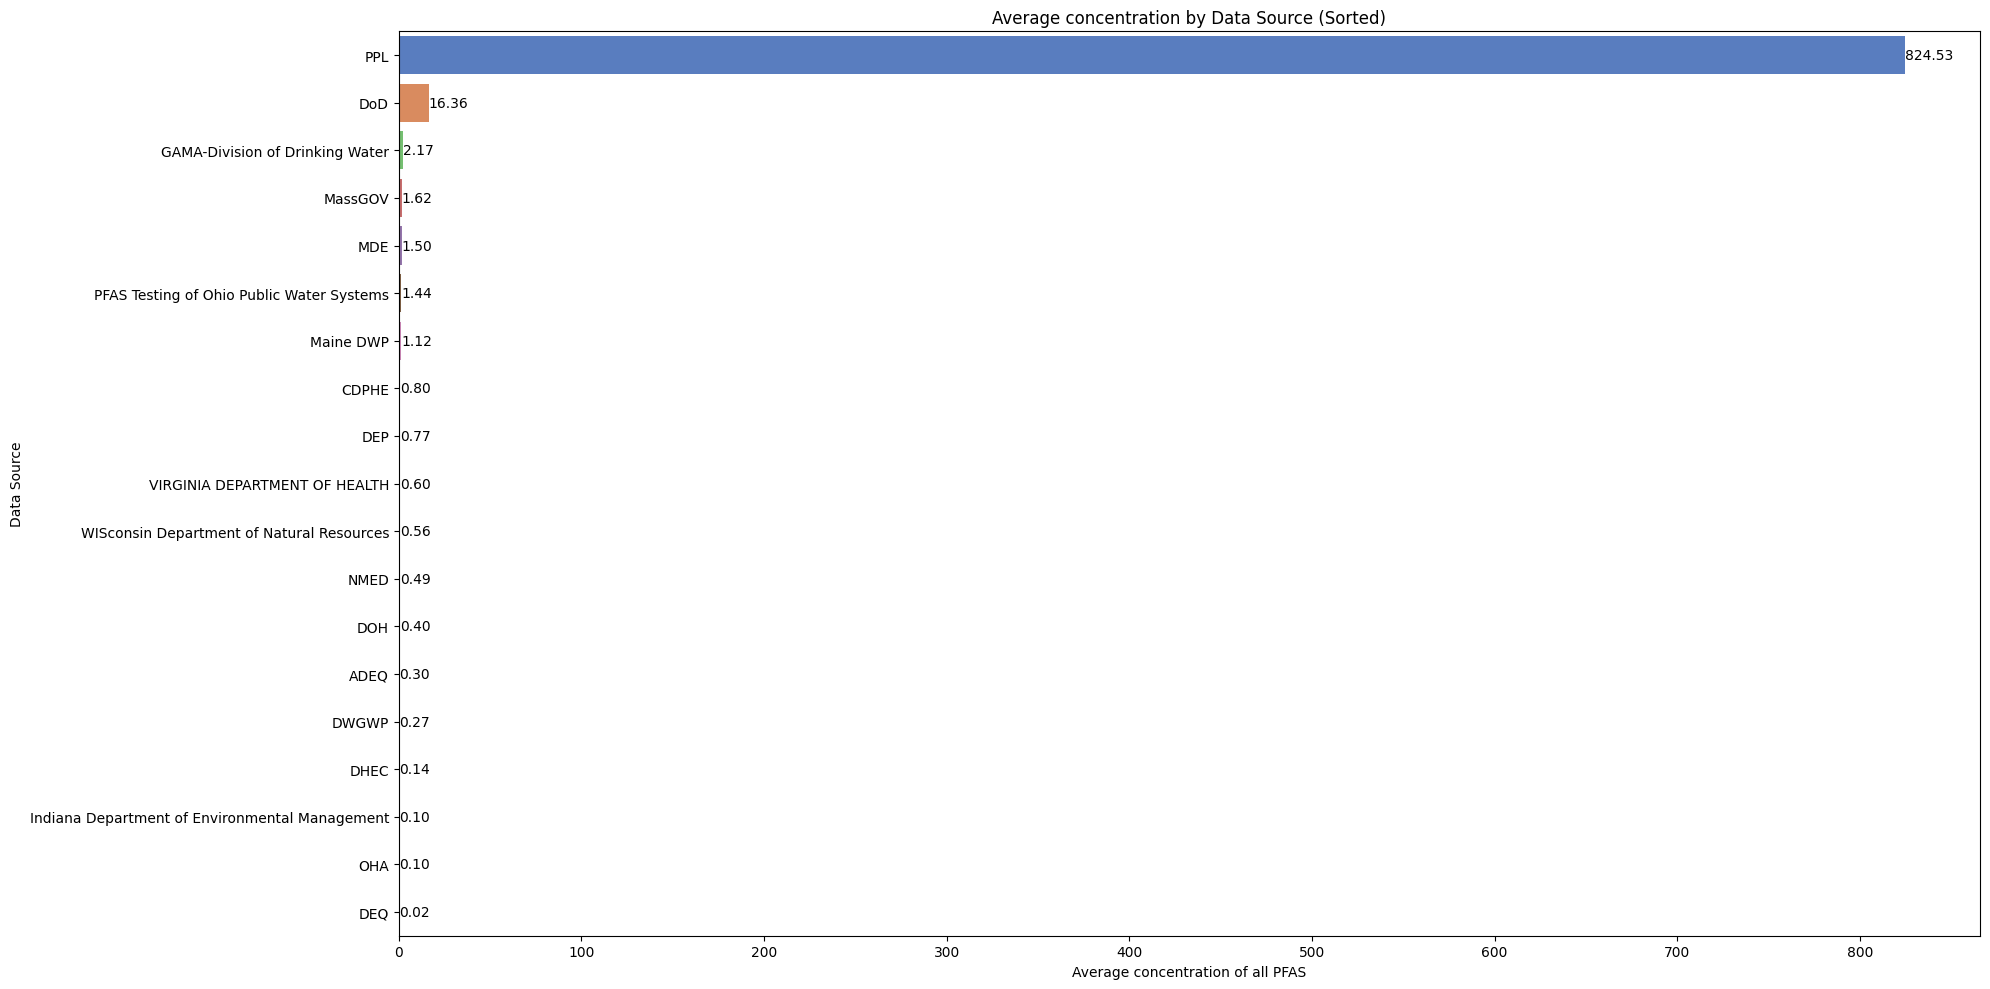

In [72]:
plt.figure(figsize=(20, 10))
sns.barplot(y='data_source', x='average_concentration', data=sorted_grouped_df, palette='muted')

# Add labels and title
plt.ylabel('Data Source')
plt.xlabel('Average concentration of all PFAS')
plt.title('Average concentration by Data Source (Sorted)')

# Annotate each bar with the sample count
for index, value in enumerate(sorted_grouped_df['average_concentration']):
    plt.text(value + 0.1, index, f'{value:.2f}', va='center')

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show the chart
plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_14033/2883481541.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='data_source', x='total_concentration', data=sorted_total_concentration_df, palette='muted')


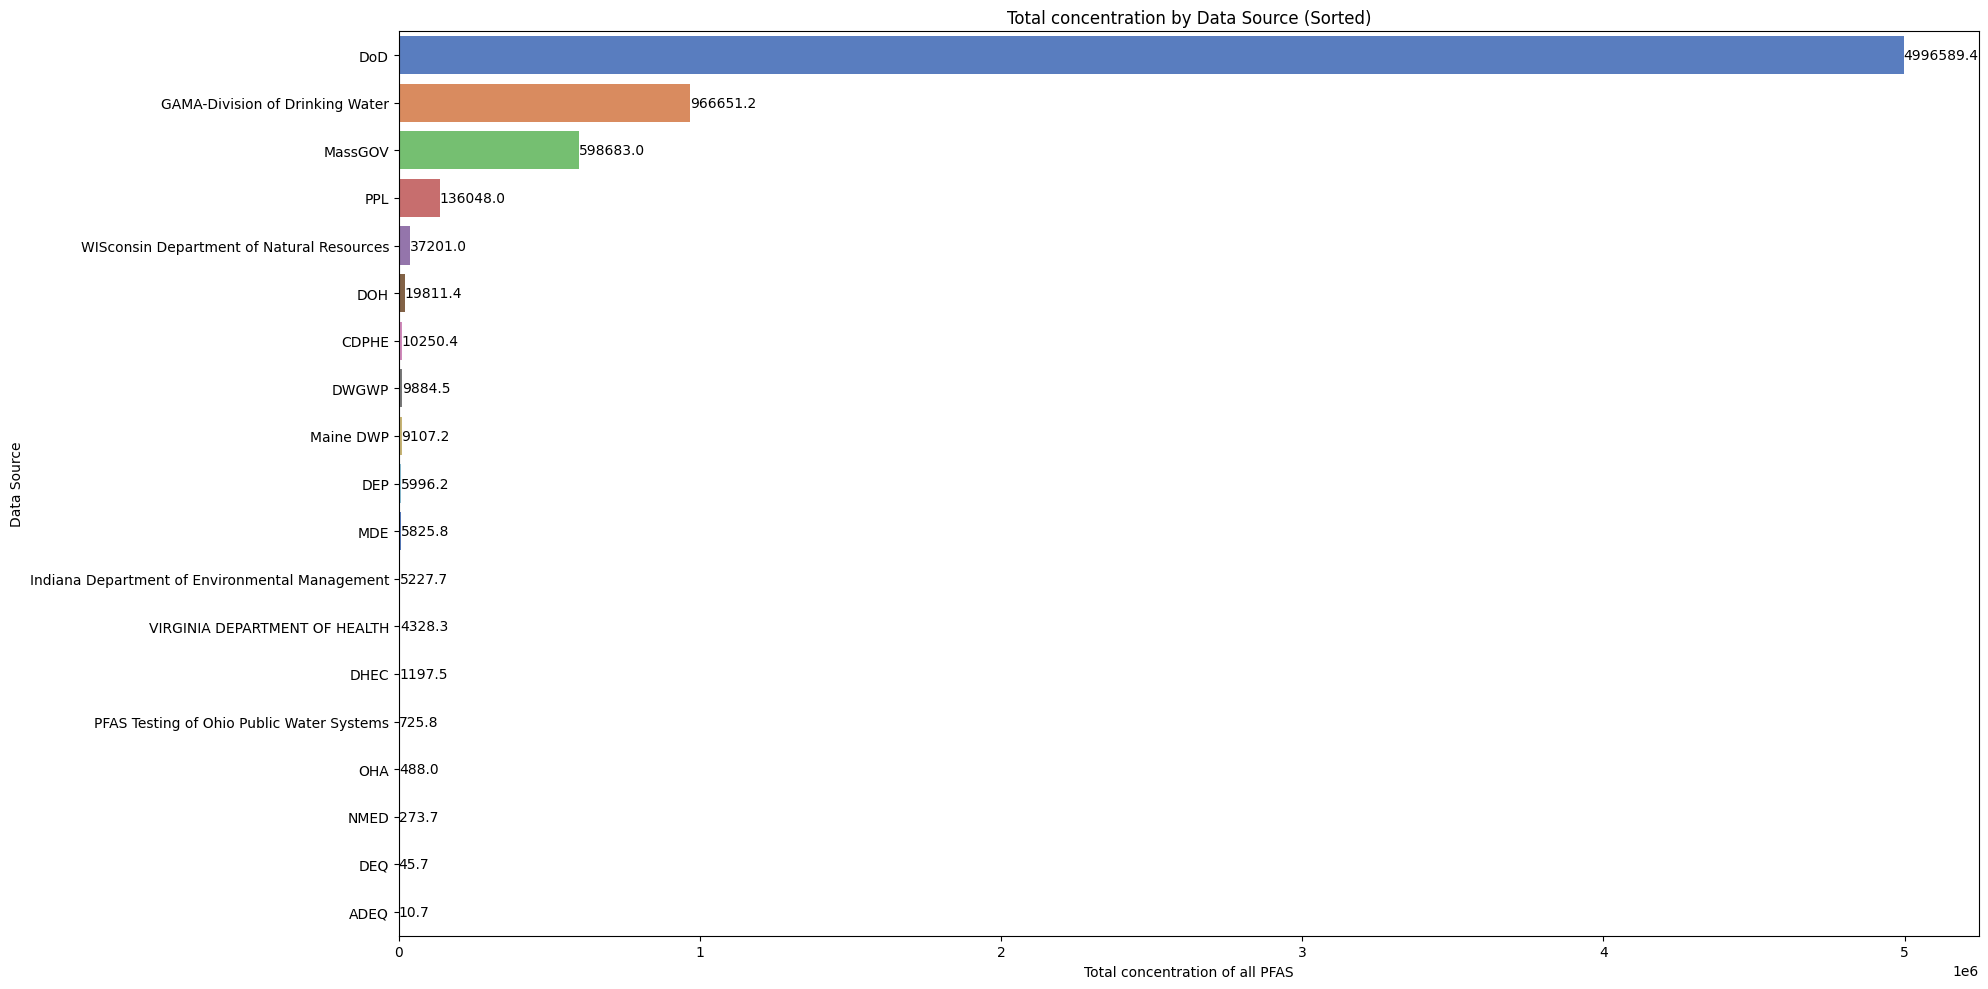

In [75]:
sorted_total_concentration_df = sorted_grouped_df.sort_values(by='total_concentration', ascending=False)

# Create the horizontal bar chart using Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(y='data_source', x='total_concentration', data=sorted_total_concentration_df, palette='muted')

# Add labels and title
plt.ylabel('Data Source')
plt.xlabel('Total concentration of all PFAS')
plt.title('Total concentration by Data Source (Sorted)')

# Annotate each bar with the total concentration rounded to 2 decimal places
for index, value in enumerate(sorted_total_concentration_df['total_concentration']):
    plt.text(value + 0.1, index, f'{value:.1f}', va='center')

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Show the chart
plt.show()

In [182]:
all_states_dw.groupby('data_source').size().sort_values(ascending=False)

data_source
GAMA-Division of Drinking Water                   444820
MassGOV                                           369191
DoD                                               305348
WISconsin Department of Natural Resources          66255
Indiana Department of Environmental Management     50202
DOH                                                48968
DWGWP                                              37123
CDPHE                                              12834
Maine DWP                                          10220
DHEC                                                8736
DEP                                                 7828
VIRGINIA DEPARTMENT OF HEALTH                       7175
OHA                                                 4711
MDE                                                 3876
DEQ                                                 2466
NMED                                                1216
PFAS Testing of Ohio Public Water Systems            924
PPL                

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/2914379814.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




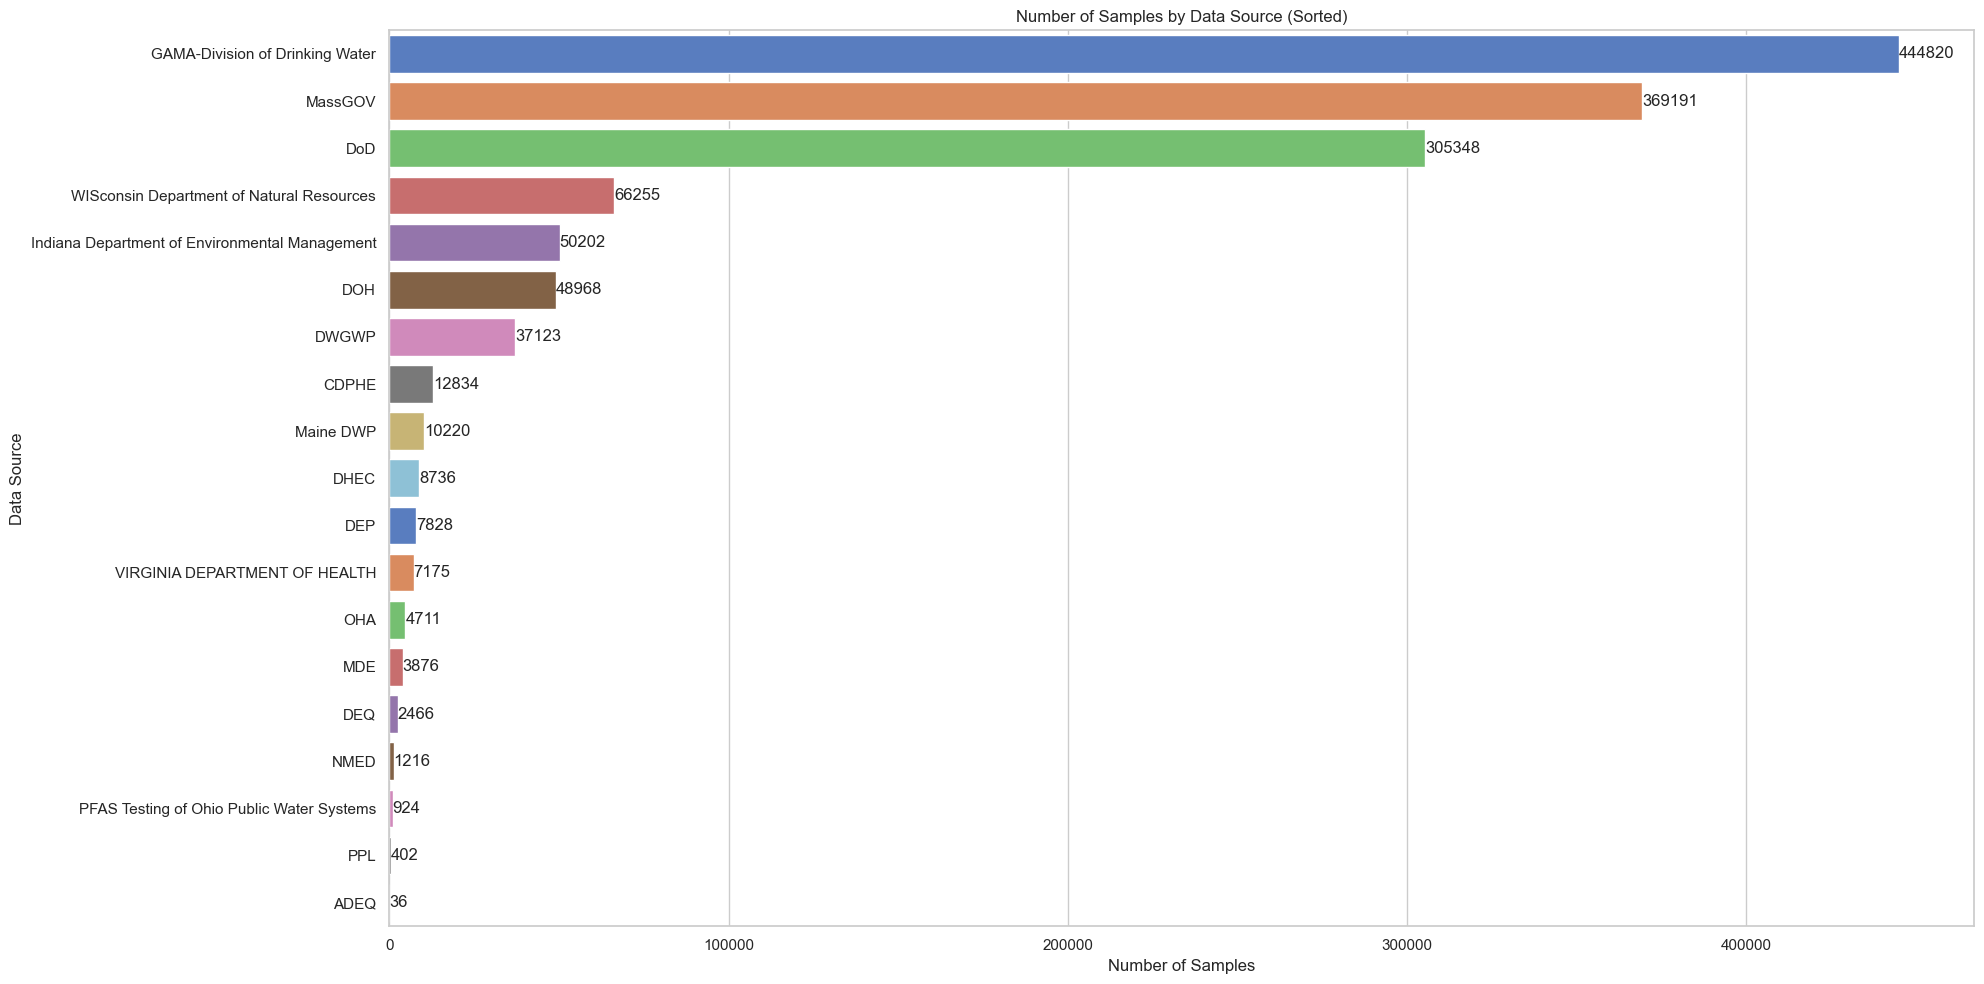

In [183]:
sorted_grouped_df = sorted_grouped_df.sort_values(by='sample_counts', ascending=False)

# Creating a horizontal bar plot using Seaborn with 'data_source' on the y-axis, sorted by sample count
plt.figure(figsize=(20, 10))
sns.barplot(y='data_source', x='sample_counts', data=sorted_grouped_df, palette='muted')
plt.ylabel('Data Source')
plt.xlabel('Number of Samples')
plt.title('Number of Samples by Data Source (Sorted)')
plt.tight_layout()
for index, value in enumerate(sorted_grouped_df['sample_counts']):
    plt.text(value + 0.1, index, str(value), va='center')

plt.tight_layout()
plt.show()

In [61]:
datasource_concentration_stats = all_states_dw.groupby('data_source')['concentration'].agg(
    median_concentration='median',
    average_concentration='mean',
    total_concentration='sum'
).reset_index()
datasource_concentration_stats

data_source  median_concentration  \
0                                             ADEQ                   0.0   
1                                            CDPHE                   0.0   
2                                              DEP                   0.0   
3                                              DEQ                   0.0   
4                                             DHEC                   0.0   
5                                              DOH                   0.0   
6                                            DWGWP                   0.0   
7                                              DoD                   0.0   
8                  GAMA-Division of Drinking Water                   0.0   
9   Indiana Department of Environmental Management                   0.0   
10                                             MDE                   0.0   
11                                       Maine DWP                   0.0   
12                                         MassGOV                   0.0   
13                                            NMED                   0.0   
14                                             OHA                   0.0   
15       PFAS Testing of Ohio Public Water Systems                   0.0   
16                                             PPL                   6.0   
17                   VIRGINIA DEPARTMENT OF HEALTH                   0.0   
18       WISconsin Department of Natural Resources                   0.0   

    average_concentration  total_concentration  
0                0.297500         1.071000e+01  
1                0.798694         1.025044e+04  
2                0.765994         5.996200e+03  
3                0.018542         4.572500e+01  
4                0.137078         1.197510e+03  
5                0.404579         1.981140e+04  
6                0.266263         9.884490e+03  
7               16.363590         4.996589e+06  
8                2.173129         9.666512e+05  
9                0.104254         5.227725e+03  
10               1.503042         5.825790e+03  
11               1.120891         9.107240e+03  
12               1.621608         5.986830e+05  
13               0.486181         2.737200e+02  
14               0.103596         4.880400e+02  
15               1.442883         7.257700e+02  
16             824.533333         1.360480e+05  
17               0.603253         4.328343e+03  
18               0.561643         3.720100e+04

In [185]:
filtered_data = all_states_dw[all_states_dw['analyte'].isin(pfas_analytes)]

# Creating the pivot table
pivot_table = filtered_data.pivot_table(values='concentration', index='data_source', columns='analyte', aggfunc='mean')
pivot_table

analyte                                              PFBS      PFHPA  \
data_source                                                            
ADEQ                                             0.000000   0.000000   
CDPHE                                            1.427321   0.523268   
DEP                                              1.115777   0.720631   
DEQ                                              0.066372   0.014139   
DHEC                                             0.369856   0.162388   
DOH                                              1.193885   0.168405   
DWGWP                                            0.362523   0.225890   
DoD                                             16.909558  10.055841   
GAMA-Division of Drinking Water                  3.442028   2.216196   
Indiana Department of Environmental Management   0.533137   0.079478   
MDE                                              3.899693   1.746667   
Maine DWP                                        0.389247   1.155049   
MassGOV                                          2.105664   1.852570   
NMED                                             0.896875   0.253125   
OHA                                              0.141538   0.189744   
PFAS Testing of Ohio Public Water Systems        1.038095        NaN   
PPL                                                   NaN        NaN   
VIRGINIA DEPARTMENT OF HEALTH                    1.253834   0.698639   
WISconsin Department of Natural Resources        1.047748   0.445336   

analyte                                              PFHXS      PFNA  \
data_source                                                            
ADEQ                                              3.010000  0.000000   
CDPHE                                             2.528766  0.129649   
DEP                                               1.378398  0.401942   
DEQ                                               0.059737  0.000000   
DHEC                                              0.967949  0.000000   
DOH                                               2.388215  0.163340   
DWGWP                                             0.652437  0.192645   
DoD                                             103.768650  0.598840   
GAMA-Division of Drinking Water                   6.999359  0.486158   
Indiana Department of Environmental Management    0.197896  0.049854   
MDE                                               4.523991  0.306491   
Maine DWP                                         0.147434  0.284300   
MassGOV                                           2.164963  0.329198   
NMED                                              1.395625  0.000000   
OHA                                               0.388718  0.000000   
PFAS Testing of Ohio Public Water Systems         0.822222  0.000000   
PPL                                                    NaN       NaN   
VIRGINIA DEPARTMENT OF HEALTH                     0.935683  0.155958   
WISconsin Department of Natural Resources         1.910904  0.109067   

analyte                                              PFOA        PFOS  
data_source                                                            
ADEQ                                             1.110000    0.000000  
CDPHE                                            1.066171    3.006073  
DEP                                              2.029369    2.471359  
DEQ                                              0.018540    0.025438  
DHEC                                                  NaN         NaN  
DOH                                              0.623220    2.761886  
DWGWP                                            1.027814    1.576794  
DoD                                             34.165880   70.641210  
GAMA-Division of Drinking Water                  6.142011   13.331157  
Indiana Department of Environmental Management   0.367603    0.237662  
MDE                                              3.991886    7.105614  
Maine DWP                             

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




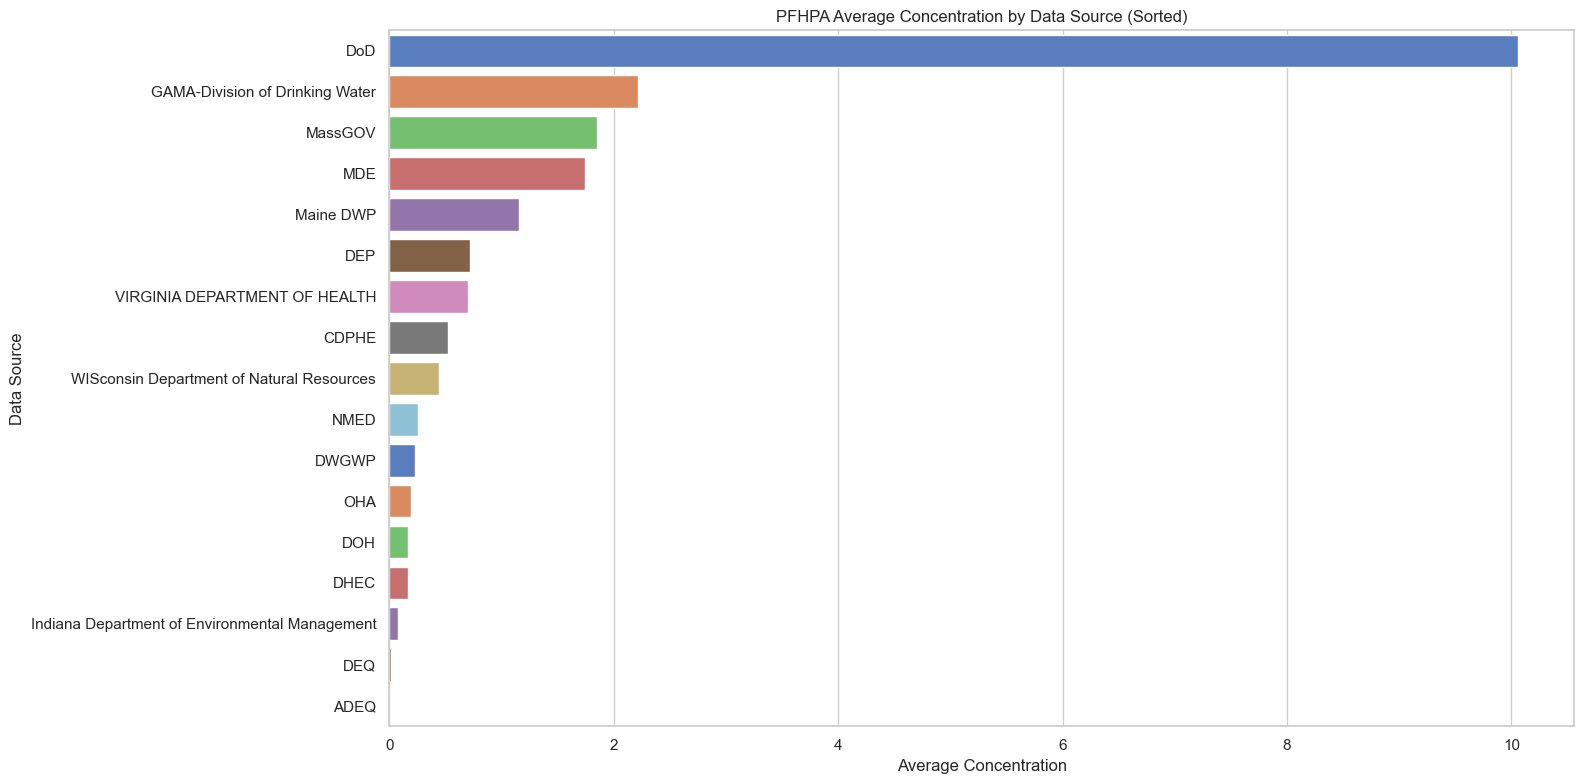

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




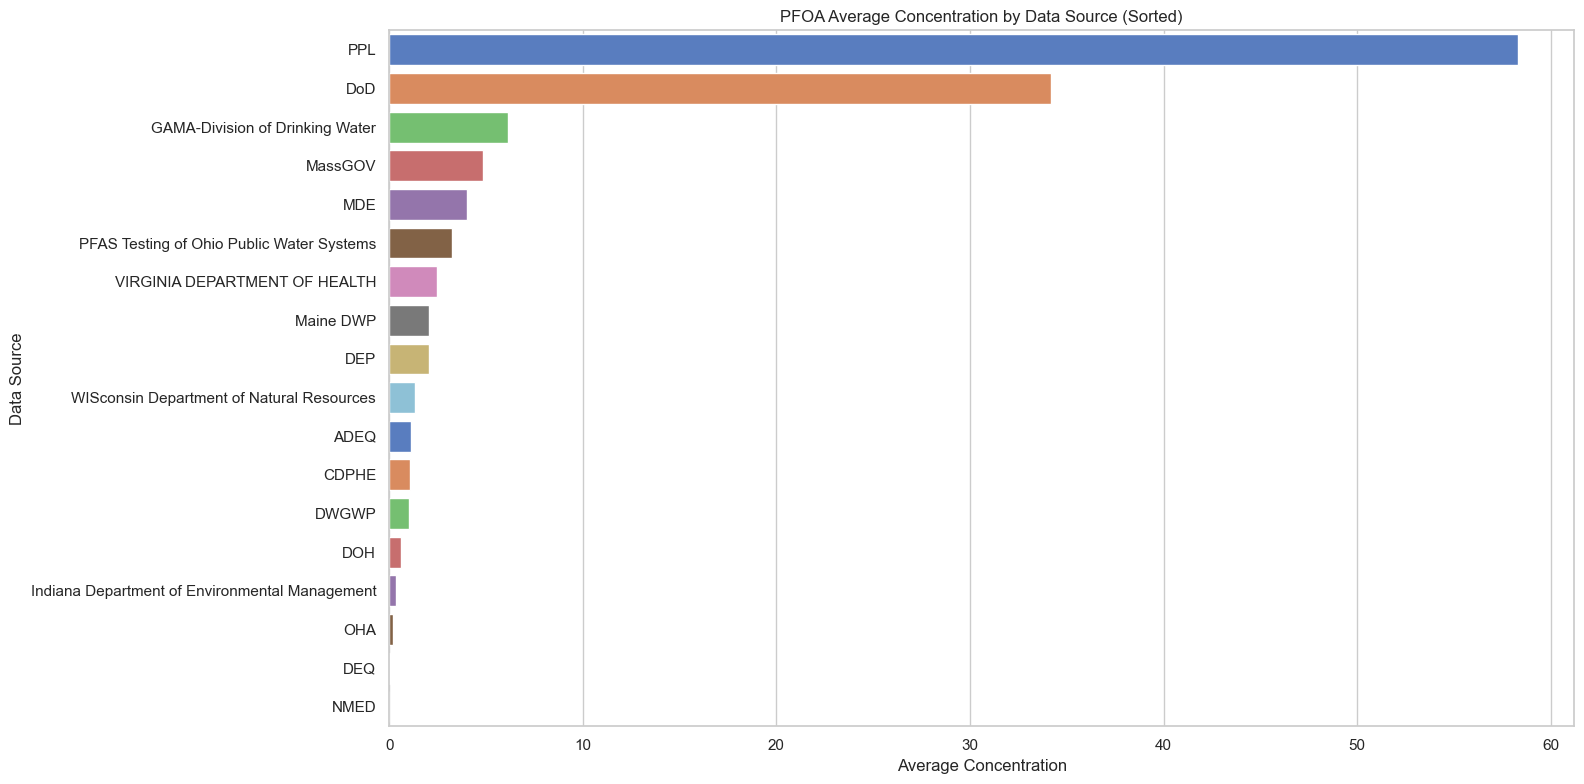

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




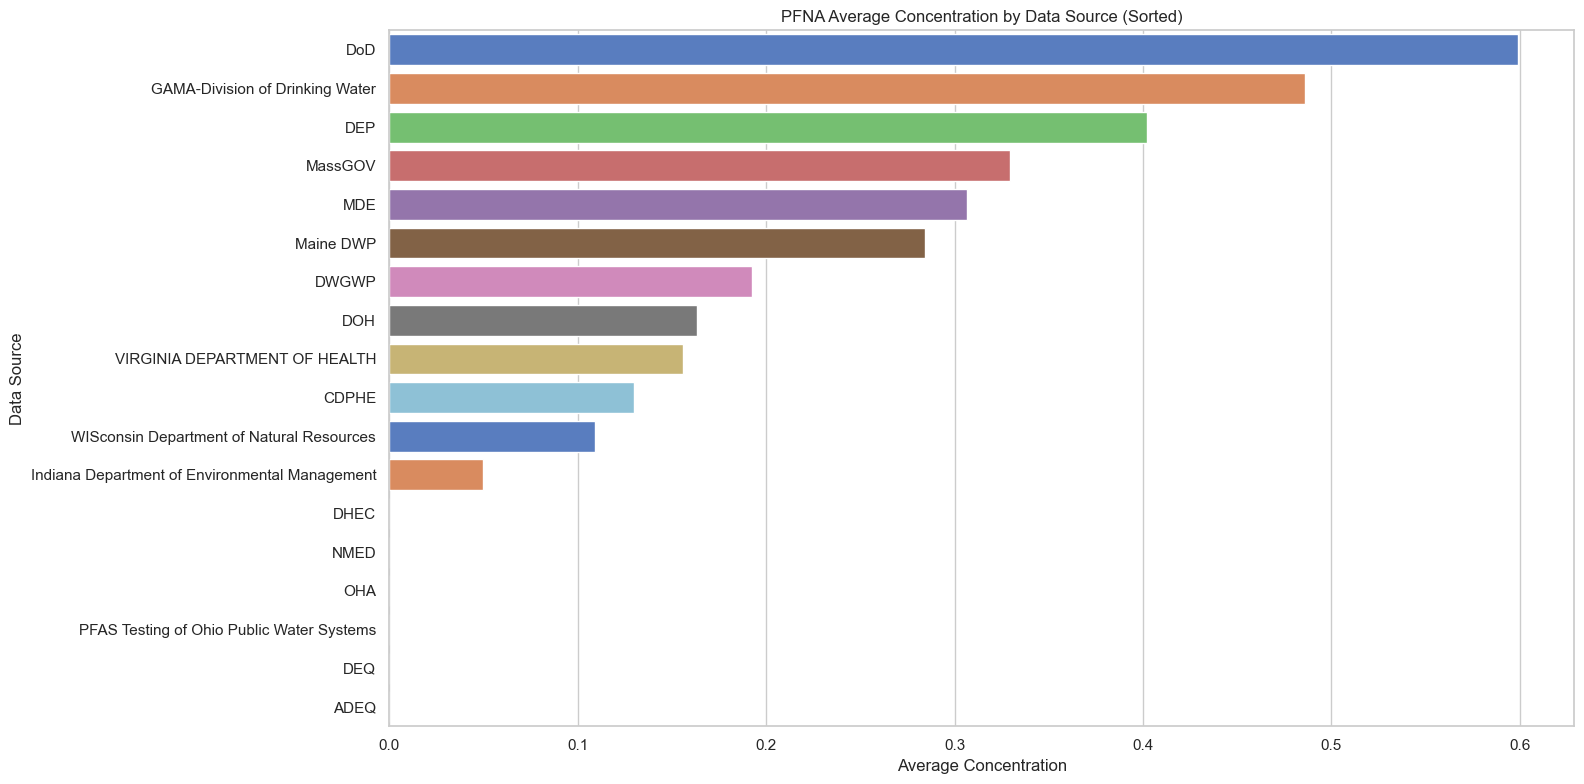

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




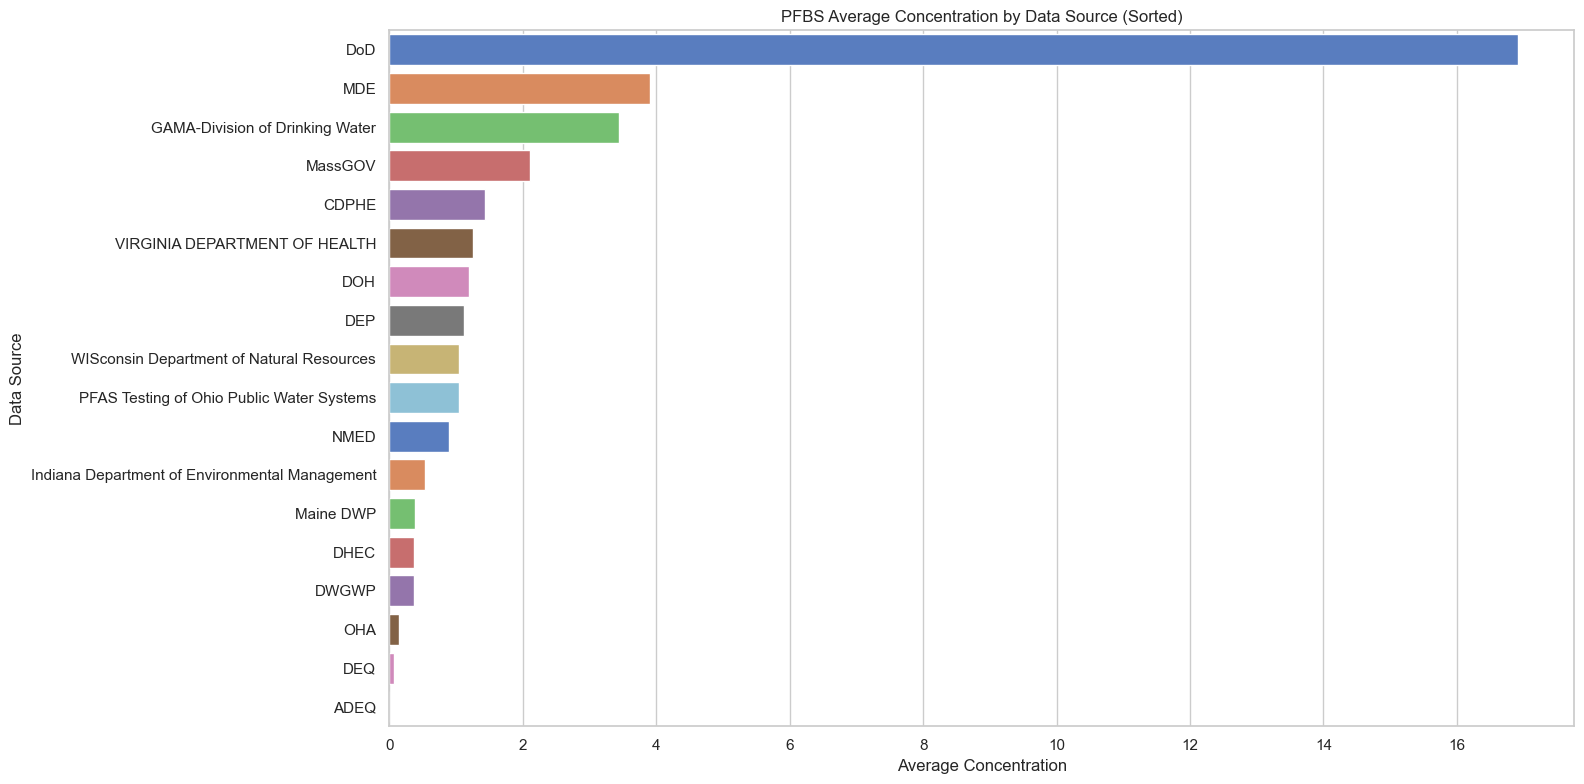

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




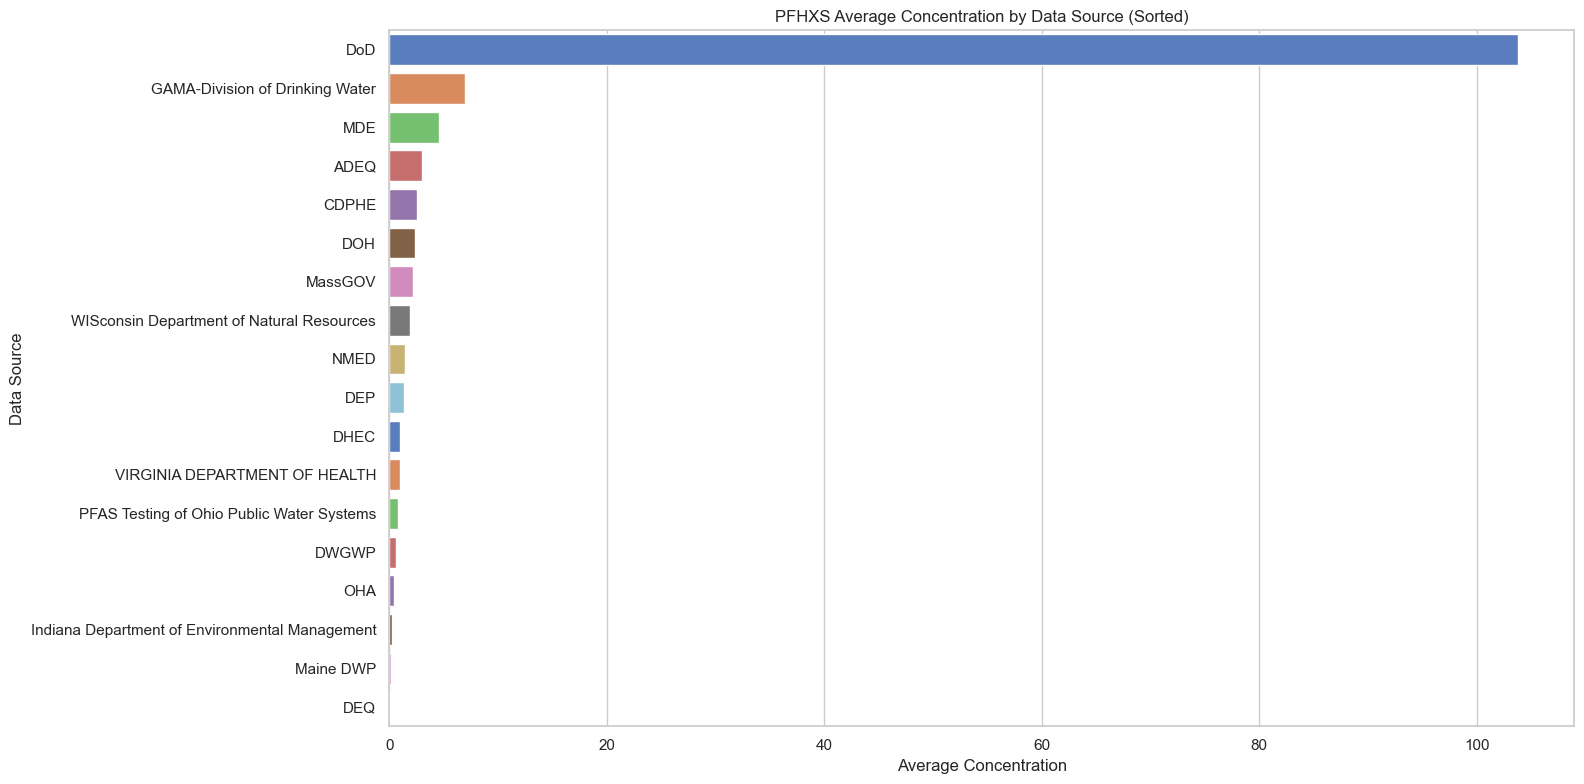

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/991646670.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




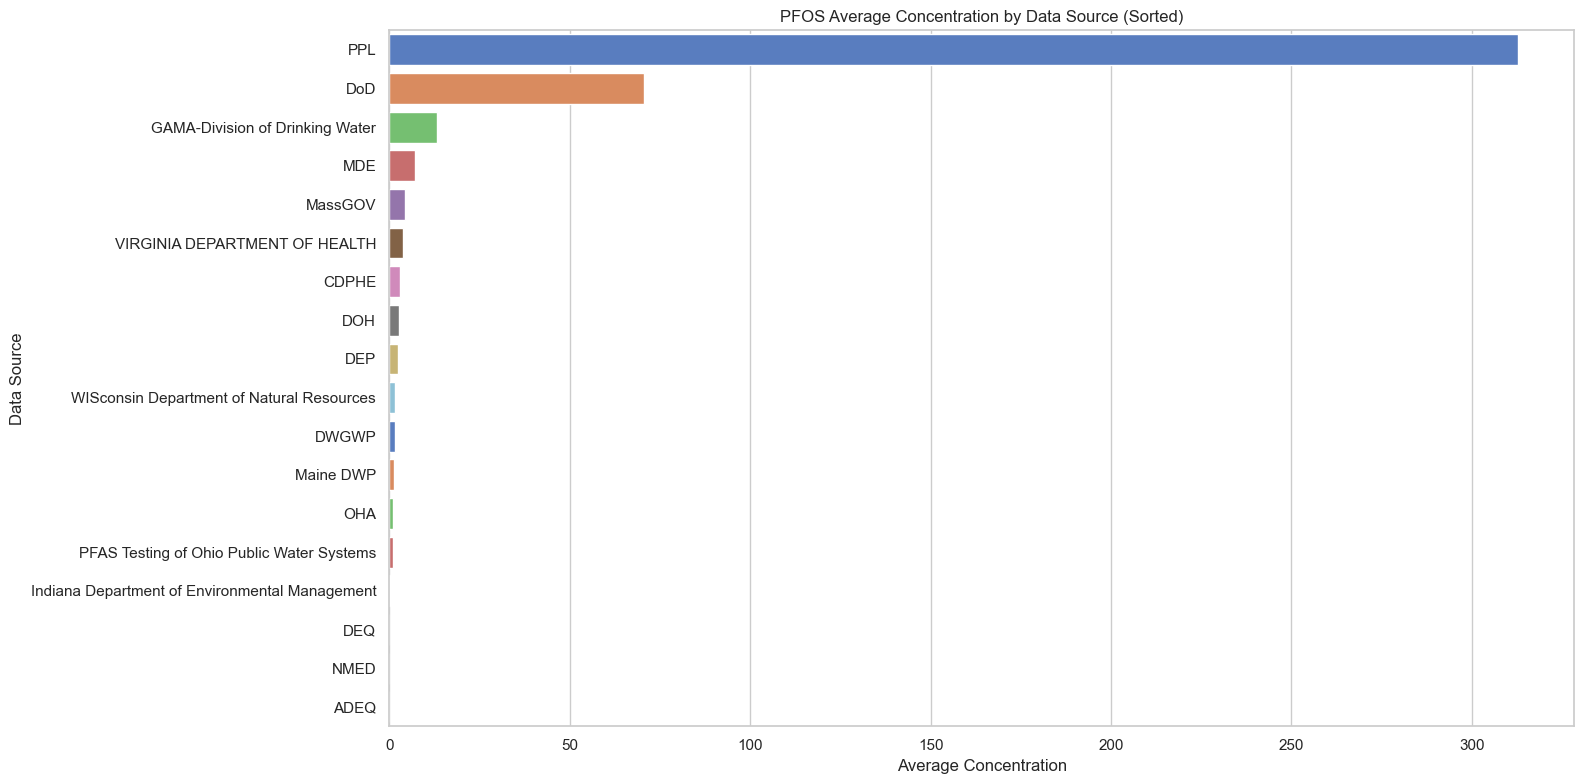

In [186]:
for analyte in pfas_analytes:
    # Sorting and dropping NaN values for current analyte data
    sorted_data = pivot_table[analyte].dropna().sort_values(ascending=False)
    
    plt.figure(figsize=(16, 8))
    sns.barplot(y=sorted_data.index, x=sorted_data.values, palette='muted')
    plt.title(f'{analyte} Average Concentration by Data Source (Sorted)')
    plt.ylabel('Data Source')
    plt.xlabel('Average Concentration')  
    plt.tight_layout()
    plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




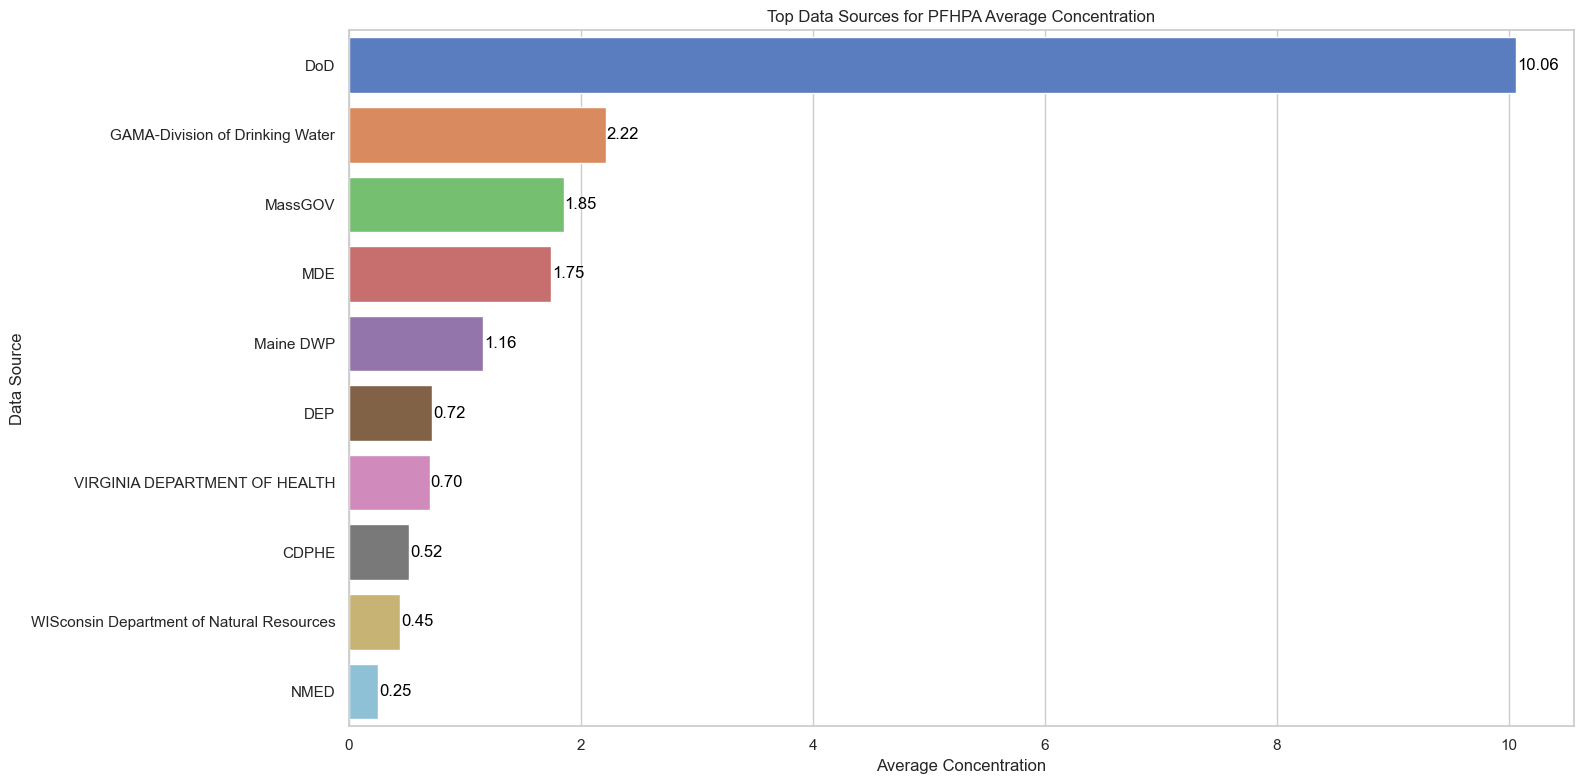

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




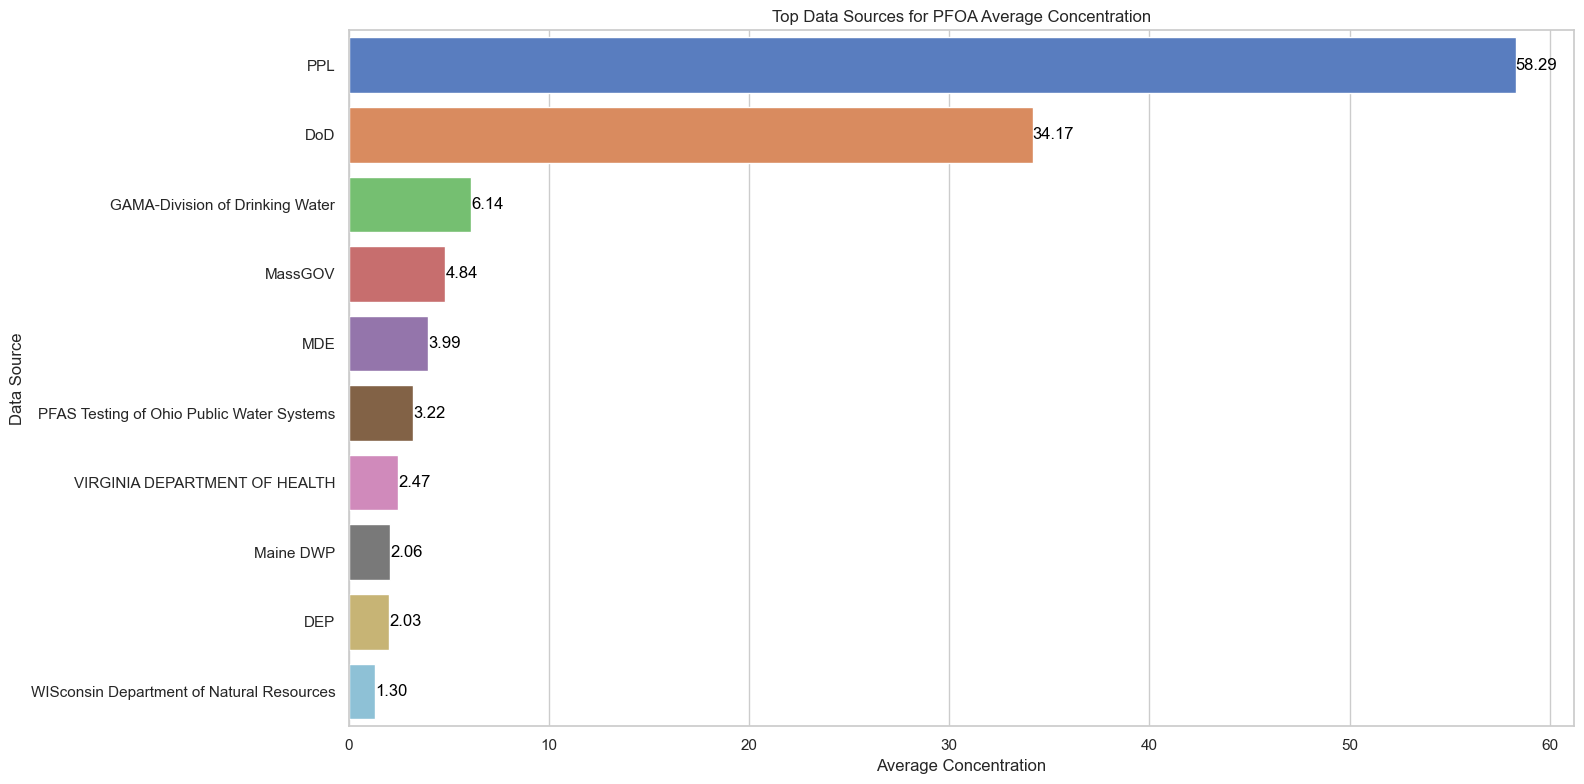

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




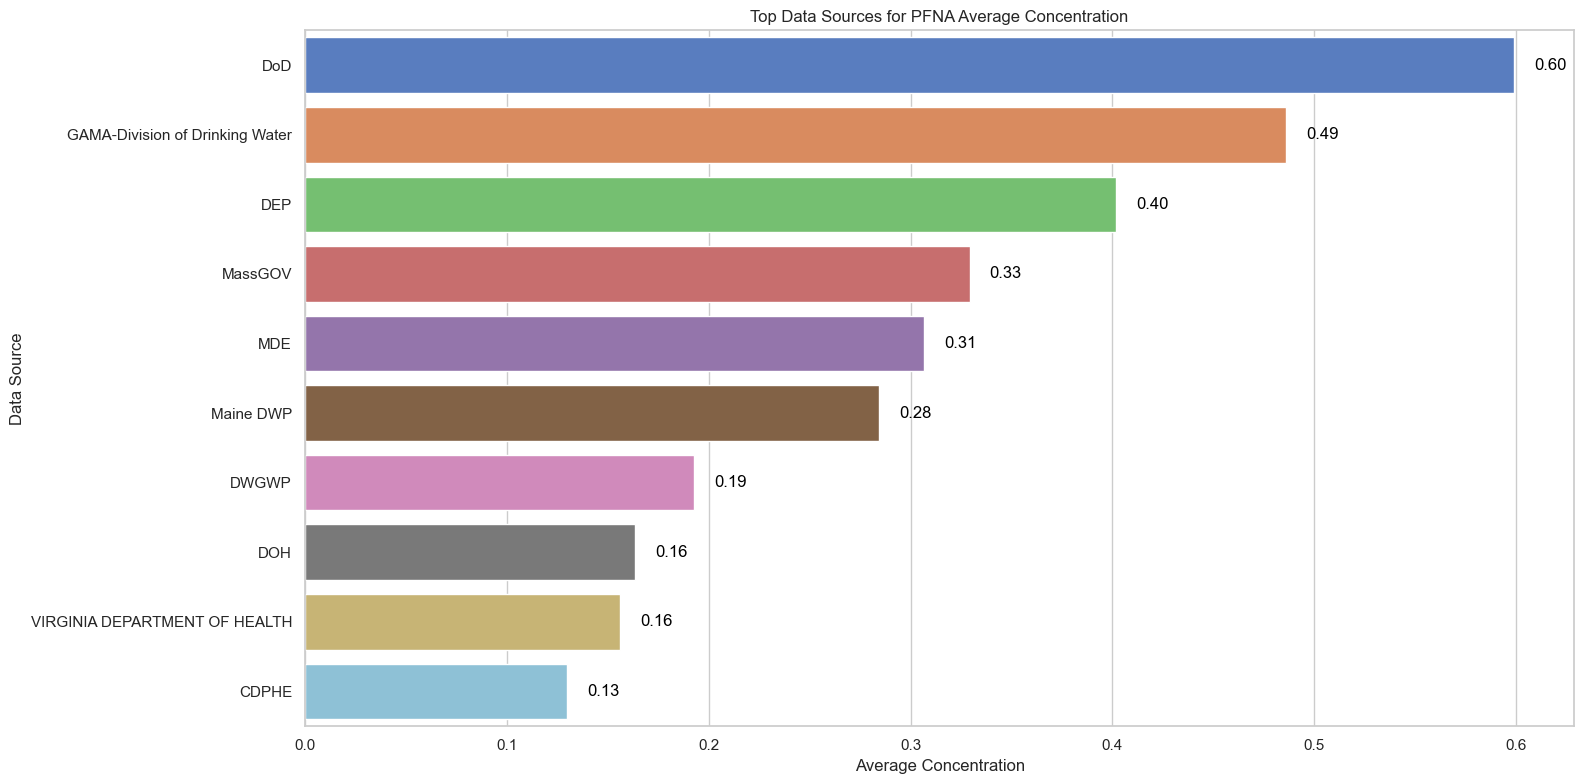

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




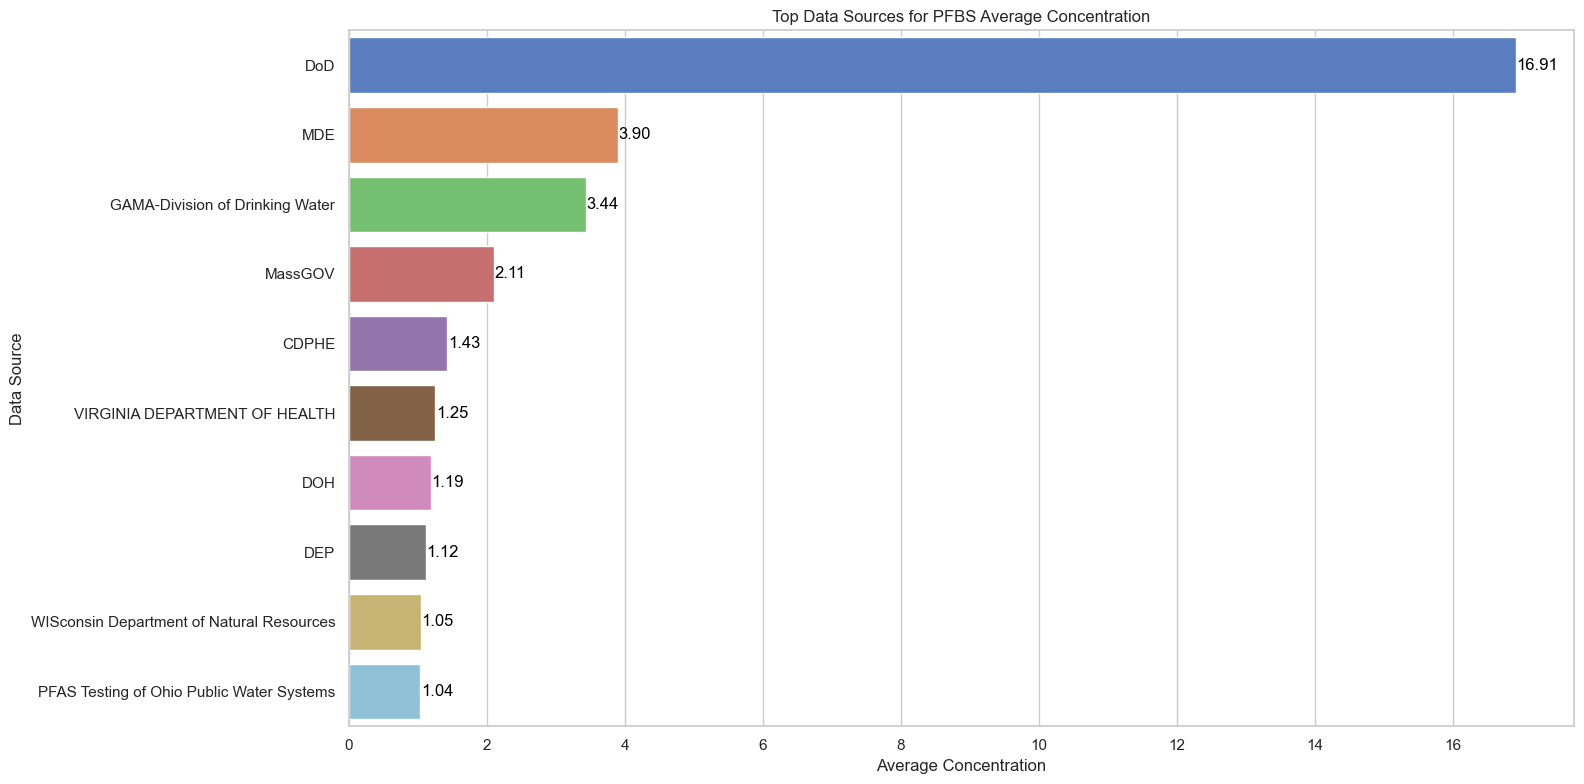

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




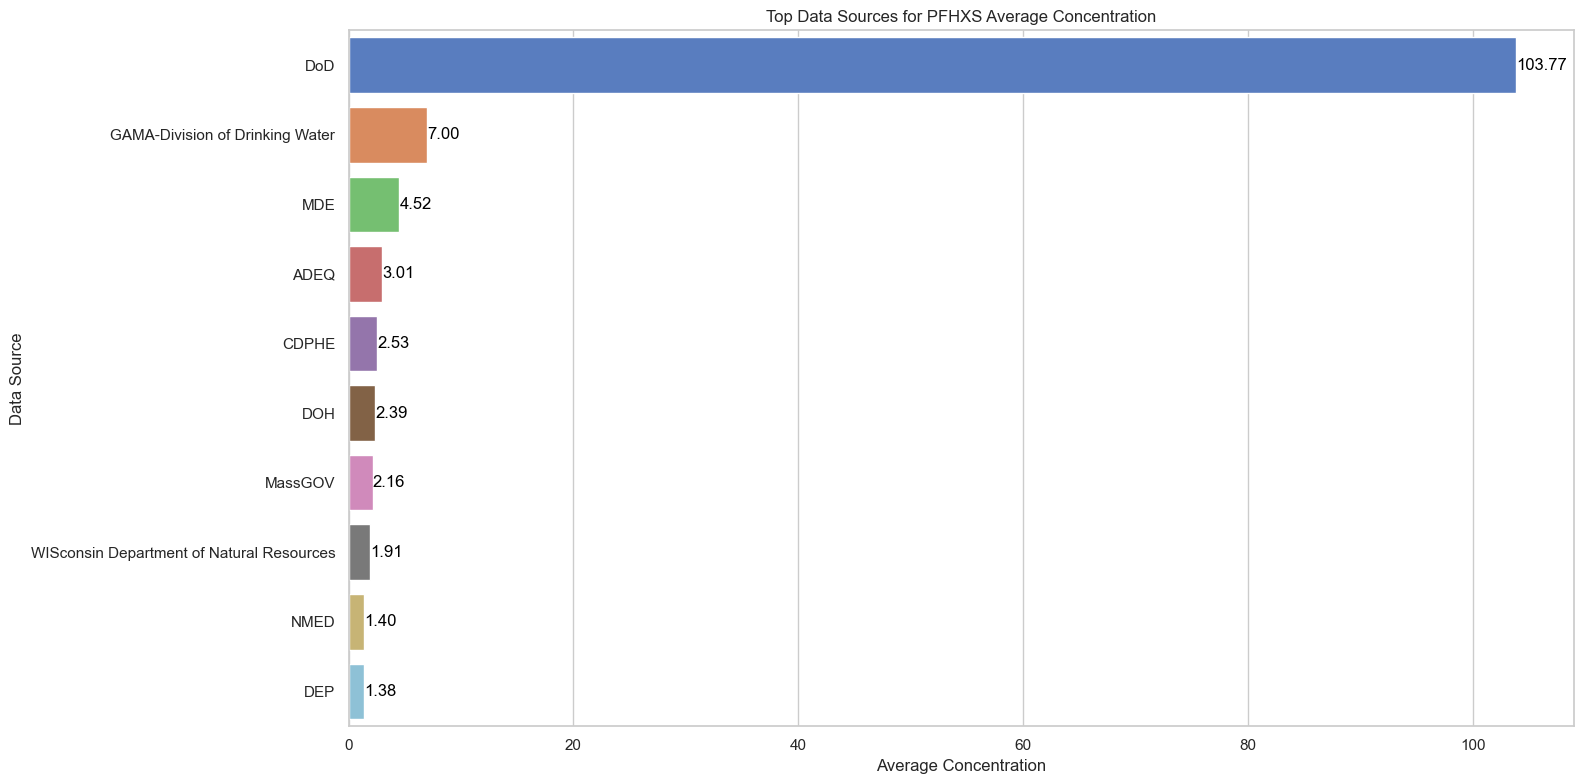

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_60505/3266414721.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




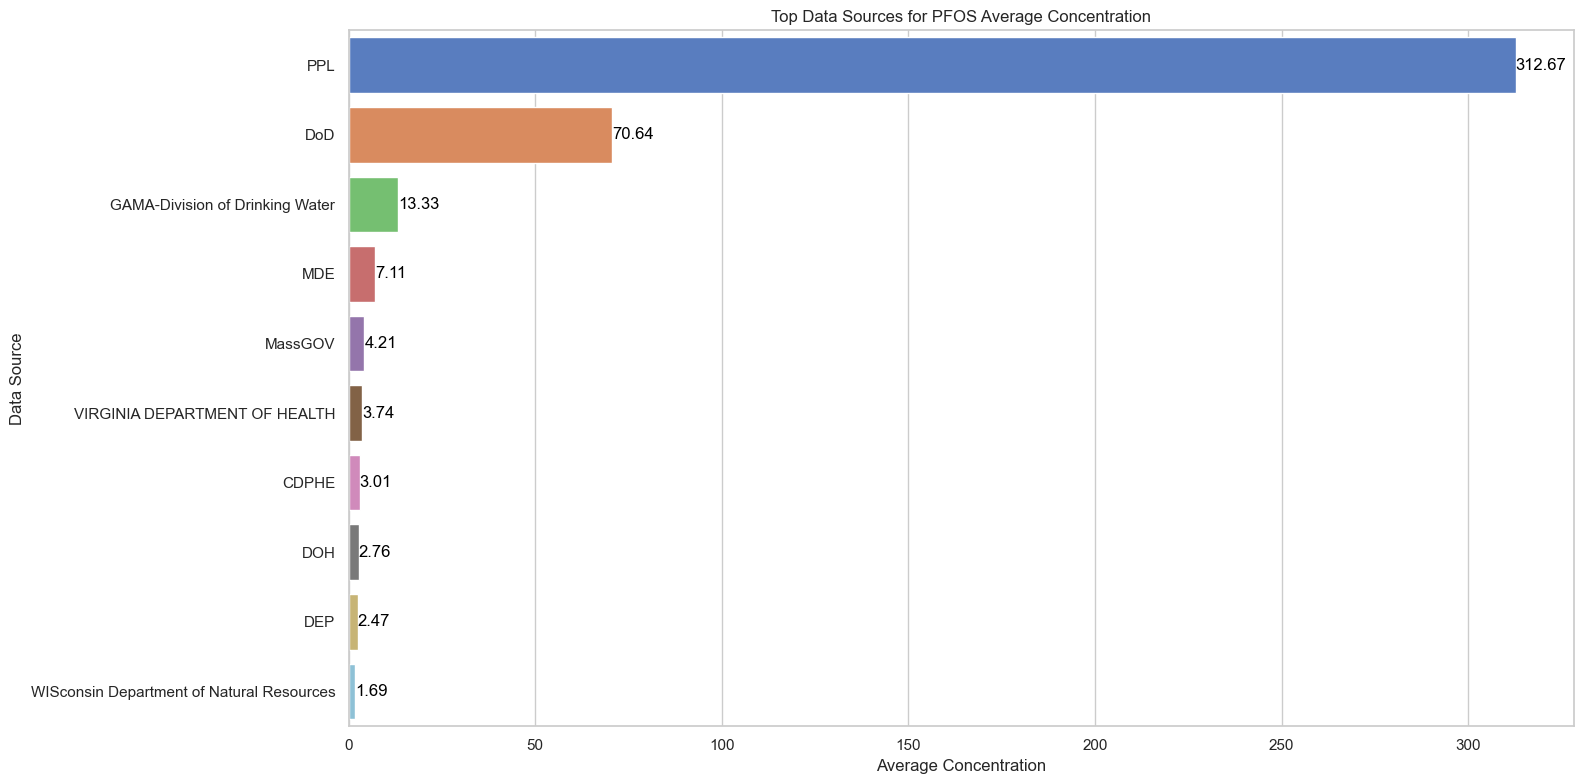

In [187]:
# Creating bar plots in a loop, filtering out zero values and showing only top sources for each analyte

for analyte in pfas_analytes:
    # Sorting and filtering data for the current analyte by concentration in descending order, removing zeros
    sorted_data = pivot_table[analyte].dropna().sort_values(ascending=False)
    non_zero_data = sorted_data[sorted_data > 0]
    
    # Limiting the display to the top 10 sources with the highest average concentration
    top_sources = non_zero_data.head(10)
    
    plt.figure(figsize=(16, 8))
    sns.barplot(y=top_sources.index, x=top_sources.values, palette='muted')
    plt.title(f'Top Data Sources for {analyte} Average Concentration')
    plt.ylabel('Data Source')
    plt.xlabel('Average Concentration')
    
    # Adding text labels for average concentration on each bar
    for index, value in enumerate(top_sources.values):
        plt.text(value + 0.01, index, f'{value:.2f}', va='center', color='black')
    
    plt.tight_layout()
    plt.show()
